<a href="https://colab.research.google.com/github/RajeshworM/Yield_Modelling_Automation/blob/main/RE_10092025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color ='green'> <font size ='6'> **Crop Yield Model using Random Effect**





<font color = 'blue'> ***Zone_cluster=  6***

Upload your CSV file (must include yield_val).


Saving data1.csv to data1 (1).csv

Data prepared: (3612, 209) years 2005 to 2025
Zone clusters available: [np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]

Working on zone_cluster 6: train=810, val=45, forecast=90

=== STEP A: Economic Variable Selection (RE) ===
 Econ econ_inc_rev1: coef=0.031138, p=0.0000
 -> selected first econ econ_inc_rev1
 Econ econ_inc_rev2: coef=0.025199, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev2'] -> coef=0.028795, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev3: coef=0.025698, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev3'] -> coef=0.031901, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev4: coef=0.024772, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev4'] -> coef=0.028909, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev5: coef=0.027813, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev5'] -> coef=0.029851, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev6: coef=0.023823, p=0.0000
 Averaged ['econ_inc_rev1'

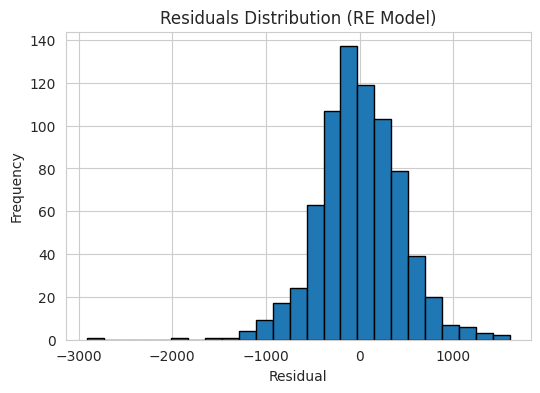

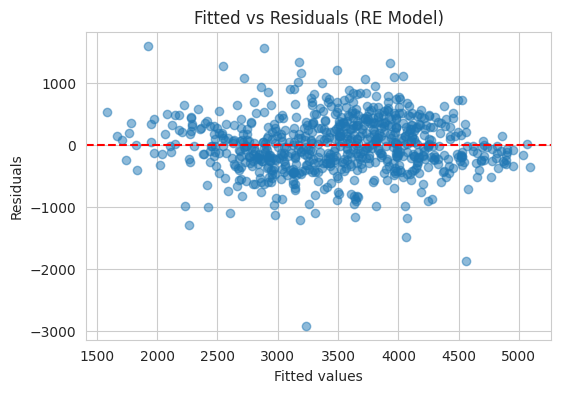

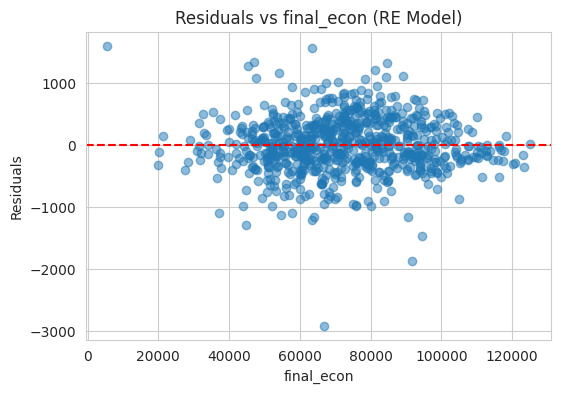

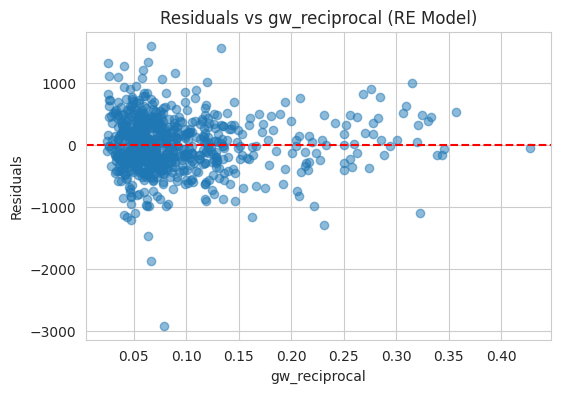

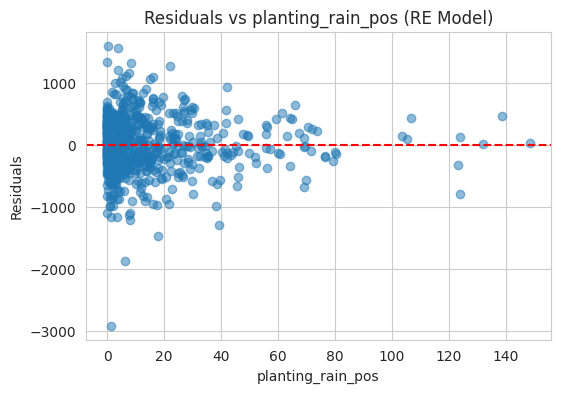

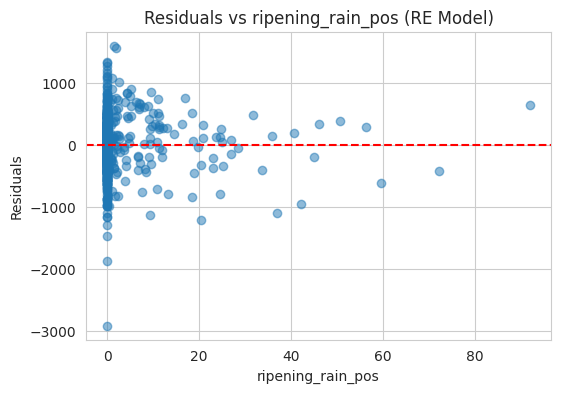

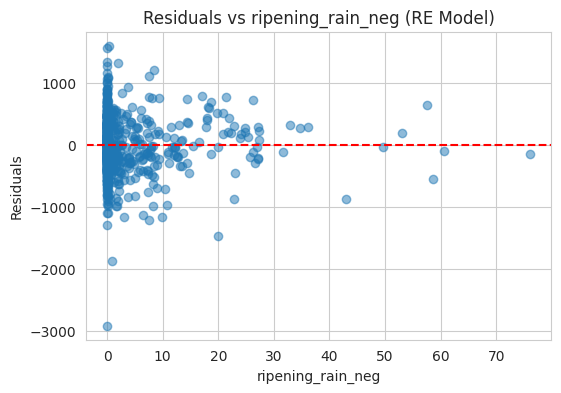

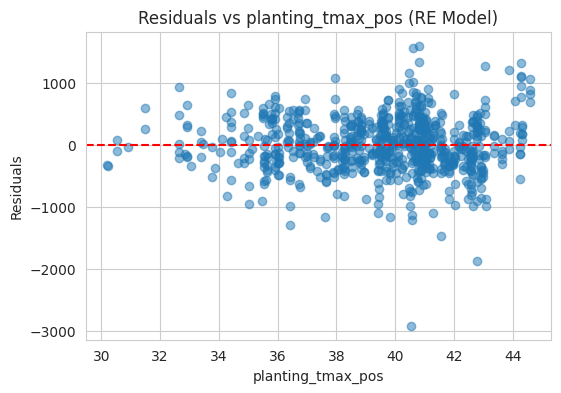

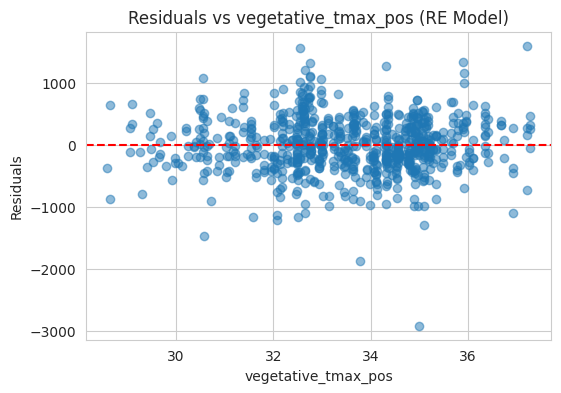

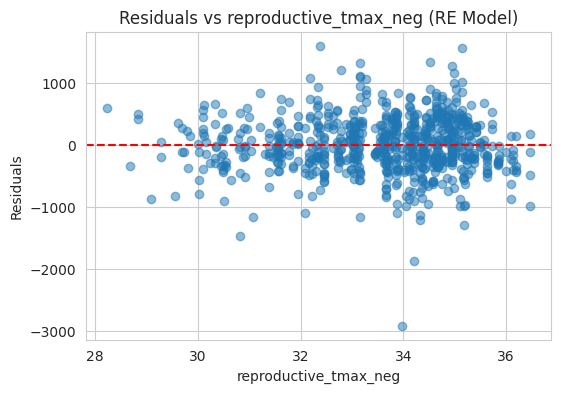

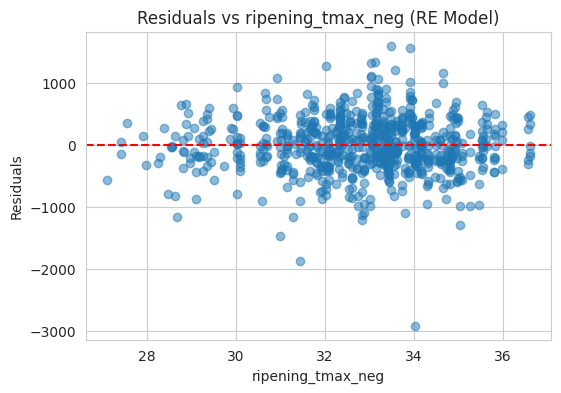

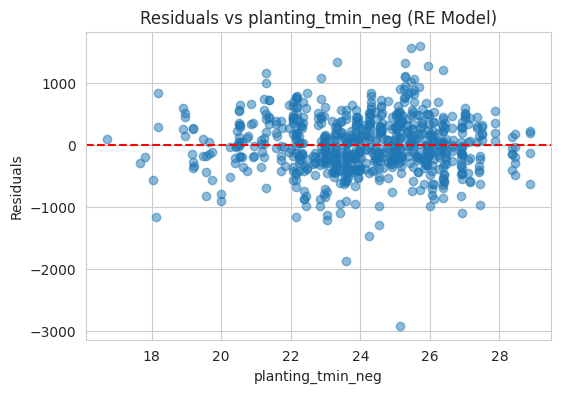

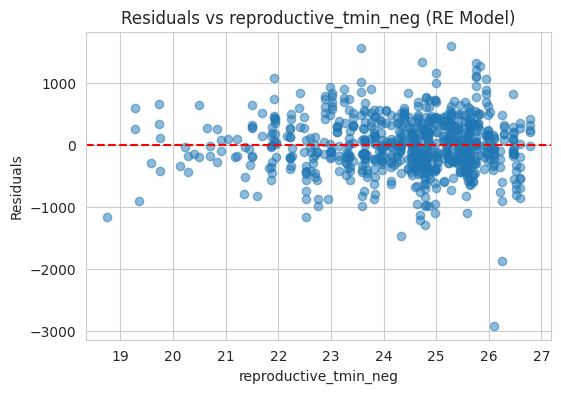

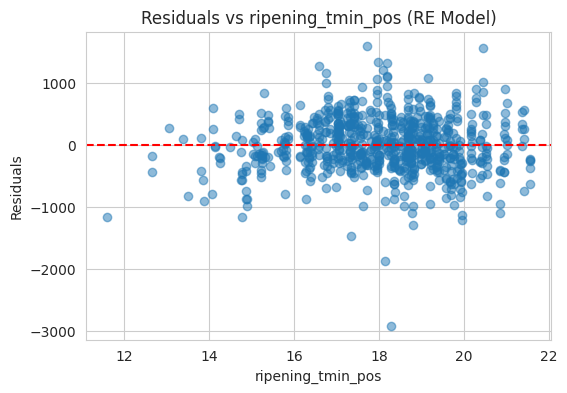

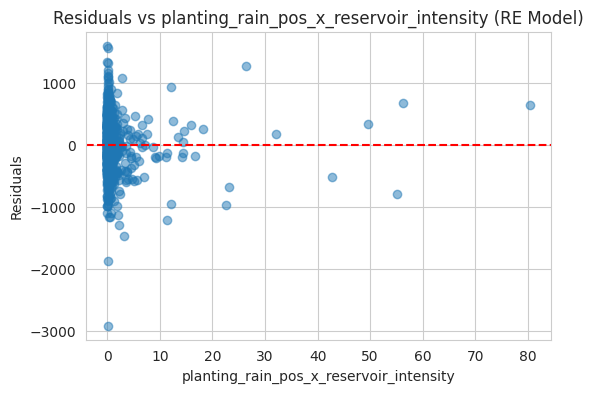

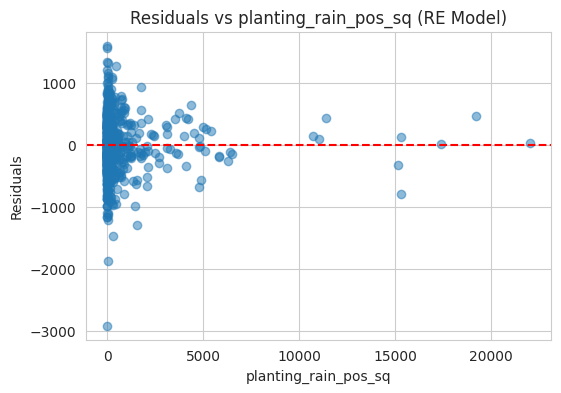

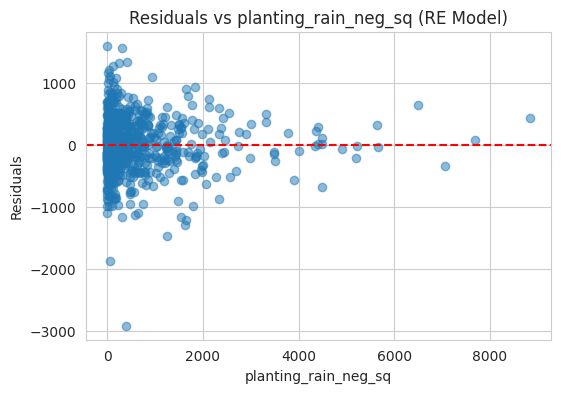

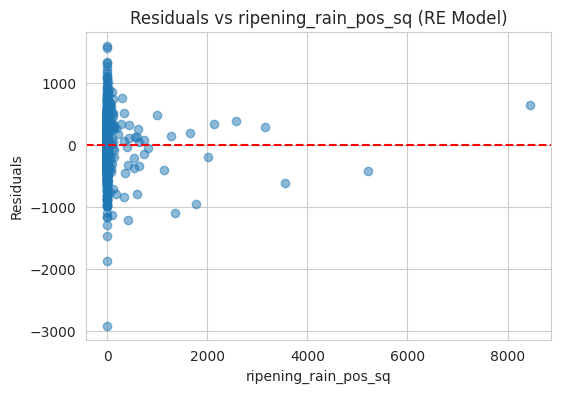


Shapiro-Wilk test: stat=0.9767, p=0.0000
Residuals deviate from normality

RMSE per district (sample period):
District 100: RMSE = 489.861
District 108: RMSE = 547.831
District 113: RMSE = 448.936
District 116: RMSE = 546.729
District 119: RMSE = 296.308
District 122: RMSE = 402.393
District 123: RMSE = 340.682
District 124: RMSE = 661.651
District 125: RMSE = 338.885
District 127: RMSE = 603.448
District 128: RMSE = 377.753
District 137: RMSE = 520.468
District 138: RMSE = 456.159
District 139: RMSE = 367.245
District 142: RMSE = 248.804
District 144: RMSE = 486.203
District 160: RMSE = 879.509
District 163: RMSE = 393.769
District 165: RMSE = 429.643
District 172: RMSE = 387.846
District 23: RMSE = 538.489
District 26: RMSE = 453.243
District 29: RMSE = 484.363
District 36: RMSE = 614.835
District 49: RMSE = 466.923
District 50: RMSE = 425.936
District 52: RMSE = 483.209
District 53: RMSE = 349.977
District 55: RMSE = 439.246
District 57: RMSE = 680.206
District 6: RMSE = 335.808
Di

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== Step M: Regenerate features in val & forecast (auto) ===

=== Validation (2023) prediction (RE) ===


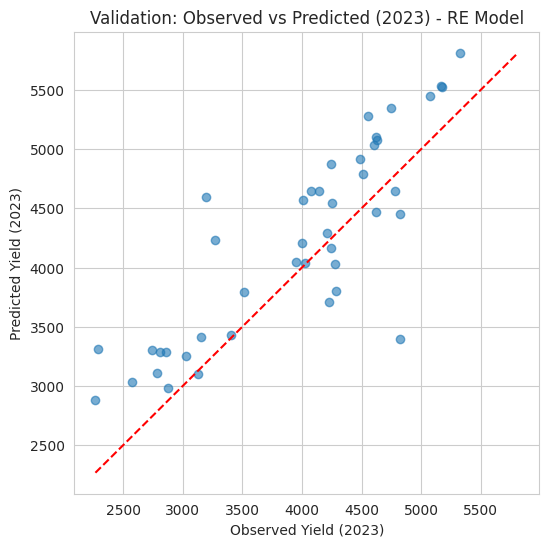

Validation RMSE (2023) - RE Model: 530.687
Saved validation predictions (RE model) to validation_predictions_RE.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== Forecast (2024-2025) prediction (RE) ===
Forecast predictions (RE model):
                  yield_predicted
district_id year                 
100         2024      6473.279003
            2025      6433.373082
102         2024      2852.769819
            2025      2410.235539
105         2024      2713.321724
            2025      2674.138925
108         2024      6051.317949
            2025      5739.530374
113         2024      6569.210903
            2025      6484.755621
116         2024      5347.253953
            2025      5193.342742
119         2024      6037.373286
            2025      5958.915076
122         2024      3161.771456
            2025      2626.440633
123         2024      3686.742002
            2025      3136.162017
124         2024      4788.304311
            2025      4621.336176
125         2024      3827.504830
            2025      3476.040805
127         2024      5481.846592
            2025      5358.365410
128         2024      6024.322969
   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== Random Effects Model Summary ===
Model Type: Random Effects (RE)
Final variables selected: 16
Variables: ['final_econ', 'gw_reciprocal', 'planting_rain_pos', 'ripening_rain_pos', 'ripening_rain_neg', 'planting_tmax_pos', 'vegetative_tmax_pos', 'reproductive_tmax_neg', 'ripening_tmax_neg', 'planting_tmin_neg', 'reproductive_tmin_neg', 'ripening_tmin_pos', 'planting_rain_pos_x_reservoir_intensity', 'planting_rain_pos_sq', 'planting_rain_neg_sq', 'ripening_rain_pos_sq']
Training RMSE: 448.154
Validation RMSE (2023): 530.687

RE Model advantages:
- Allows for correlation between individual effects and regressors
- More efficient when individual effects are uncorrelated with regressors
- Better prediction for new units not in training data
- Incorporates both between and within variation

RE Pipeline finished. Final variables used: ['final_econ', 'gw_reciprocal', 'planting_rain_pos', 'ripening_rain_pos', 'ripening_rain_neg', 'planting_tmax_pos', 'vegetative_tmax_pos', 'reproductive_tma

In [2]:
# =================== FULL RE PIPELINE (robust, feature_map integrated) ===================
# NOTE: Run in a single Colab cell. Converts FEIS to Random Effects (RE) model.

!pip install linearmodels --quiet

# ------------------- Imports -------------------
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import RandomEffects
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# ------------------- User Config -------------------
ZONE_CLUSTER = 6       # change as needed
P_SIGN = 0.10
VIF_THRESH = 10.0
TRAIN_YEARS = list(range(2005,2023))
VAL_YEAR = 2023
FORECAST_YEARS = [2024, 2025]

# ------------------- Upload Data -------------------
from google.colab import files
print("Upload your CSV file (must include yield_val).")
uploaded = files.upload()
fn = list(uploaded.keys())[0]
df = pd.read_csv(fn)

# ------------------- Standardize Columns -------------------
required_cols = ['district_id','year','zone_cluster','yield_val']
for c in required_cols:
    if c not in df.columns:
        raise ValueError(f"Missing required column: {c}")

df = df[(df['year'] >= 2005) & (df['year'] <= 2025)].copy()
df['district_id'] = df['district_id'].astype(str)
df['year'] = df['year'].astype(int)
df['zone_cluster'] = df['zone_cluster'].astype(int)

# ------------------- Candidate variable groups (auto-detect) -------------------
econ_candidates_all = [f for f in df.columns if 'econ' in f.lower()]
irrigation_vars_all = [c for c in ['gw_reciprocal','reservoir_intensity','canal_intensity',
                                   'well_intensity','tank_intensity','oth_intensity'] if c in df.columns]
stress_vars_all = [c for c in ['heat_stress','drought'] if c in df.columns]
rain_weeks_all = [f'rf_week{i}' for i in range(20,43) if f'rf_week{i}' in df.columns]
tmax_weeks_all = [f'tmax_week{i}' for i in range(20,43) if f'tmax_week{i}' in df.columns]
tmin_weeks_all = [f'tmin_week{i}' for i in range(20,43) if f'tmin_week{i}' in df.columns]

all_candidates = list(set(econ_candidates_all + irrigation_vars_all +
                          stress_vars_all + rain_weeks_all +
                          tmax_weeks_all + tmin_weeks_all))

# ------------------- Impute Missing Values (within-district ffill/bfill then median) -------------------
if all_candidates:
    df[all_candidates] = df.groupby('district_id')[all_candidates].transform(lambda g: g.ffill().bfill())
    for col in all_candidates:
        if df[col].isna().any():
            df[col].fillna(df[col].median(), inplace=True)

# Keep districts with at least 2 years
district_counts = df.groupby('district_id')['year'].nunique()
df = df[df['district_id'].isin(district_counts[district_counts >= 2].index)]

print("\nData prepared:", df.shape, "years", df['year'].min(), "to", df['year'].max())
print("Zone clusters available:", sorted(df['zone_cluster'].unique()))

# ------------------- Cluster Subset -------------------
cluster = df[df['zone_cluster'] == ZONE_CLUSTER].copy()
if cluster.empty:
    raise ValueError(f"No data for zone_cluster={ZONE_CLUSTER}")

train = cluster[cluster['year'].isin(TRAIN_YEARS)].copy()
val = cluster[cluster['year'] == VAL_YEAR].copy()
forecast_df = cluster[cluster['year'].isin(FORECAST_YEARS)].copy()

if train.empty:
    raise ValueError(f"No training data for zone_cluster={ZONE_CLUSTER}")

print(f"\nWorking on zone_cluster {ZONE_CLUSTER}: train={len(train)}, val={len(val)}, forecast={len(forecast_df)}")

# ------------------- Helper Functions -------------------
def re_fit(y, X, data):
    """Panel Random Effects fit. X is list of column names in data."""
    try:
        panel = data.set_index(['district_id','year'])
        exog = sm.add_constant(panel[X], has_constant='add')
        mod = RandomEffects(panel[y], exog)
        res = mod.fit(cov_type="robust")
        return res
    except Exception as e:
        print(f"RE fit error: {e}")
        return None

def safe_fit(formula, df):
    try:
        model = sm.OLS.from_formula(formula, df).fit()
        return model
    except Exception:
        return None

# ------------------- Structures to record feature_map & groups -------------------
feature_map = {}
rain_groups = {}
temp_groups = {}
irrig_pos_list, irrig_neg_list = [], []
interaction_kept = []
quad_kept = []

# ------------------- STEP A: Economic Variables -------------------
print("\n=== STEP A: Economic Variable Selection (RE) ===")
econ_candidates = econ_candidates_all.copy()
selected_econ = []

for var in econ_candidates:
    if var not in train.columns:
        continue
    res = re_fit('yield_val', [var], train)
    if res is None:
        continue
    coef = res.params.get(var, np.nan)
    p = res.pvalues.get(var, np.nan)
    print(f" Econ {var}: coef={coef:.6f}, p={p:.4f}")
    if (not np.isnan(p)) and (p < P_SIGN) and (coef > 0):
        if not selected_econ:
            selected_econ = [var]
            print(f" -> selected first econ {var}")
        else:
            avg_name = "econ_avg_temp"
            train[avg_name] = train[selected_econ + [var]].mean(axis=1)
            res_avg = re_fit('yield_val', [avg_name], train)
            if res_avg:
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                coef_avg = res_avg.params.get(avg_name, np.nan)
                cur_avg = "econ_avg_current"
                train[cur_avg] = train[selected_econ].mean(axis=1)
                res_current = re_fit('yield_val', [cur_avg], train)
                p_current = res_current.pvalues.get(cur_avg, np.nan) if res_current else np.nan
                train.drop(columns=[cur_avg], inplace=True, errors='ignore')
                print(f" Averaged {selected_econ + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, vs current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and (p_avg < p_current):
                    selected_econ.append(var)
                    print(f" -> kept {var} in econ group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

if selected_econ:
    train['final_econ'] = train[selected_econ].mean(axis=1)
    if not val.empty:
        val['final_econ'] = val[selected_econ].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['final_econ'] = forecast_df[selected_econ].mean(axis=1)
    base_features = ['final_econ']
    feature_map['final_econ'] = list(selected_econ)
else:
    base_features = []
print("Selected economic vars:", selected_econ)

# ------------------- STEP B: GW & Reservoir -------------------
print("\n=== STEP B: GW reciprocal & Reservoir (RE) ===")
gw_candidates = ['gw_reciprocal','reservoir_intensity']
for v in gw_candidates:
    if v in train.columns:
        features_to_test = base_features + [v]
        res = re_fit('yield_val', features_to_test, train)
        if res is None:
            continue
        coef = res.params.get(v, np.nan)
        p = res.pvalues.get(v, np.nan)
        print(f" {v}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            base_features.append(v)
            feature_map[v] = ('raw', v)
            print(f" -> kept {v}")

print("Base features after Step B:", base_features)

# ------------------- STEP C: Rainfall Weekly -------------------
print("\n=== STEP C: Rainfall Weekly Selection (RE) ===")
stage_weeks = {
    'planting': list(range(20,29)),
    'vegetative': list(range(29,34)),
    'reproductive': list(range(34,39)),
    'ripening': list(range(39,43))
}

for stage, weeks in stage_weeks.items():
    weekly_cols = [f"rf_week{i}" for i in weeks if f"rf_week{i}" in train.columns]
    if not weekly_cols:
        print(f" No weekly rain cols for {stage}, skipping")
        continue

    print(f"\nTesting {stage} weekly cols: {weekly_cols}")
    pos_candidates, neg_candidates = [], []

    for col in weekly_cols:
        res = re_fit('yield_val', base_features + [col], train)
        if res is None:
            continue
        coef = res.params.get(col, np.nan)
        p = res.pvalues.get(col, np.nan)
        print(f" {col}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            if coef > 0:
                pos_candidates.append(col)
                print(f"  -> {col} added to positive candidates")
            else:
                neg_candidates.append(col)
                print(f"  -> {col} added to negative candidates")

    # positive sequential averaging
    selected_pos = []
    for var in pos_candidates:
        if not selected_pos:
            selected_pos = [var]
            print(f" -> Selected first positive var for {stage}: {var}")
        else:
            avg_name = f'{stage}_pos_avg_temp'
            train[avg_name] = train[selected_pos + [var]].mean(axis=1)
            res_avg = re_fit('yield_val', base_features + [avg_name], train)
            if res_avg:
                coef_avg = res_avg.params.get(avg_name, np.nan)
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                if len(selected_pos) == 1:
                    res_current = re_fit('yield_val', base_features + [selected_pos[0]], train)
                    p_current = res_current.pvalues.get(selected_pos[0], np.nan) if res_current else np.nan
                else:
                    cur_avg_name = f'{stage}_current_pos_avg'
                    train[cur_avg_name] = train[selected_pos].mean(axis=1)
                    res_current = re_fit('yield_val', base_features + [cur_avg_name], train)
                    p_current = res_current.pvalues.get(cur_avg_name, np.nan) if res_current else np.nan
                    train.drop(columns=[cur_avg_name], inplace=True, errors='ignore')
                print(f" {stage} pos averaged {selected_pos + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and (p_avg < p_current):
                    selected_pos.append(var)
                    print(f" -> kept {var} in positive group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

    # negative sequential averaging
    selected_neg = []
    for var in neg_candidates:
        if not selected_neg:
            selected_neg = [var]
            print(f" -> Selected first negative var for {stage}: {var}")
        else:
            avg_name = f'{stage}_neg_avg_temp'
            train[avg_name] = train[selected_neg + [var]].mean(axis=1)
            res_avg = re_fit('yield_val', base_features + [avg_name], train)
            if res_avg:
                coef_avg = res_avg.params.get(avg_name, np.nan)
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                if len(selected_neg) == 1:
                    res_current = re_fit('yield_val', base_features + [selected_neg[0]], train)
                    p_current = res_current.pvalues.get(selected_neg[0], np.nan) if res_current else np.nan
                else:
                    cur_avg_name = f'{stage}_current_neg_avg'
                    train[cur_avg_name] = train[selected_neg].mean(axis=1)
                    res_current = re_fit('yield_val', base_features + [cur_avg_name], train)
                    p_current = res_current.pvalues.get(cur_avg_name, np.nan) if res_current else np.nan
                    train.drop(columns=[cur_avg_name], inplace=True, errors='ignore')
                print(f" {stage} neg averaged {selected_neg + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg < 0) and (p_avg < p_current):
                    selected_neg.append(var)
                    print(f" -> kept {var} in negative group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

    # Create aggregated variables and record into feature_map
    rain_groups[stage] = {'pos': selected_pos.copy(), 'neg': selected_neg.copy()}

    if selected_pos:
        cname = f"{stage}_rain_pos"
        train[cname] = train[selected_pos].mean(axis=1)
        if not val.empty:
            val[cname] = val[selected_pos].mean(axis=1)
        if not forecast_df.empty:
            forecast_df[cname] = forecast_df[selected_pos].mean(axis=1)
        base_features.append(cname)
        feature_map[cname] = list(selected_pos)

    if selected_neg:
        cname = f"{stage}_rain_neg"
        train[cname] = train[selected_neg].mean(axis=1)
        if not val.empty:
            val[cname] = val[selected_neg].mean(axis=1)
        if not forecast_df.empty:
            forecast_df[cname] = forecast_df[selected_neg].mean(axis=1)
        base_features.append(cname)
        feature_map[cname] = list(selected_neg)

print("Base features after Step C:", base_features)

# ------------------- STEP D: Temperature Weekly -------------------
print("\n=== STEP D: Temperature Weekly (RE) ===")
for temp in ['tmax','tmin']:
    week_cols = [f"{temp}_week{i}" for i in range(20,43) if f"{temp}_week{i}" in train.columns]
    if not week_cols:
        print(f" No weekly {temp} data found, skipping {temp}")
        continue

    for stage, weeks in stage_weeks.items():
        cols = [f"{temp}_week{i}" for i in weeks if f"{temp}_week{i}" in train.columns]
        if not cols:
            continue

        print(f"\nTesting {temp} for stage {stage}: {cols}")
        pos_candidates, neg_candidates = [], []

        for col in cols:
            res = re_fit('yield_val', base_features + [col], train)
            if res is None:
                continue
            coef = res.params.get(col, np.nan)
            p = res.pvalues.get(col, np.nan)
            print(f" {col}: coef={coef:.6f}, p={p:.4f}")
            if (not np.isnan(p)) and (p < P_SIGN):
                if coef > 0:
                    pos_candidates.append(col)
                    print(f"  -> {col} added to positive candidates")
                else:
                    neg_candidates.append(col)
                    print(f"  -> {col} added to negative candidates")

        # positive sequential averaging
        selected_pos = []
        for var in pos_candidates:
            if not selected_pos:
                selected_pos = [var]
                print(f" -> Selected first positive {temp} var for {stage}: {var}")
            else:
                avg_name = f'{stage}_{temp}_pos_avg_temp'
                train[avg_name] = train[selected_pos + [var]].mean(axis=1)
                features_avg = [f for f in base_features if f not in selected_pos] + [avg_name]
                res_avg = re_fit('yield_val', features_avg, train)
                if res_avg:
                    coef_avg = res_avg.params.get(avg_name, np.nan)
                    p_avg = res_avg.pvalues.get(avg_name, np.nan)
                    prev_ok = True
                    for prev_var in selected_pos:
                        features_prev = [f for f in base_features if f != prev_var] + [prev_var, avg_name]
                        res_prev = re_fit('yield_val', features_prev, train)
                        p_prev = res_prev.pvalues.get(prev_var, np.nan) if res_prev else np.nan
                        if np.isnan(p_prev) or p_prev >= P_SIGN:
                            prev_ok = False
                            break
                    print(f" {stage} {temp} pos averaged {selected_pos + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, prev_ok={prev_ok}")
                    if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and prev_ok:
                        selected_pos.append(var)
                        print(f" -> kept {var} in positive group")
                train.drop(columns=[avg_name], inplace=True, errors='ignore')

        # negative sequential averaging
        selected_neg = []
        for var in neg_candidates:
            if not selected_neg:
                selected_neg = [var]
                print(f" -> Selected first negative {temp} var for {stage}: {var}")
            else:
                avg_name = f'{stage}_{temp}_neg_avg_temp'
                train[avg_name] = train[selected_neg + [var]].mean(axis=1)
                features_avg = [f for f in base_features if f not in selected_neg] + [avg_name]
                res_avg = re_fit('yield_val', features_avg, train)
                if res_avg:
                    coef_avg = res_avg.params.get(avg_name, np.nan)
                    p_avg = res_avg.pvalues.get(avg_name, np.nan)
                    prev_ok = True
                    for prev_var in selected_neg:
                        features_prev = [f for f in base_features if f != prev_var] + [prev_var, avg_name]
                        res_prev = re_fit('yield_val', features_prev, train)
                        p_prev = res_prev.pvalues.get(prev_var, np.nan) if res_prev else np.nan
                        if np.isnan(p_prev) or p_prev >= P_SIGN:
                            prev_ok = False
                            break
                    print(f" {stage} {temp} neg averaged {selected_neg + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, prev_ok={prev_ok}")
                    if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg < 0) and prev_ok:
                        selected_neg.append(var)
                        print(f" -> kept {var} in negative group")
                train.drop(columns=[avg_name], inplace=True, errors='ignore')

        # Aggregate and record
        key = (stage, temp)
        temp_groups[key] = {'pos': selected_pos.copy(), 'neg': selected_neg.copy()}

        if selected_pos:
            cname = f"{stage}_{temp}_pos"
            train[cname] = train[selected_pos].mean(axis=1)
            if not val.empty:
                val[cname] = val[selected_pos].mean(axis=1)
            if not forecast_df.empty:
                forecast_df[cname] = forecast_df[selected_pos].mean(axis=1)
            base_features.append(cname)
            feature_map[cname] = list(selected_pos)

        if selected_neg:
            cname = f"{stage}_{temp}_neg"
            train[cname] = train[selected_neg].mean(axis=1)
            if not val.empty:
                val[cname] = val[selected_neg].mean(axis=1)
            if not forecast_df.empty:
                forecast_df[cname] = forecast_df[selected_neg].mean(axis=1)
            base_features.append(cname)
            feature_map[cname] = list(selected_neg)

print("Base features after Step D (Temp):", base_features)

# ------------------- STEP E: Irrigation -------------------
print("\n=== STEP E: Irrigation (RE) ===")
irrig_pos_list, irrig_neg_list = [], []
irr_vars = [v for v in ['canal_intensity','well_intensity','tank_intensity','oth_intensity'] if v in train.columns]

for v in irr_vars:
    features_to_test = [f for f in base_features if f not in irrig_pos_list + irrig_neg_list] + [v]
    res = re_fit('yield_val', features_to_test, train)
    if res is None:
        continue
    coef = res.params.get(v, np.nan)
    p = res.pvalues.get(v, np.nan)
    print(f" {v}: coef={coef:.6f}, p={p:.4f}")
    if (not np.isnan(p)) and (p < P_SIGN):
        if coef > 0:
            irrig_pos_list.append(v)
            print(f" -> added to irrigation_pos: {v}")
        else:
            irrig_neg_list.append(v)
            print(f" -> added to irrigation_neg: {v}")

if irrig_pos_list:
    train['irrigation_pos'] = train[irrig_pos_list].mean(axis=1)
    if not val.empty:
        val['irrigation_pos'] = val[irrig_pos_list].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['irrigation_pos'] = forecast_df[irrig_pos_list].mean(axis=1)
    base_features.append('irrigation_pos')
    feature_map['irrigation_pos'] = list(irrig_pos_list)

if irrig_neg_list:
    train['irrigation_neg'] = train[irrig_neg_list].mean(axis=1)
    if not val.empty:
        val['irrigation_neg'] = val[irrig_neg_list].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['irrigation_neg'] = forecast_df[irrig_neg_list].mean(axis=1)
    base_features.append('irrigation_neg')
    feature_map['irrigation_neg'] = list(irrig_neg_list)

print("Irrigation pos:", irrig_pos_list, "neg:", irrig_neg_list)
print("Base features after irrigation:", base_features)

# ------------------- STEP F: Stress Variables -------------------
print("\n=== STEP F: Stress Variables (RE) ===")
for s in ['heat_stress','drought']:
    if s in train.columns:
        res = re_fit('yield_val', base_features + [s], train)
        if res is None:
            continue
        coef = res.params.get(s, np.nan)
        p = res.pvalues.get(s, np.nan)
        print(f" {s}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            base_features.append(s)
            feature_map[s] = ('raw', s)
            print(f" -> kept {s}")

print("Base features after stress vars:", base_features)

# ------------------- STEP J: Interactions -------------------
print("\n=== STEP J: Interaction testing (RE) ===")
current_vars = base_features.copy()

rain_cols = [c for c in current_vars if '_rain_' in c]
irr_cols = [c for c in current_vars if c.startswith('irrigation_')]
reservoir_col = 'reservoir_intensity' if 'reservoir_intensity' in train.columns else None

interaction_candidates = []
for r in rain_cols:
    for i in irr_cols:
        interaction_candidates.append((r, i))
if reservoir_col:
    for r in rain_cols:
        interaction_candidates.append((r, reservoir_col))
    for i in irr_cols:
        interaction_candidates.append((i, reservoir_col))

for var1, var2 in interaction_candidates:
    # guard: both vars must exist in train (sometimes groups missing)
    if var1 not in train.columns or var2 not in train.columns:
        continue
    name = f"{var1}_x_{var2}"
    train[name] = train[var1] * train[var2]
    if not val.empty:
        val[name] = val[var1] * val[var2]
    if not forecast_df.empty:
        forecast_df[name] = forecast_df[var1] * forecast_df[var2]

    res = safe_fit("yield_val ~ " + " + ".join(current_vars + [name]), train)
    p_val = res.pvalues.get(name, np.nan) if res is not None else np.nan
    print(f" Interaction {name}: p={p_val:.4f}")
    if (not np.isnan(p_val)) and (p_val < P_SIGN):
        current_vars.append(name)
        interaction_kept.append(name)
        feature_map[name] = ('interaction', var1, var2)
        print(f" -> kept interaction {name}")
    else:
        train.drop(columns=[name], inplace=True, errors='ignore')
        val.drop(columns=[name], inplace=True, errors='ignore')
        forecast_df.drop(columns=[name], inplace=True, errors='ignore')

print("Interactions kept:", interaction_kept)

# ------------------- STEP K: Quadratic Rain -------------------
print("\n=== STEP K: Quadratic rain terms (RE) ===")
quad_kept = []
# use current_vars because interactions may have extended it
rain_cols = [c for c in current_vars if '_rain_' in c]
for rcol in rain_cols:
    if rcol not in train.columns:
        continue
    qname = f"{rcol}_sq"
    train[qname] = train[rcol] ** 2
    if not val.empty:
        val[qname] = val[rcol] ** 2
    if not forecast_df.empty:
        forecast_df[qname] = forecast_df[rcol] ** 2

    res = safe_fit("yield_val ~ " + " + ".join(current_vars + [qname]), train)
    p_val = res.pvalues.get(qname, np.nan) if res is not None else np.nan
    print(f" Quadratic {qname}: p={p_val:.4f}")
    if (not np.isnan(p_val)) and (p_val < P_SIGN):
        current_vars.append(qname)
        quad_kept.append(qname)
        feature_map[qname] = ('sq', rcol)
        print(f" -> kept quadratic {qname}")
    else:
        train.drop(columns=[qname], inplace=True, errors='ignore')
        val.drop(columns=[qname], inplace=True, errors='ignore')
        forecast_df.drop(columns=[qname], inplace=True, errors='ignore')

print("Quadratic kept:", quad_kept)

# ------------------- STEP L: VIF & p-value pruning -------------------
print("\n=== STEP L: VIF & p-value pruning (RE) ===")
final_vars = current_vars.copy()
train_panel = train.set_index(['district_id','year']).sort_index()

def calculate_vif(df, vars_list):
    try:
        X = sm.add_constant(df[vars_list], has_constant='add')
        vif_data = pd.DataFrame()
        vif_data['variable'] = vars_list
        vifs = []
        for i in range(len(vars_list)):
            try:
                vifs.append(variance_inflation_factor(X.values, i+1))
            except Exception:
                vifs.append(np.nan)
        vif_data['VIF'] = vifs
        return vif_data
    except Exception as e:
        return pd.DataFrame({'variable': vars_list, 'VIF': [np.nan]*len(vars_list)})

iteration = 0
while True:
    iteration += 1
    print(f"\nIteration {iteration}: computing VIF")
    vif_df = calculate_vif(train_panel, final_vars)
    print(vif_df)
    # handle all-NaN VIF_df
    if vif_df['VIF'].dropna().empty:
        print("VIFs not available / all NaN; stop VIF pruning.")
        break
    max_vif = vif_df['VIF'].max()
    if max_vif > VIF_THRESH:
        drop_var = vif_df.loc[vif_df['VIF'] == max_vif, 'variable'].values[0]
        print(f" -> dropping {drop_var} due to high VIF {max_vif:.2f}")
        if drop_var in final_vars:
            final_vars.remove(drop_var)
        train_panel.drop(columns=[drop_var], inplace=True, errors='ignore')
        feature_map.pop(drop_var, None)
        continue

    # Fit RandomEffects and check p-values
    X_tmp = sm.add_constant(train_panel[final_vars], has_constant='add')
    y_tmp = train_panel['yield_val']
    try:
        model = RandomEffects(y_tmp, X_tmp).fit(cov_type='robust')
    except Exception as e:
        print(" RandomEffects error during pruning:", e)
        break

    pvals = model.pvalues.drop('const', errors='ignore')
    if (pvals >= P_SIGN).any():
        drop_var = pvals.idxmax()
        print(f" -> dropping {drop_var} due to high p-value {pvals[drop_var]:.4f}")
        if drop_var in final_vars:
            final_vars.remove(drop_var)
        train_panel.drop(columns=[drop_var], inplace=True, errors='ignore')
        feature_map.pop(drop_var, None)
        continue
    else:
        print("All VIFs and p-values OK")
        break

print("\nFinal selected variables (auto-detected):", final_vars)

# ------------------- Final RE Model -------------------
print("\n=== Fitting final RE model ===")
train_panel = train.set_index(['district_id','year']).sort_index()
# ensure final_vars exist in train_panel (if not, remove missing)
final_vars = [v for v in final_vars if v in train_panel.columns]
X_final = sm.add_constant(train_panel[final_vars], has_constant='add')
y_final = train_panel['yield_val']
res_final = RandomEffects(y_final, X_final).fit(cov_type='robust')
print(res_final.summary)

# ------------------- SAFE Residual Diagnostics & RMSE -------------------
# Build X_full and y_full then determine used rows (no-NaN)
X_full = sm.add_constant(train_panel[final_vars], has_constant='add')
y_full = train_panel['yield_val']
used_mask = X_full.notnull().all(axis=1) & y_full.notnull()
used_index = X_full.index[used_mask]

if len(used_index) == 0:
    raise ValueError("No usable rows for diagnostics after filtering missing values.")

# Fitted using params (only for used_index)
fitted_used = pd.Series(X_full.loc[used_index].dot(res_final.params), index=used_index, name='fitted')

# Create fitted aligned to full train_panel index (NaNs where not available)
fitted = fitted_used.reindex(train_panel.index)

# Residuals (NaN where fitted missing)
residuals = y_full - fitted

print("\nResidual summary statistics (used rows only):")
print(residuals.dropna().describe())

# Plots (drop NaNs where appropriate)
plt.figure(figsize=(6,4))
plt.hist(residuals.dropna(), bins=25, edgecolor='k')
plt.title("Residuals Distribution (RE Model)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(fitted.dropna(), residuals.dropna(), alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Fitted vs Residuals (RE Model)")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

for var in final_vars:
    if var in X_final.columns:
        plt.figure(figsize=(6,4))
        # align predictor to same index subset
        plt.scatter(X_final[var].loc[fitted.dropna().index], residuals.dropna(), alpha=0.5)
        plt.axhline(0, color='red', linestyle='--')
        plt.title(f"Residuals vs {var} (RE Model)")
        plt.xlabel(var)
        plt.ylabel("Residuals")
        plt.show()

# Shapiro-Wilk
resid_nonan = residuals.dropna()
if len(resid_nonan) >= 3:
    stat, p_sw = shapiro(resid_nonan)
    print(f"\nShapiro-Wilk test: stat={stat:.4f}, p={p_sw:.4f}")
    print("Residuals roughly normal" if p_sw > 0.05 else "Residuals deviate from normality")
else:
    print("\nNot enough residuals for Shapiro-Wilk test (need >=3).")

# RMSE per district (safe drop NaNs)
rmse_dict = {}
for d in train_panel.index.get_level_values('district_id').unique():
    y_true = y_full.xs(d, level='district_id')
    y_pred = fitted.xs(d, level='district_id')
    df_tmp = pd.concat([y_true, y_pred], axis=1, keys=['y_true','y_pred']).dropna()
    if not df_tmp.empty:
        rmse_dict[d] = np.sqrt(mean_squared_error(df_tmp['y_true'], df_tmp['y_pred']))

print("\nRMSE per district (sample period):")
for d, r in rmse_dict.items():
    print(f"District {d}: RMSE = {r:.3f}")

# Overall RMSE (drop NaNs)
df_all = pd.concat([y_full, fitted], axis=1, keys=['y_true', 'y_pred']).dropna()
overall_rmse = np.sqrt(mean_squared_error(df_all['y_true'], df_all['y_pred']))
print(f"\nOverall RMSE (sample period, used rows): {overall_rmse:.3f}")

# ------------------- Save sample-period actual vs predicted CSV -------------------
df_out = pd.DataFrame({
    'district_id': train_panel.reset_index()['district_id'],
    'year': train_panel.reset_index()['year'],
    'district': train_panel.reset_index()['district'] if 'district' in train_panel.reset_index().columns else None,
    'state': train_panel.reset_index()['state'] if 'state' in train_panel.reset_index().columns else None,
    'yield_actual': y_final.values,
    'yield_predicted': fitted.values
})

out_file = "sample_predictions_RE.csv"
df_out.to_csv(out_file, index=False)
print(f"Saved sample-period predictions (RE model) to {out_file}")
try:
    files.download(out_file)
except Exception:
    pass

# ------------------- Feature Regeneration Utility -------------------
def regenerate_features(df_in, feature_map, fill_value=0.0, max_iters=20):
    """Rebuild derived features for df_in using the feature_map.
       Safe: missing raw columns are filled with fill_value (scalar)."""
    df = df_in.copy()
    # prefill missing raw columns referenced in feature_map with fill_value
    for rule in feature_map.values():
        if isinstance(rule, list):
            for c in rule:
                if c not in df.columns:
                    df[c] = fill_value
        elif isinstance(rule, tuple) and rule[0] == 'raw':
            col = rule[1]
            if col not in df.columns:
                df[col] = fill_value

    it = 0
    while it < max_iters:
        it += 1
        changed = False
        for feat, rule in feature_map.items():
            if feat in df.columns:
                continue
            try:
                if isinstance(rule, list):
                    if all([c in df.columns for c in rule]):
                        df[feat] = df[rule].mean(axis=1)
                        changed = True
                elif isinstance(rule, tuple):
                    if rule[0] == 'sq' and rule[1] in df.columns:
                        df[feat] = df[rule[1]] ** 2
                        changed = True
                    elif rule[0] == 'interaction':
                        v1, v2 = rule[1], rule[2]
                        if v1 in df.columns and v2 in df.columns:
                            df[feat] = df[v1] * df[v2]
                            changed = True
                    elif rule[0] == 'raw' and rule[1] in df.columns:
                        df[feat] = df[rule[1]]
                        changed = True
                else:
                    # if rule is string (alias)
                    if isinstance(rule, str) and rule in df.columns:
                        df[feat] = df[rule]
                        changed = True
            except Exception:
                pass
        if not changed:
            break
    return df

# -------------------- Step M: Regenerate features in val & forecast --------------------
print("\n=== Step M: Regenerate features in val & forecast (auto) ===")
if not val.empty:
    val = regenerate_features(val, feature_map)
if not forecast_df.empty:
    forecast_df = regenerate_features(forecast_df, feature_map)

# Ensure all final_vars present in val & forecast (fill with median from train or 0)
for col in final_vars:
    if not val.empty and col not in val.columns:
        val[col] = train[col].median() if col in train.columns else 0.0
    if not forecast_df.empty and col not in forecast_df.columns:
        forecast_df[col] = train[col].median() if col in train.columns else 0.0

# ------------------- Validation (2023) prediction -------------------
print("\n=== Validation (2023) prediction (RE) ===")
if not val.empty and VAL_YEAR in val['year'].unique():
    val_panel = val.set_index(['district_id','year']).sort_index()
    X_val = sm.add_constant(val_panel[final_vars], has_constant='add')
    # ensure all params columns exist in X_val
    for col in res_final.params.index:
        if col == 'const':
            continue
        if col not in X_val.columns:
            X_val[col] = 0.0
    X_val = X_val[res_final.params.index]  # reorder to match params
    y_val = val_panel['yield_val']
    y_pred_val = pd.Series(X_val.dot(res_final.params), index=X_val.index, name='yield_predicted')

    # align and drop NaNs for RMSE & plotting
    df_val_check = pd.concat([y_val, y_pred_val], axis=1).dropna()
    if df_val_check.empty:
        print("No valid validation rows after alignment (all NaN).")
    else:
        plt.figure(figsize=(6,6))
        plt.scatter(df_val_check.iloc[:,0], df_val_check.iloc[:,1], alpha=0.6)
        mn = min(df_val_check.iloc[:,0].min(), df_val_check.iloc[:,1].min())
        mx = max(df_val_check.iloc[:,0].max(), df_val_check.iloc[:,1].max())
        plt.plot([mn,mx],[mn,mx],'r--')
        plt.xlabel("Observed Yield (2023)")
        plt.ylabel("Predicted Yield (2023)")
        plt.title(f"Validation: Observed vs Predicted ({VAL_YEAR}) - RE Model")
        plt.show()

        val_rmse = np.sqrt(mean_squared_error(df_val_check.iloc[:,0], df_val_check.iloc[:,1]))
        print(f"Validation RMSE (2023) - RE Model: {val_rmse:.3f}")

# ------------------- Save validation (2023) actual vs predicted CSV -------------------
if not val.empty and VAL_YEAR in val['year'].unique():
    val_panel = val.set_index(['district_id','year']).sort_index()
    X_val = sm.add_constant(val_panel[final_vars], has_constant='add')
    y_val = val_panel['yield_val'] if 'yield_val' in val_panel.columns else None

    val_pred = pd.Series(X_val.dot(res_final.params), index=val_panel.index, name='yield_predicted')

    val_out = val_panel.reset_index()[['district_id','year']].copy()
    if 'district' in val.columns:
        val_out['district'] = val_out['district_id'].map(val.set_index('district_id')['district'])
    if 'state' in val.columns:
        val_out['state'] = val_out['district_id'].map(val.set_index('district_id')['state'])

    val_out['yield_predicted'] = val_pred.values
    if y_val is not None:
        val_out['yield_actual'] = y_val.values

    out_val = "validation_predictions_RE.csv"
    val_out.to_csv(out_val, index=False)
    print(f"Saved validation predictions (RE model) to {out_val}")
    try:
        files.download(out_val)
    except Exception:
        pass

# ------------------- Forecast (2024-2025) prediction -------------------
print("\n=== Forecast (2024-2025) prediction (RE) ===")
if not forecast_df.empty:
    forecast_panel = forecast_df.set_index(['district_id','year']).sort_index()
    X_fore = sm.add_constant(forecast_panel[final_vars], has_constant='add')
    for col in res_final.params.index:
        if col == 'const':
            continue
        if col not in X_fore.columns:
            X_fore[col] = 0.0
    X_fore = X_fore[res_final.params.index]
    y_fore_pred = pd.Series(X_fore.dot(res_final.params), index=X_fore.index, name='yield_predicted')

    # attach forecast predictions back to panel
    forecast_out = forecast_panel.copy()
    forecast_out['yield_predicted'] = np.nan
    forecast_out.loc[y_fore_pred.index, 'yield_predicted'] = y_fore_pred.values

    print("Forecast predictions (RE model):")
    print(forecast_out[['yield_predicted']].dropna().head(40))

# ------------------- Save forecast (2024–2025) CSV -------------------
if not forecast_df.empty:
    forecast_panel = forecast_df.set_index(['district_id','year']).sort_index()
    X_forecast = sm.add_constant(forecast_panel[final_vars], has_constant='add')
    forecast_pred = pd.Series(X_forecast.dot(res_final.params),
                              index=forecast_panel.index, name='yield_forecasted')

    forecast_out = pd.DataFrame({
        'district_id': forecast_panel.index.get_level_values('district_id'),
        'year': forecast_panel.index.get_level_values('year'),
        'yield_forecasted': forecast_pred.values
    })

    # merge back district + state safely (no uniqueness assumption)
    forecast_out = forecast_out.merge(
        df[['district_id','district','state']].drop_duplicates(),
        on='district_id', how='left'
    )

    out_forecast = "forecast_predictions_RE.csv"
    forecast_out.to_csv(out_forecast, index=False)
    print(f"Saved forecast predictions (RE model) to {out_forecast}")
    try:
        files.download(out_forecast)
    except Exception:
        pass

# ------------------- Model Comparison Summary -------------------
print("\n=== Random Effects Model Summary ===")
print(f"Model Type: Random Effects (RE)")
print(f"Final variables selected: {len(final_vars)}")
print(f"Variables: {final_vars}")
print(f"Training RMSE: {overall_rmse:.3f}")
if not val.empty and VAL_YEAR in val['year'].unique():
    print(f"Validation RMSE (2023): {val_rmse:.3f}")

print("\nRE Model advantages:")
print("- Allows for correlation between individual effects and regressors")
print("- More efficient when individual effects are uncorrelated with regressors")
print("- Better prediction for new units not in training data")
print("- Incorporates both between and within variation")

# ------------------- Done -------------------
print("\nRE Pipeline finished. Final variables used:", final_vars)
print("Feature map keys (sample):", list(feature_map.keys())[:40])

<font color ='blue'> <font size = '6'> **Zone_cluster =4**

Upload your CSV file (must include yield_val).


Saving data1.csv to data1 (2).csv

Data prepared: (3612, 209) years 2005 to 2025
Zone clusters available: [np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]

Working on zone_cluster 4: train=504, val=28, forecast=56

=== STEP A: Economic Variable Selection (RE) ===
 Econ econ_inc_rev1: coef=0.029991, p=0.0000
 -> selected first econ econ_inc_rev1
 Econ econ_inc_rev2: coef=0.023800, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev2'] -> coef=0.026753, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev3: coef=0.032139, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev3'] -> coef=0.032517, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev4: coef=0.024746, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev4'] -> coef=0.027760, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev5: coef=0.028480, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev5'] -> coef=0.029402, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev6: coef=0.026313, p=0.0000
 Averaged ['econ_inc_rev1'

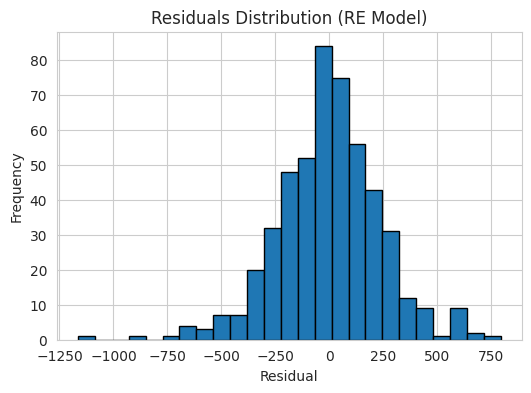

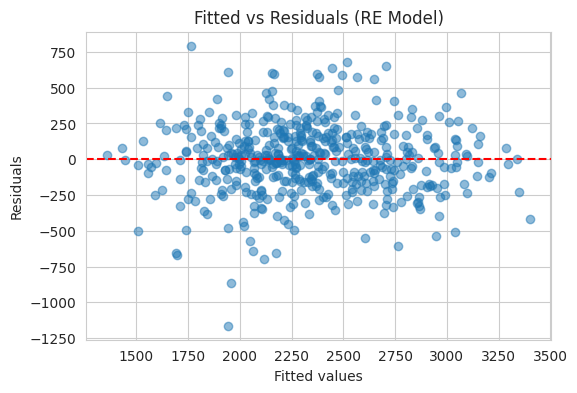

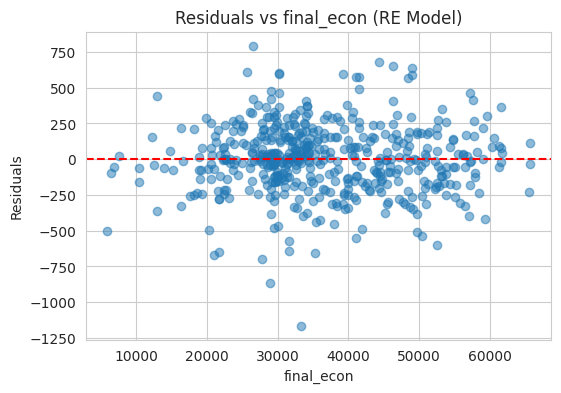

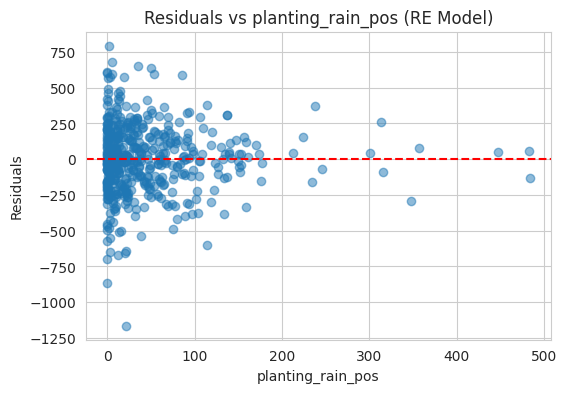

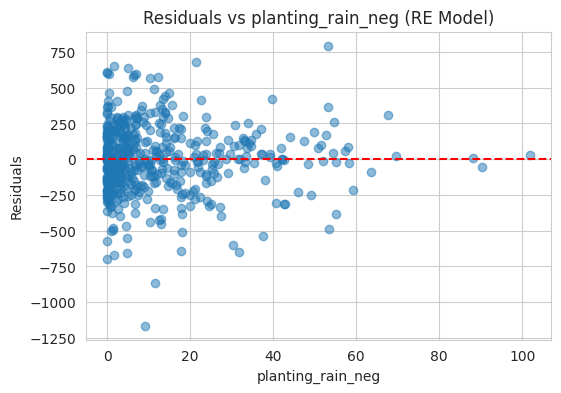

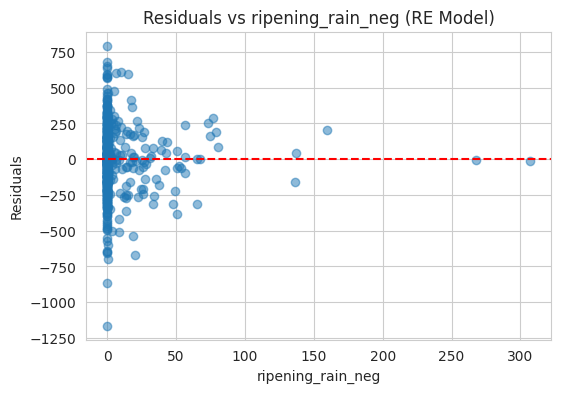

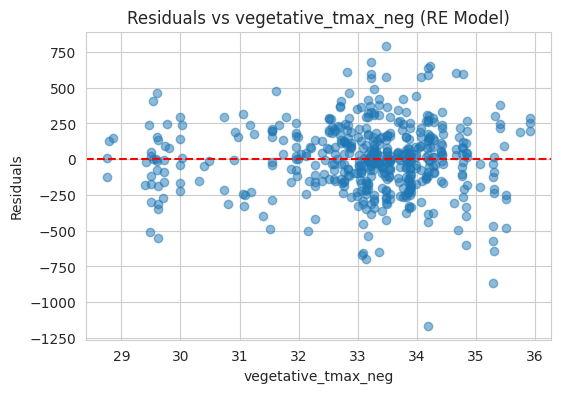

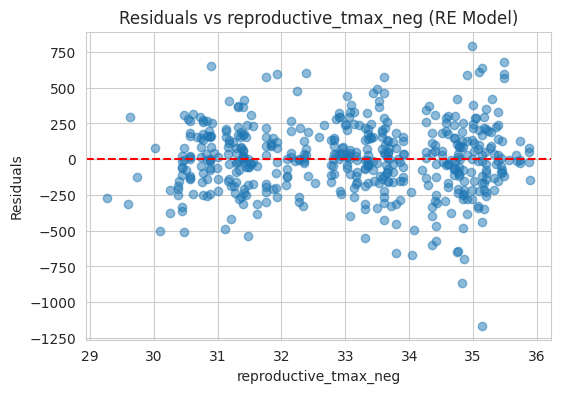

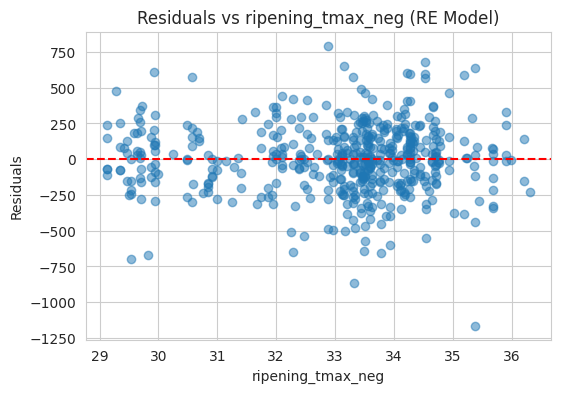

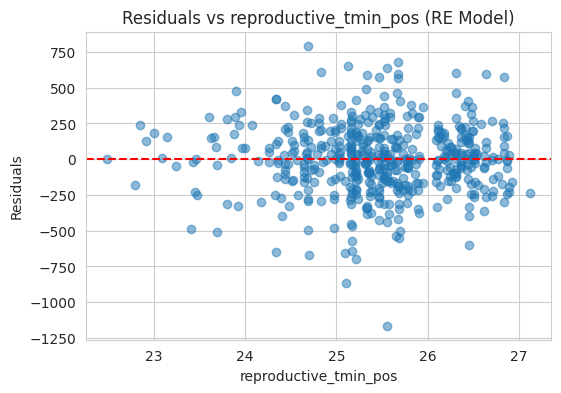

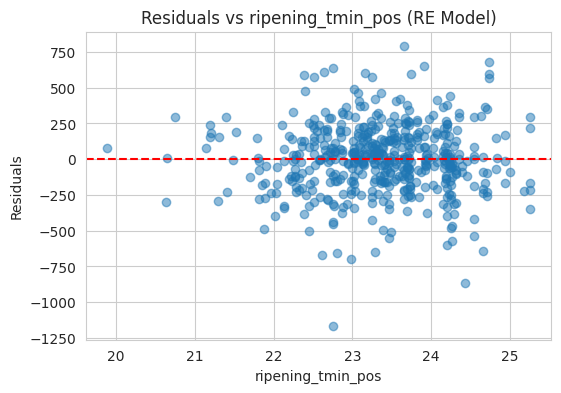

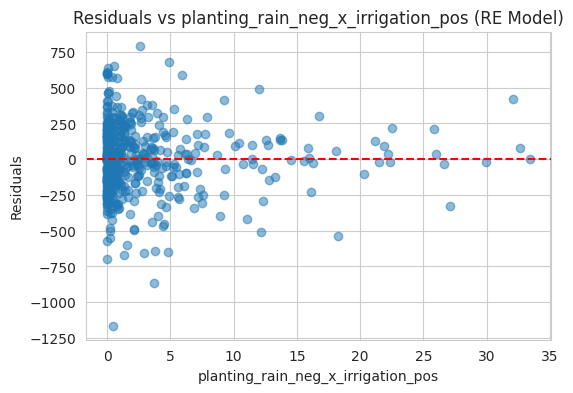

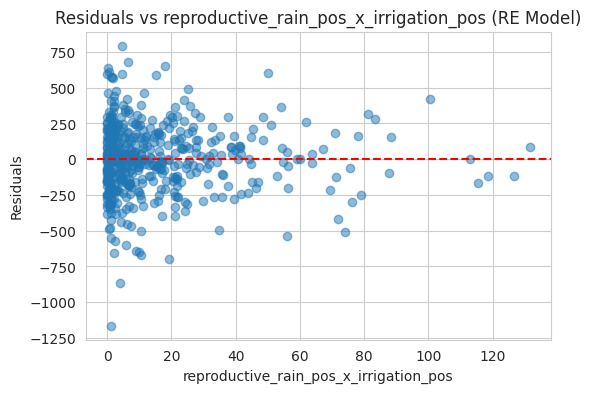

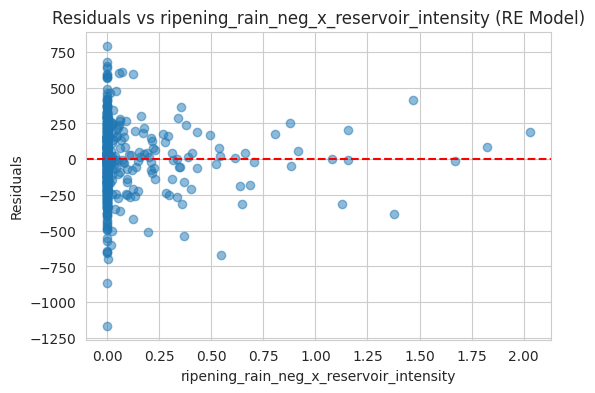


Shapiro-Wilk test: stat=0.9838, p=0.0000
Residuals deviate from normality

RMSE per district (sample period):
District 101: RMSE = 196.153
District 110: RMSE = 263.823
District 112: RMSE = 274.488
District 130: RMSE = 200.677
District 14: RMSE = 183.720
District 145: RMSE = 227.493
District 146: RMSE = 193.615
District 156: RMSE = 221.275
District 157: RMSE = 211.339
District 16: RMSE = 149.567
District 162: RMSE = 298.698
District 164: RMSE = 261.398
District 170: RMSE = 180.619
District 18: RMSE = 279.879
District 19: RMSE = 265.778
District 25: RMSE = 229.844
District 35: RMSE = 281.211
District 42: RMSE = 405.141
District 48: RMSE = 136.463
District 5: RMSE = 199.906
District 60: RMSE = 215.219
District 61: RMSE = 121.703
District 62: RMSE = 365.876
District 7: RMSE = 287.594
District 79: RMSE = 148.205
District 8: RMSE = 291.069
District 92: RMSE = 177.198
District 97: RMSE = 227.837

Overall RMSE (sample period, used rows): 240.287
Saved sample-period predictions (RE model) to s

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== Step M: Regenerate features in val & forecast (auto) ===

=== Validation (2023) prediction (RE) ===


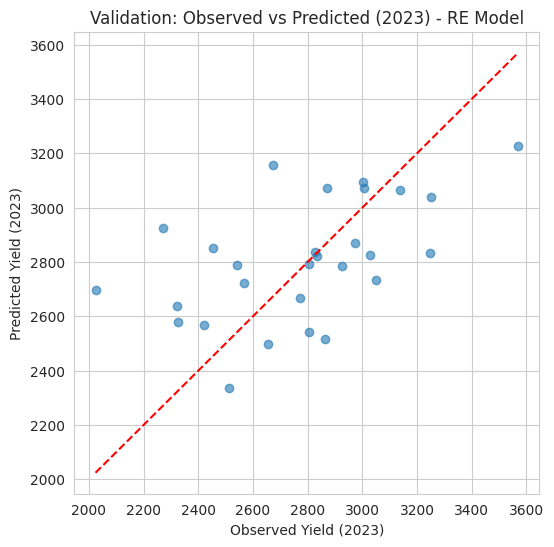

Validation RMSE (2023) - RE Model: 290.659
Saved validation predictions (RE model) to validation_predictions_RE.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== Forecast (2024-2025) prediction (RE) ===
Forecast predictions (RE model):
                  yield_predicted
district_id year                 
101         2024      2963.028214
            2025      2782.349029
110         2024      2445.820719
            2025      2321.929769
112         2024      3194.195972
            2025      3006.423213
130         2024      2783.173911
            2025      2464.233943
14          2024      2552.107640
            2025      2583.337638
145         2024      2841.824649
            2025      2724.788097
146         2024      3309.483604
            2025      3074.946000
156         2024      2816.782815
            2025      2542.847689
157         2024      3015.936845
            2025      2769.940437
16          2024      3024.840957
            2025      2791.658918
162         2024      2963.085551
            2025      2627.819643
164         2024      3295.658973
            2025      3061.567844
170         2024      3150.480721
   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== Random Effects Model Summary ===
Model Type: Random Effects (RE)
Final variables selected: 12
Variables: ['final_econ', 'planting_rain_pos', 'planting_rain_neg', 'ripening_rain_neg', 'vegetative_tmax_neg', 'reproductive_tmax_neg', 'ripening_tmax_neg', 'reproductive_tmin_pos', 'ripening_tmin_pos', 'planting_rain_neg_x_irrigation_pos', 'reproductive_rain_pos_x_irrigation_pos', 'ripening_rain_neg_x_reservoir_intensity']
Training RMSE: 240.287
Validation RMSE (2023): 290.659

RE Model advantages:
- Allows for correlation between individual effects and regressors
- More efficient when individual effects are uncorrelated with regressors
- Better prediction for new units not in training data
- Incorporates both between and within variation

RE Pipeline finished. Final variables used: ['final_econ', 'planting_rain_pos', 'planting_rain_neg', 'ripening_rain_neg', 'vegetative_tmax_neg', 'reproductive_tmax_neg', 'ripening_tmax_neg', 'reproductive_tmin_pos', 'ripening_tmin_pos', 'planting_rain

In [3]:
# =================== FULL RE PIPELINE (robust, feature_map integrated) ===================
# NOTE: Run in a single Colab cell. Converts FEIS to Random Effects (RE) model.

!pip install linearmodels --quiet

# ------------------- Imports -------------------
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import RandomEffects
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# ------------------- User Config -------------------
ZONE_CLUSTER = 4       # change as needed
P_SIGN = 0.10
VIF_THRESH = 10.0
TRAIN_YEARS = list(range(2005,2023))
VAL_YEAR = 2023
FORECAST_YEARS = [2024, 2025]

# ------------------- Upload Data -------------------
from google.colab import files
print("Upload your CSV file (must include yield_val).")
uploaded = files.upload()
fn = list(uploaded.keys())[0]
df = pd.read_csv(fn)

# ------------------- Standardize Columns -------------------
required_cols = ['district_id','year','zone_cluster','yield_val']
for c in required_cols:
    if c not in df.columns:
        raise ValueError(f"Missing required column: {c}")

df = df[(df['year'] >= 2005) & (df['year'] <= 2025)].copy()
df['district_id'] = df['district_id'].astype(str)
df['year'] = df['year'].astype(int)
df['zone_cluster'] = df['zone_cluster'].astype(int)

# ------------------- Candidate variable groups (auto-detect) -------------------
econ_candidates_all = [f for f in df.columns if 'econ' in f.lower()]
irrigation_vars_all = [c for c in ['gw_reciprocal','reservoir_intensity','canal_intensity',
                                   'well_intensity','tank_intensity','oth_intensity'] if c in df.columns]
stress_vars_all = [c for c in ['heat_stress','drought'] if c in df.columns]
rain_weeks_all = [f'rf_week{i}' for i in range(20,43) if f'rf_week{i}' in df.columns]
tmax_weeks_all = [f'tmax_week{i}' for i in range(20,43) if f'tmax_week{i}' in df.columns]
tmin_weeks_all = [f'tmin_week{i}' for i in range(20,43) if f'tmin_week{i}' in df.columns]

all_candidates = list(set(econ_candidates_all + irrigation_vars_all +
                          stress_vars_all + rain_weeks_all +
                          tmax_weeks_all + tmin_weeks_all))

# ------------------- Impute Missing Values (within-district ffill/bfill then median) -------------------
if all_candidates:
    df[all_candidates] = df.groupby('district_id')[all_candidates].transform(lambda g: g.ffill().bfill())
    for col in all_candidates:
        if df[col].isna().any():
            df[col].fillna(df[col].median(), inplace=True)

# Keep districts with at least 2 years
district_counts = df.groupby('district_id')['year'].nunique()
df = df[df['district_id'].isin(district_counts[district_counts >= 2].index)]

print("\nData prepared:", df.shape, "years", df['year'].min(), "to", df['year'].max())
print("Zone clusters available:", sorted(df['zone_cluster'].unique()))

# ------------------- Cluster Subset -------------------
cluster = df[df['zone_cluster'] == ZONE_CLUSTER].copy()
if cluster.empty:
    raise ValueError(f"No data for zone_cluster={ZONE_CLUSTER}")

train = cluster[cluster['year'].isin(TRAIN_YEARS)].copy()
val = cluster[cluster['year'] == VAL_YEAR].copy()
forecast_df = cluster[cluster['year'].isin(FORECAST_YEARS)].copy()

if train.empty:
    raise ValueError(f"No training data for zone_cluster={ZONE_CLUSTER}")

print(f"\nWorking on zone_cluster {ZONE_CLUSTER}: train={len(train)}, val={len(val)}, forecast={len(forecast_df)}")

# ------------------- Helper Functions -------------------
def re_fit(y, X, data):
    """Panel Random Effects fit. X is list of column names in data."""
    try:
        panel = data.set_index(['district_id','year'])
        exog = sm.add_constant(panel[X], has_constant='add')
        mod = RandomEffects(panel[y], exog)
        res = mod.fit(cov_type="robust")
        return res
    except Exception as e:
        print(f"RE fit error: {e}")
        return None

def safe_fit(formula, df):
    try:
        model = sm.OLS.from_formula(formula, df).fit()
        return model
    except Exception:
        return None

# ------------------- Structures to record feature_map & groups -------------------
feature_map = {}
rain_groups = {}
temp_groups = {}
irrig_pos_list, irrig_neg_list = [], []
interaction_kept = []
quad_kept = []

# ------------------- STEP A: Economic Variables -------------------
print("\n=== STEP A: Economic Variable Selection (RE) ===")
econ_candidates = econ_candidates_all.copy()
selected_econ = []

for var in econ_candidates:
    if var not in train.columns:
        continue
    res = re_fit('yield_val', [var], train)
    if res is None:
        continue
    coef = res.params.get(var, np.nan)
    p = res.pvalues.get(var, np.nan)
    print(f" Econ {var}: coef={coef:.6f}, p={p:.4f}")
    if (not np.isnan(p)) and (p < P_SIGN) and (coef > 0):
        if not selected_econ:
            selected_econ = [var]
            print(f" -> selected first econ {var}")
        else:
            avg_name = "econ_avg_temp"
            train[avg_name] = train[selected_econ + [var]].mean(axis=1)
            res_avg = re_fit('yield_val', [avg_name], train)
            if res_avg:
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                coef_avg = res_avg.params.get(avg_name, np.nan)
                cur_avg = "econ_avg_current"
                train[cur_avg] = train[selected_econ].mean(axis=1)
                res_current = re_fit('yield_val', [cur_avg], train)
                p_current = res_current.pvalues.get(cur_avg, np.nan) if res_current else np.nan
                train.drop(columns=[cur_avg], inplace=True, errors='ignore')
                print(f" Averaged {selected_econ + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, vs current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and (p_avg < p_current):
                    selected_econ.append(var)
                    print(f" -> kept {var} in econ group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

if selected_econ:
    train['final_econ'] = train[selected_econ].mean(axis=1)
    if not val.empty:
        val['final_econ'] = val[selected_econ].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['final_econ'] = forecast_df[selected_econ].mean(axis=1)
    base_features = ['final_econ']
    feature_map['final_econ'] = list(selected_econ)
else:
    base_features = []
print("Selected economic vars:", selected_econ)

# ------------------- STEP B: GW & Reservoir -------------------
print("\n=== STEP B: GW reciprocal & Reservoir (RE) ===")
gw_candidates = ['gw_reciprocal','reservoir_intensity']
for v in gw_candidates:
    if v in train.columns:
        features_to_test = base_features + [v]
        res = re_fit('yield_val', features_to_test, train)
        if res is None:
            continue
        coef = res.params.get(v, np.nan)
        p = res.pvalues.get(v, np.nan)
        print(f" {v}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            base_features.append(v)
            feature_map[v] = ('raw', v)
            print(f" -> kept {v}")

print("Base features after Step B:", base_features)

# ------------------- STEP C: Rainfall Weekly -------------------
print("\n=== STEP C: Rainfall Weekly Selection (RE) ===")
stage_weeks = {
    'planting': list(range(20,29)),
    'vegetative': list(range(29,34)),
    'reproductive': list(range(34,39)),
    'ripening': list(range(39,43))
}

for stage, weeks in stage_weeks.items():
    weekly_cols = [f"rf_week{i}" for i in weeks if f"rf_week{i}" in train.columns]
    if not weekly_cols:
        print(f" No weekly rain cols for {stage}, skipping")
        continue

    print(f"\nTesting {stage} weekly cols: {weekly_cols}")
    pos_candidates, neg_candidates = [], []

    for col in weekly_cols:
        res = re_fit('yield_val', base_features + [col], train)
        if res is None:
            continue
        coef = res.params.get(col, np.nan)
        p = res.pvalues.get(col, np.nan)
        print(f" {col}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            if coef > 0:
                pos_candidates.append(col)
                print(f"  -> {col} added to positive candidates")
            else:
                neg_candidates.append(col)
                print(f"  -> {col} added to negative candidates")

    # positive sequential averaging
    selected_pos = []
    for var in pos_candidates:
        if not selected_pos:
            selected_pos = [var]
            print(f" -> Selected first positive var for {stage}: {var}")
        else:
            avg_name = f'{stage}_pos_avg_temp'
            train[avg_name] = train[selected_pos + [var]].mean(axis=1)
            res_avg = re_fit('yield_val', base_features + [avg_name], train)
            if res_avg:
                coef_avg = res_avg.params.get(avg_name, np.nan)
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                if len(selected_pos) == 1:
                    res_current = re_fit('yield_val', base_features + [selected_pos[0]], train)
                    p_current = res_current.pvalues.get(selected_pos[0], np.nan) if res_current else np.nan
                else:
                    cur_avg_name = f'{stage}_current_pos_avg'
                    train[cur_avg_name] = train[selected_pos].mean(axis=1)
                    res_current = re_fit('yield_val', base_features + [cur_avg_name], train)
                    p_current = res_current.pvalues.get(cur_avg_name, np.nan) if res_current else np.nan
                    train.drop(columns=[cur_avg_name], inplace=True, errors='ignore')
                print(f" {stage} pos averaged {selected_pos + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and (p_avg < p_current):
                    selected_pos.append(var)
                    print(f" -> kept {var} in positive group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

    # negative sequential averaging
    selected_neg = []
    for var in neg_candidates:
        if not selected_neg:
            selected_neg = [var]
            print(f" -> Selected first negative var for {stage}: {var}")
        else:
            avg_name = f'{stage}_neg_avg_temp'
            train[avg_name] = train[selected_neg + [var]].mean(axis=1)
            res_avg = re_fit('yield_val', base_features + [avg_name], train)
            if res_avg:
                coef_avg = res_avg.params.get(avg_name, np.nan)
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                if len(selected_neg) == 1:
                    res_current = re_fit('yield_val', base_features + [selected_neg[0]], train)
                    p_current = res_current.pvalues.get(selected_neg[0], np.nan) if res_current else np.nan
                else:
                    cur_avg_name = f'{stage}_current_neg_avg'
                    train[cur_avg_name] = train[selected_neg].mean(axis=1)
                    res_current = re_fit('yield_val', base_features + [cur_avg_name], train)
                    p_current = res_current.pvalues.get(cur_avg_name, np.nan) if res_current else np.nan
                    train.drop(columns=[cur_avg_name], inplace=True, errors='ignore')
                print(f" {stage} neg averaged {selected_neg + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg < 0) and (p_avg < p_current):
                    selected_neg.append(var)
                    print(f" -> kept {var} in negative group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

    # Create aggregated variables and record into feature_map
    rain_groups[stage] = {'pos': selected_pos.copy(), 'neg': selected_neg.copy()}

    if selected_pos:
        cname = f"{stage}_rain_pos"
        train[cname] = train[selected_pos].mean(axis=1)
        if not val.empty:
            val[cname] = val[selected_pos].mean(axis=1)
        if not forecast_df.empty:
            forecast_df[cname] = forecast_df[selected_pos].mean(axis=1)
        base_features.append(cname)
        feature_map[cname] = list(selected_pos)

    if selected_neg:
        cname = f"{stage}_rain_neg"
        train[cname] = train[selected_neg].mean(axis=1)
        if not val.empty:
            val[cname] = val[selected_neg].mean(axis=1)
        if not forecast_df.empty:
            forecast_df[cname] = forecast_df[selected_neg].mean(axis=1)
        base_features.append(cname)
        feature_map[cname] = list(selected_neg)

print("Base features after Step C:", base_features)

# ------------------- STEP D: Temperature Weekly -------------------
print("\n=== STEP D: Temperature Weekly (RE) ===")
for temp in ['tmax','tmin']:
    week_cols = [f"{temp}_week{i}" for i in range(20,43) if f"{temp}_week{i}" in train.columns]
    if not week_cols:
        print(f" No weekly {temp} data found, skipping {temp}")
        continue

    for stage, weeks in stage_weeks.items():
        cols = [f"{temp}_week{i}" for i in weeks if f"{temp}_week{i}" in train.columns]
        if not cols:
            continue

        print(f"\nTesting {temp} for stage {stage}: {cols}")
        pos_candidates, neg_candidates = [], []

        for col in cols:
            res = re_fit('yield_val', base_features + [col], train)
            if res is None:
                continue
            coef = res.params.get(col, np.nan)
            p = res.pvalues.get(col, np.nan)
            print(f" {col}: coef={coef:.6f}, p={p:.4f}")
            if (not np.isnan(p)) and (p < P_SIGN):
                if coef > 0:
                    pos_candidates.append(col)
                    print(f"  -> {col} added to positive candidates")
                else:
                    neg_candidates.append(col)
                    print(f"  -> {col} added to negative candidates")

        # positive sequential averaging
        selected_pos = []
        for var in pos_candidates:
            if not selected_pos:
                selected_pos = [var]
                print(f" -> Selected first positive {temp} var for {stage}: {var}")
            else:
                avg_name = f'{stage}_{temp}_pos_avg_temp'
                train[avg_name] = train[selected_pos + [var]].mean(axis=1)
                features_avg = [f for f in base_features if f not in selected_pos] + [avg_name]
                res_avg = re_fit('yield_val', features_avg, train)
                if res_avg:
                    coef_avg = res_avg.params.get(avg_name, np.nan)
                    p_avg = res_avg.pvalues.get(avg_name, np.nan)
                    prev_ok = True
                    for prev_var in selected_pos:
                        features_prev = [f for f in base_features if f != prev_var] + [prev_var, avg_name]
                        res_prev = re_fit('yield_val', features_prev, train)
                        p_prev = res_prev.pvalues.get(prev_var, np.nan) if res_prev else np.nan
                        if np.isnan(p_prev) or p_prev >= P_SIGN:
                            prev_ok = False
                            break
                    print(f" {stage} {temp} pos averaged {selected_pos + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, prev_ok={prev_ok}")
                    if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and prev_ok:
                        selected_pos.append(var)
                        print(f" -> kept {var} in positive group")
                train.drop(columns=[avg_name], inplace=True, errors='ignore')

        # negative sequential averaging
        selected_neg = []
        for var in neg_candidates:
            if not selected_neg:
                selected_neg = [var]
                print(f" -> Selected first negative {temp} var for {stage}: {var}")
            else:
                avg_name = f'{stage}_{temp}_neg_avg_temp'
                train[avg_name] = train[selected_neg + [var]].mean(axis=1)
                features_avg = [f for f in base_features if f not in selected_neg] + [avg_name]
                res_avg = re_fit('yield_val', features_avg, train)
                if res_avg:
                    coef_avg = res_avg.params.get(avg_name, np.nan)
                    p_avg = res_avg.pvalues.get(avg_name, np.nan)
                    prev_ok = True
                    for prev_var in selected_neg:
                        features_prev = [f for f in base_features if f != prev_var] + [prev_var, avg_name]
                        res_prev = re_fit('yield_val', features_prev, train)
                        p_prev = res_prev.pvalues.get(prev_var, np.nan) if res_prev else np.nan
                        if np.isnan(p_prev) or p_prev >= P_SIGN:
                            prev_ok = False
                            break
                    print(f" {stage} {temp} neg averaged {selected_neg + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, prev_ok={prev_ok}")
                    if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg < 0) and prev_ok:
                        selected_neg.append(var)
                        print(f" -> kept {var} in negative group")
                train.drop(columns=[avg_name], inplace=True, errors='ignore')

        # Aggregate and record
        key = (stage, temp)
        temp_groups[key] = {'pos': selected_pos.copy(), 'neg': selected_neg.copy()}

        if selected_pos:
            cname = f"{stage}_{temp}_pos"
            train[cname] = train[selected_pos].mean(axis=1)
            if not val.empty:
                val[cname] = val[selected_pos].mean(axis=1)
            if not forecast_df.empty:
                forecast_df[cname] = forecast_df[selected_pos].mean(axis=1)
            base_features.append(cname)
            feature_map[cname] = list(selected_pos)

        if selected_neg:
            cname = f"{stage}_{temp}_neg"
            train[cname] = train[selected_neg].mean(axis=1)
            if not val.empty:
                val[cname] = val[selected_neg].mean(axis=1)
            if not forecast_df.empty:
                forecast_df[cname] = forecast_df[selected_neg].mean(axis=1)
            base_features.append(cname)
            feature_map[cname] = list(selected_neg)

print("Base features after Step D (Temp):", base_features)

# ------------------- STEP E: Irrigation -------------------
print("\n=== STEP E: Irrigation (RE) ===")
irrig_pos_list, irrig_neg_list = [], []
irr_vars = [v for v in ['canal_intensity','well_intensity','tank_intensity','oth_intensity'] if v in train.columns]

for v in irr_vars:
    features_to_test = [f for f in base_features if f not in irrig_pos_list + irrig_neg_list] + [v]
    res = re_fit('yield_val', features_to_test, train)
    if res is None:
        continue
    coef = res.params.get(v, np.nan)
    p = res.pvalues.get(v, np.nan)
    print(f" {v}: coef={coef:.6f}, p={p:.4f}")
    if (not np.isnan(p)) and (p < P_SIGN):
        if coef > 0:
            irrig_pos_list.append(v)
            print(f" -> added to irrigation_pos: {v}")
        else:
            irrig_neg_list.append(v)
            print(f" -> added to irrigation_neg: {v}")

if irrig_pos_list:
    train['irrigation_pos'] = train[irrig_pos_list].mean(axis=1)
    if not val.empty:
        val['irrigation_pos'] = val[irrig_pos_list].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['irrigation_pos'] = forecast_df[irrig_pos_list].mean(axis=1)
    base_features.append('irrigation_pos')
    feature_map['irrigation_pos'] = list(irrig_pos_list)

if irrig_neg_list:
    train['irrigation_neg'] = train[irrig_neg_list].mean(axis=1)
    if not val.empty:
        val['irrigation_neg'] = val[irrig_neg_list].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['irrigation_neg'] = forecast_df[irrig_neg_list].mean(axis=1)
    base_features.append('irrigation_neg')
    feature_map['irrigation_neg'] = list(irrig_neg_list)

print("Irrigation pos:", irrig_pos_list, "neg:", irrig_neg_list)
print("Base features after irrigation:", base_features)

# ------------------- STEP F: Stress Variables -------------------
print("\n=== STEP F: Stress Variables (RE) ===")
for s in ['heat_stress','drought']:
    if s in train.columns:
        res = re_fit('yield_val', base_features + [s], train)
        if res is None:
            continue
        coef = res.params.get(s, np.nan)
        p = res.pvalues.get(s, np.nan)
        print(f" {s}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            base_features.append(s)
            feature_map[s] = ('raw', s)
            print(f" -> kept {s}")

print("Base features after stress vars:", base_features)

# ------------------- STEP J: Interactions -------------------
print("\n=== STEP J: Interaction testing (RE) ===")
current_vars = base_features.copy()

rain_cols = [c for c in current_vars if '_rain_' in c]
irr_cols = [c for c in current_vars if c.startswith('irrigation_')]
reservoir_col = 'reservoir_intensity' if 'reservoir_intensity' in train.columns else None

interaction_candidates = []
for r in rain_cols:
    for i in irr_cols:
        interaction_candidates.append((r, i))
if reservoir_col:
    for r in rain_cols:
        interaction_candidates.append((r, reservoir_col))
    for i in irr_cols:
        interaction_candidates.append((i, reservoir_col))

for var1, var2 in interaction_candidates:
    # guard: both vars must exist in train (sometimes groups missing)
    if var1 not in train.columns or var2 not in train.columns:
        continue
    name = f"{var1}_x_{var2}"
    train[name] = train[var1] * train[var2]
    if not val.empty:
        val[name] = val[var1] * val[var2]
    if not forecast_df.empty:
        forecast_df[name] = forecast_df[var1] * forecast_df[var2]

    res = safe_fit("yield_val ~ " + " + ".join(current_vars + [name]), train)
    p_val = res.pvalues.get(name, np.nan) if res is not None else np.nan
    print(f" Interaction {name}: p={p_val:.4f}")
    if (not np.isnan(p_val)) and (p_val < P_SIGN):
        current_vars.append(name)
        interaction_kept.append(name)
        feature_map[name] = ('interaction', var1, var2)
        print(f" -> kept interaction {name}")
    else:
        train.drop(columns=[name], inplace=True, errors='ignore')
        val.drop(columns=[name], inplace=True, errors='ignore')
        forecast_df.drop(columns=[name], inplace=True, errors='ignore')

print("Interactions kept:", interaction_kept)

# ------------------- STEP K: Quadratic Rain -------------------
print("\n=== STEP K: Quadratic rain terms (RE) ===")
quad_kept = []
# use current_vars because interactions may have extended it
rain_cols = [c for c in current_vars if '_rain_' in c]
for rcol in rain_cols:
    if rcol not in train.columns:
        continue
    qname = f"{rcol}_sq"
    train[qname] = train[rcol] ** 2
    if not val.empty:
        val[qname] = val[rcol] ** 2
    if not forecast_df.empty:
        forecast_df[qname] = forecast_df[rcol] ** 2

    res = safe_fit("yield_val ~ " + " + ".join(current_vars + [qname]), train)
    p_val = res.pvalues.get(qname, np.nan) if res is not None else np.nan
    print(f" Quadratic {qname}: p={p_val:.4f}")
    if (not np.isnan(p_val)) and (p_val < P_SIGN):
        current_vars.append(qname)
        quad_kept.append(qname)
        feature_map[qname] = ('sq', rcol)
        print(f" -> kept quadratic {qname}")
    else:
        train.drop(columns=[qname], inplace=True, errors='ignore')
        val.drop(columns=[qname], inplace=True, errors='ignore')
        forecast_df.drop(columns=[qname], inplace=True, errors='ignore')

print("Quadratic kept:", quad_kept)

# ------------------- STEP L: VIF & p-value pruning -------------------
print("\n=== STEP L: VIF & p-value pruning (RE) ===")
final_vars = current_vars.copy()
train_panel = train.set_index(['district_id','year']).sort_index()

def calculate_vif(df, vars_list):
    try:
        X = sm.add_constant(df[vars_list], has_constant='add')
        vif_data = pd.DataFrame()
        vif_data['variable'] = vars_list
        vifs = []
        for i in range(len(vars_list)):
            try:
                vifs.append(variance_inflation_factor(X.values, i+1))
            except Exception:
                vifs.append(np.nan)
        vif_data['VIF'] = vifs
        return vif_data
    except Exception as e:
        return pd.DataFrame({'variable': vars_list, 'VIF': [np.nan]*len(vars_list)})

iteration = 0
while True:
    iteration += 1
    print(f"\nIteration {iteration}: computing VIF")
    vif_df = calculate_vif(train_panel, final_vars)
    print(vif_df)
    # handle all-NaN VIF_df
    if vif_df['VIF'].dropna().empty:
        print("VIFs not available / all NaN; stop VIF pruning.")
        break
    max_vif = vif_df['VIF'].max()
    if max_vif > VIF_THRESH:
        drop_var = vif_df.loc[vif_df['VIF'] == max_vif, 'variable'].values[0]
        print(f" -> dropping {drop_var} due to high VIF {max_vif:.2f}")
        if drop_var in final_vars:
            final_vars.remove(drop_var)
        train_panel.drop(columns=[drop_var], inplace=True, errors='ignore')
        feature_map.pop(drop_var, None)
        continue

    # Fit RandomEffects and check p-values
    X_tmp = sm.add_constant(train_panel[final_vars], has_constant='add')
    y_tmp = train_panel['yield_val']
    try:
        model = RandomEffects(y_tmp, X_tmp).fit(cov_type='robust')
    except Exception as e:
        print(" RandomEffects error during pruning:", e)
        break

    pvals = model.pvalues.drop('const', errors='ignore')
    if (pvals >= P_SIGN).any():
        drop_var = pvals.idxmax()
        print(f" -> dropping {drop_var} due to high p-value {pvals[drop_var]:.4f}")
        if drop_var in final_vars:
            final_vars.remove(drop_var)
        train_panel.drop(columns=[drop_var], inplace=True, errors='ignore')
        feature_map.pop(drop_var, None)
        continue
    else:
        print("All VIFs and p-values OK")
        break

print("\nFinal selected variables (auto-detected):", final_vars)

# ------------------- Final RE Model -------------------
print("\n=== Fitting final RE model ===")
train_panel = train.set_index(['district_id','year']).sort_index()
# ensure final_vars exist in train_panel (if not, remove missing)
final_vars = [v for v in final_vars if v in train_panel.columns]
X_final = sm.add_constant(train_panel[final_vars], has_constant='add')
y_final = train_panel['yield_val']
res_final = RandomEffects(y_final, X_final).fit(cov_type='robust')
print(res_final.summary)

# ------------------- SAFE Residual Diagnostics & RMSE -------------------
# Build X_full and y_full then determine used rows (no-NaN)
X_full = sm.add_constant(train_panel[final_vars], has_constant='add')
y_full = train_panel['yield_val']
used_mask = X_full.notnull().all(axis=1) & y_full.notnull()
used_index = X_full.index[used_mask]

if len(used_index) == 0:
    raise ValueError("No usable rows for diagnostics after filtering missing values.")

# Fitted using params (only for used_index)
fitted_used = pd.Series(X_full.loc[used_index].dot(res_final.params), index=used_index, name='fitted')

# Create fitted aligned to full train_panel index (NaNs where not available)
fitted = fitted_used.reindex(train_panel.index)

# Residuals (NaN where fitted missing)
residuals = y_full - fitted

print("\nResidual summary statistics (used rows only):")
print(residuals.dropna().describe())

# Plots (drop NaNs where appropriate)
plt.figure(figsize=(6,4))
plt.hist(residuals.dropna(), bins=25, edgecolor='k')
plt.title("Residuals Distribution (RE Model)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(fitted.dropna(), residuals.dropna(), alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Fitted vs Residuals (RE Model)")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

for var in final_vars:
    if var in X_final.columns:
        plt.figure(figsize=(6,4))
        # align predictor to same index subset
        plt.scatter(X_final[var].loc[fitted.dropna().index], residuals.dropna(), alpha=0.5)
        plt.axhline(0, color='red', linestyle='--')
        plt.title(f"Residuals vs {var} (RE Model)")
        plt.xlabel(var)
        plt.ylabel("Residuals")
        plt.show()

# Shapiro-Wilk
resid_nonan = residuals.dropna()
if len(resid_nonan) >= 3:
    stat, p_sw = shapiro(resid_nonan)
    print(f"\nShapiro-Wilk test: stat={stat:.4f}, p={p_sw:.4f}")
    print("Residuals roughly normal" if p_sw > 0.05 else "Residuals deviate from normality")
else:
    print("\nNot enough residuals for Shapiro-Wilk test (need >=3).")

# RMSE per district (safe drop NaNs)
rmse_dict = {}
for d in train_panel.index.get_level_values('district_id').unique():
    y_true = y_full.xs(d, level='district_id')
    y_pred = fitted.xs(d, level='district_id')
    df_tmp = pd.concat([y_true, y_pred], axis=1, keys=['y_true','y_pred']).dropna()
    if not df_tmp.empty:
        rmse_dict[d] = np.sqrt(mean_squared_error(df_tmp['y_true'], df_tmp['y_pred']))

print("\nRMSE per district (sample period):")
for d, r in rmse_dict.items():
    print(f"District {d}: RMSE = {r:.3f}")

# Overall RMSE (drop NaNs)
df_all = pd.concat([y_full, fitted], axis=1, keys=['y_true', 'y_pred']).dropna()
overall_rmse = np.sqrt(mean_squared_error(df_all['y_true'], df_all['y_pred']))
print(f"\nOverall RMSE (sample period, used rows): {overall_rmse:.3f}")

# ------------------- Save sample-period actual vs predicted CSV -------------------
df_out = pd.DataFrame({
    'district_id': train_panel.reset_index()['district_id'],
    'year': train_panel.reset_index()['year'],
    'district': train_panel.reset_index()['district'] if 'district' in train_panel.reset_index().columns else None,
    'state': train_panel.reset_index()['state'] if 'state' in train_panel.reset_index().columns else None,
    'yield_actual': y_final.values,
    'yield_predicted': fitted.values
})

out_file = "sample_predictions_RE.csv"
df_out.to_csv(out_file, index=False)
print(f"Saved sample-period predictions (RE model) to {out_file}")
try:
    files.download(out_file)
except Exception:
    pass

# ------------------- Feature Regeneration Utility -------------------
def regenerate_features(df_in, feature_map, fill_value=0.0, max_iters=20):
    """Rebuild derived features for df_in using the feature_map.
       Safe: missing raw columns are filled with fill_value (scalar)."""
    df = df_in.copy()
    # prefill missing raw columns referenced in feature_map with fill_value
    for rule in feature_map.values():
        if isinstance(rule, list):
            for c in rule:
                if c not in df.columns:
                    df[c] = fill_value
        elif isinstance(rule, tuple) and rule[0] == 'raw':
            col = rule[1]
            if col not in df.columns:
                df[col] = fill_value

    it = 0
    while it < max_iters:
        it += 1
        changed = False
        for feat, rule in feature_map.items():
            if feat in df.columns:
                continue
            try:
                if isinstance(rule, list):
                    if all([c in df.columns for c in rule]):
                        df[feat] = df[rule].mean(axis=1)
                        changed = True
                elif isinstance(rule, tuple):
                    if rule[0] == 'sq' and rule[1] in df.columns:
                        df[feat] = df[rule[1]] ** 2
                        changed = True
                    elif rule[0] == 'interaction':
                        v1, v2 = rule[1], rule[2]
                        if v1 in df.columns and v2 in df.columns:
                            df[feat] = df[v1] * df[v2]
                            changed = True
                    elif rule[0] == 'raw' and rule[1] in df.columns:
                        df[feat] = df[rule[1]]
                        changed = True
                else:
                    # if rule is string (alias)
                    if isinstance(rule, str) and rule in df.columns:
                        df[feat] = df[rule]
                        changed = True
            except Exception:
                pass
        if not changed:
            break
    return df

# -------------------- Step M: Regenerate features in val & forecast --------------------
print("\n=== Step M: Regenerate features in val & forecast (auto) ===")
if not val.empty:
    val = regenerate_features(val, feature_map)
if not forecast_df.empty:
    forecast_df = regenerate_features(forecast_df, feature_map)

# Ensure all final_vars present in val & forecast (fill with median from train or 0)
for col in final_vars:
    if not val.empty and col not in val.columns:
        val[col] = train[col].median() if col in train.columns else 0.0
    if not forecast_df.empty and col not in forecast_df.columns:
        forecast_df[col] = train[col].median() if col in train.columns else 0.0

# ------------------- Validation (2023) prediction -------------------
print("\n=== Validation (2023) prediction (RE) ===")
if not val.empty and VAL_YEAR in val['year'].unique():
    val_panel = val.set_index(['district_id','year']).sort_index()
    X_val = sm.add_constant(val_panel[final_vars], has_constant='add')
    # ensure all params columns exist in X_val
    for col in res_final.params.index:
        if col == 'const':
            continue
        if col not in X_val.columns:
            X_val[col] = 0.0
    X_val = X_val[res_final.params.index]  # reorder to match params
    y_val = val_panel['yield_val']
    y_pred_val = pd.Series(X_val.dot(res_final.params), index=X_val.index, name='yield_predicted')

    # align and drop NaNs for RMSE & plotting
    df_val_check = pd.concat([y_val, y_pred_val], axis=1).dropna()
    if df_val_check.empty:
        print("No valid validation rows after alignment (all NaN).")
    else:
        plt.figure(figsize=(6,6))
        plt.scatter(df_val_check.iloc[:,0], df_val_check.iloc[:,1], alpha=0.6)
        mn = min(df_val_check.iloc[:,0].min(), df_val_check.iloc[:,1].min())
        mx = max(df_val_check.iloc[:,0].max(), df_val_check.iloc[:,1].max())
        plt.plot([mn,mx],[mn,mx],'r--')
        plt.xlabel("Observed Yield (2023)")
        plt.ylabel("Predicted Yield (2023)")
        plt.title(f"Validation: Observed vs Predicted ({VAL_YEAR}) - RE Model")
        plt.show()

        val_rmse = np.sqrt(mean_squared_error(df_val_check.iloc[:,0], df_val_check.iloc[:,1]))
        print(f"Validation RMSE (2023) - RE Model: {val_rmse:.3f}")

# ------------------- Save validation (2023) actual vs predicted CSV -------------------
if not val.empty and VAL_YEAR in val['year'].unique():
    val_panel = val.set_index(['district_id','year']).sort_index()
    X_val = sm.add_constant(val_panel[final_vars], has_constant='add')
    y_val = val_panel['yield_val'] if 'yield_val' in val_panel.columns else None

    val_pred = pd.Series(X_val.dot(res_final.params), index=val_panel.index, name='yield_predicted')

    val_out = val_panel.reset_index()[['district_id','year']].copy()
    if 'district' in val.columns:
        val_out['district'] = val_out['district_id'].map(val.set_index('district_id')['district'])
    if 'state' in val.columns:
        val_out['state'] = val_out['district_id'].map(val.set_index('district_id')['state'])

    val_out['yield_predicted'] = val_pred.values
    if y_val is not None:
        val_out['yield_actual'] = y_val.values

    out_val = "validation_predictions_RE.csv"
    val_out.to_csv(out_val, index=False)
    print(f"Saved validation predictions (RE model) to {out_val}")
    try:
        files.download(out_val)
    except Exception:
        pass

# ------------------- Forecast (2024-2025) prediction -------------------
print("\n=== Forecast (2024-2025) prediction (RE) ===")
if not forecast_df.empty:
    forecast_panel = forecast_df.set_index(['district_id','year']).sort_index()
    X_fore = sm.add_constant(forecast_panel[final_vars], has_constant='add')
    for col in res_final.params.index:
        if col == 'const':
            continue
        if col not in X_fore.columns:
            X_fore[col] = 0.0
    X_fore = X_fore[res_final.params.index]
    y_fore_pred = pd.Series(X_fore.dot(res_final.params), index=X_fore.index, name='yield_predicted')

    # attach forecast predictions back to panel
    forecast_out = forecast_panel.copy()
    forecast_out['yield_predicted'] = np.nan
    forecast_out.loc[y_fore_pred.index, 'yield_predicted'] = y_fore_pred.values

    print("Forecast predictions (RE model):")
    print(forecast_out[['yield_predicted']].dropna().head(40))

# ------------------- Save forecast (2024–2025) CSV -------------------
if not forecast_df.empty:
    forecast_panel = forecast_df.set_index(['district_id','year']).sort_index()
    X_forecast = sm.add_constant(forecast_panel[final_vars], has_constant='add')
    forecast_pred = pd.Series(X_forecast.dot(res_final.params),
                              index=forecast_panel.index, name='yield_forecasted')

    forecast_out = pd.DataFrame({
        'district_id': forecast_panel.index.get_level_values('district_id'),
        'year': forecast_panel.index.get_level_values('year'),
        'yield_forecasted': forecast_pred.values
    })

    # merge back district + state safely (no uniqueness assumption)
    forecast_out = forecast_out.merge(
        df[['district_id','district','state']].drop_duplicates(),
        on='district_id', how='left'
    )

    out_forecast = "forecast_predictions_RE.csv"
    forecast_out.to_csv(out_forecast, index=False)
    print(f"Saved forecast predictions (RE model) to {out_forecast}")
    try:
        files.download(out_forecast)
    except Exception:
        pass

# ------------------- Model Comparison Summary -------------------
print("\n=== Random Effects Model Summary ===")
print(f"Model Type: Random Effects (RE)")
print(f"Final variables selected: {len(final_vars)}")
print(f"Variables: {final_vars}")
print(f"Training RMSE: {overall_rmse:.3f}")
if not val.empty and VAL_YEAR in val['year'].unique():
    print(f"Validation RMSE (2023): {val_rmse:.3f}")

print("\nRE Model advantages:")
print("- Allows for correlation between individual effects and regressors")
print("- More efficient when individual effects are uncorrelated with regressors")
print("- Better prediction for new units not in training data")
print("- Incorporates both between and within variation")

# ------------------- Done -------------------
print("\nRE Pipeline finished. Final variables used:", final_vars)
print("Feature map keys (sample):", list(feature_map.keys())[:40])

<font color ='blue'> <font size ='6'> **Zone_cluster=5**

Upload your CSV file (must include yield_val).


Saving data1.csv to data1 (3).csv

Data prepared: (3612, 209) years 2005 to 2025
Zone clusters available: [np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]

Working on zone_cluster 5: train=378, val=21, forecast=42

=== STEP A: Economic Variable Selection (RE) ===
 Econ econ_inc_rev1: coef=0.030299, p=0.0000
 -> selected first econ econ_inc_rev1
 Econ econ_inc_rev2: coef=0.023591, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev2'] -> coef=0.026752, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev3: coef=0.032199, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev3'] -> coef=0.033065, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev4: coef=0.024776, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev4'] -> coef=0.027952, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev5: coef=0.028437, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev5'] -> coef=0.029549, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev6: coef=0.025970, p=0.0000
 Averaged ['econ_inc_rev1'

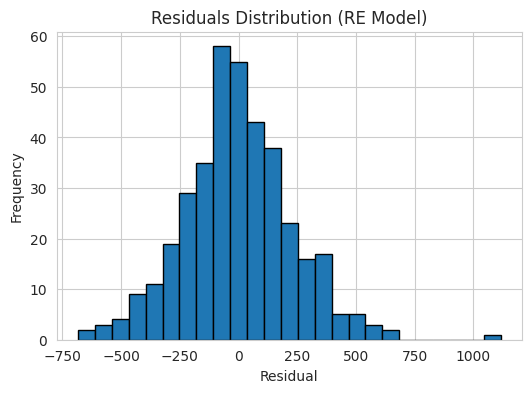

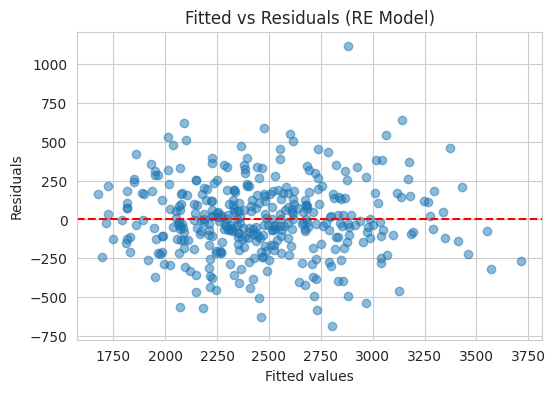

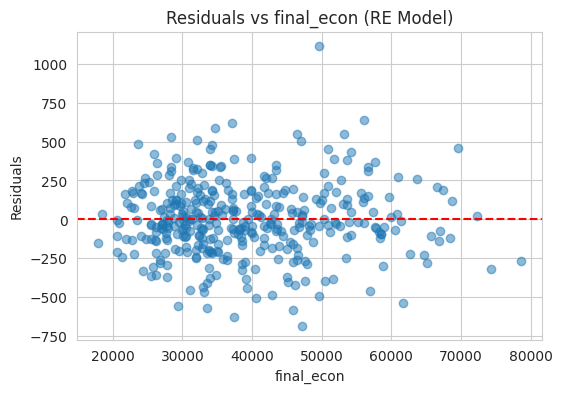

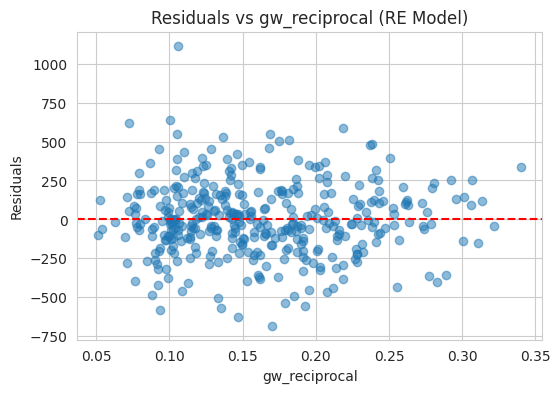

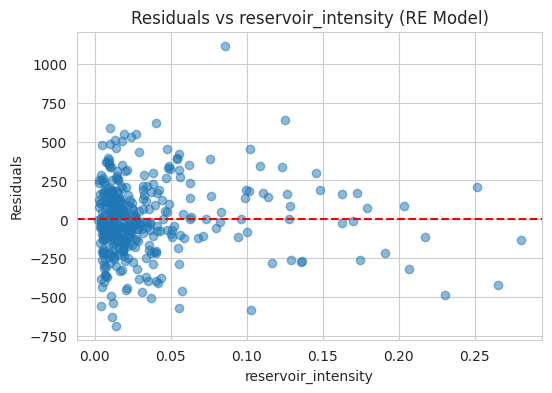

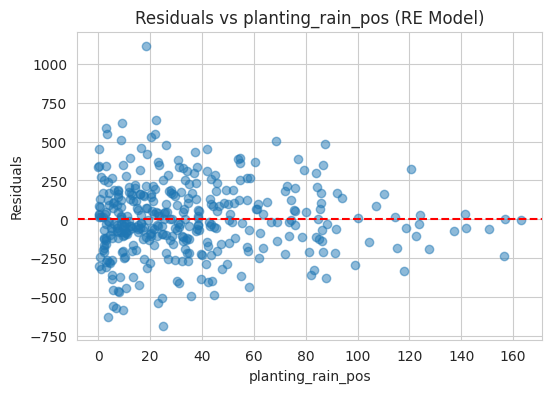

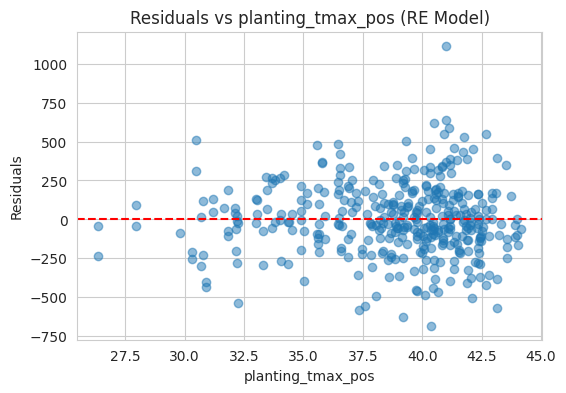

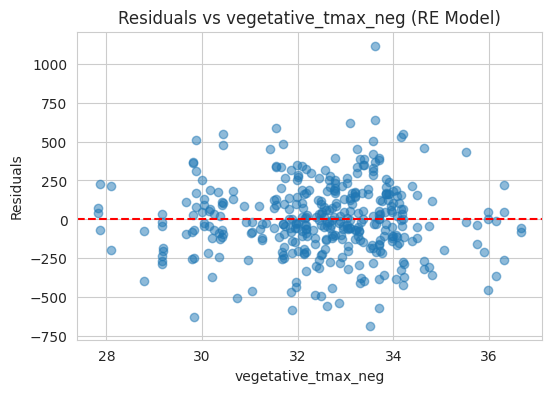

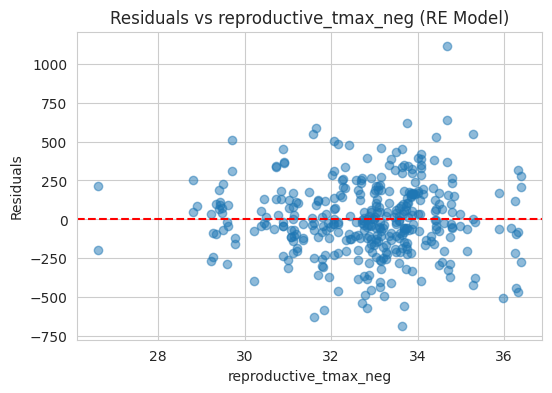

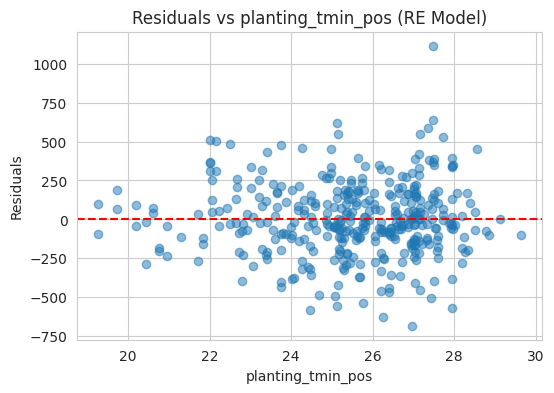

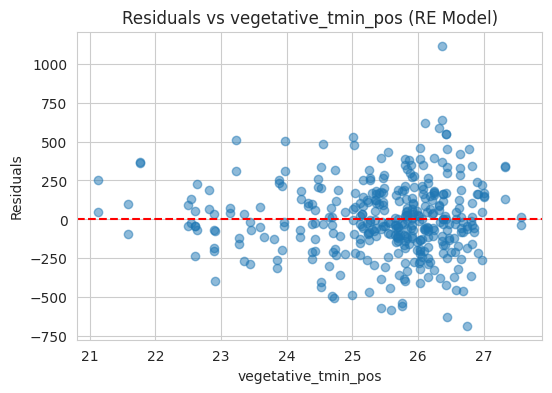

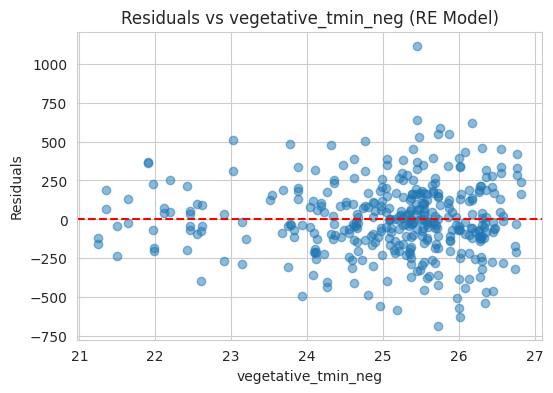

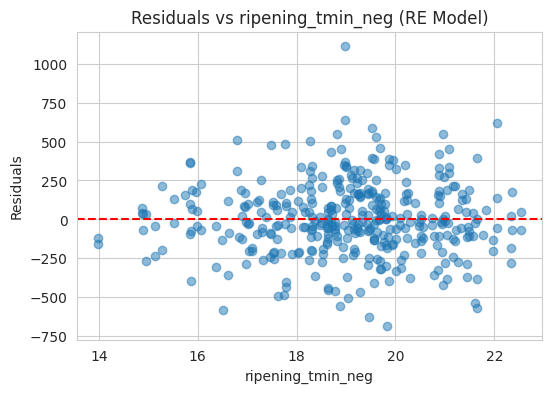


Shapiro-Wilk test: stat=0.9874, p=0.0023
Residuals deviate from normality

RMSE per district (sample period):
District 114: RMSE = 174.667
District 117: RMSE = 228.984
District 129: RMSE = 220.095
District 131: RMSE = 139.122
District 134: RMSE = 158.540
District 141: RMSE = 190.418
District 151: RMSE = 272.686
District 161: RMSE = 239.185
District 169: RMSE = 296.352
District 21: RMSE = 279.460
District 22: RMSE = 267.542
District 31: RMSE = 207.101
District 32: RMSE = 171.437
District 51: RMSE = 302.924
District 54: RMSE = 148.045
District 70: RMSE = 175.451
District 85: RMSE = 397.045
District 86: RMSE = 235.380
District 87: RMSE = 185.862
District 95: RMSE = 208.579
District 99: RMSE = 247.985

Overall RMSE (sample period, used rows): 234.068
Saved sample-period predictions (RE model) to sample_predictions_RE.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== Step M: Regenerate features in val & forecast (auto) ===

=== Validation (2023) prediction (RE) ===


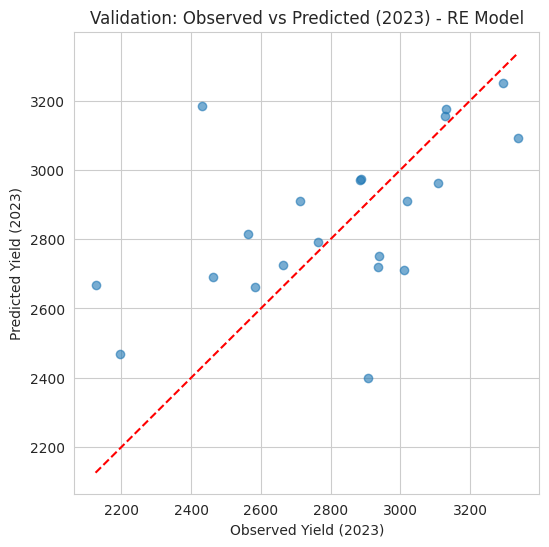

Validation RMSE (2023) - RE Model: 279.717
Saved validation predictions (RE model) to validation_predictions_RE.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== Forecast (2024-2025) prediction (RE) ===
Forecast predictions (RE model):
                  yield_predicted
district_id year                 
114         2024      3190.474248
            2025      3012.813355
117         2024      2917.361981
            2025      2886.089204
129         2024      2861.674926
            2025      2767.953356
131         2024      3138.817710
            2025      2988.480565
134         2024      3206.251306
            2025      3061.987219
141         2024      2756.424786
            2025      2781.614027
151         2024      3337.873069
            2025      3197.732009
161         2024      3138.078279
            2025      3024.296338
169         2024      2637.063913
            2025      2493.440694
21          2024      3271.471240
            2025      3094.366309
22          2024      3260.501514
            2025      3008.657022
31          2024      2878.385295
            2025      2848.779246
32          2024      2647.145372
   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== Random Effects Model Summary ===
Model Type: Random Effects (RE)
Final variables selected: 11
Variables: ['final_econ', 'gw_reciprocal', 'reservoir_intensity', 'planting_rain_pos', 'planting_tmax_pos', 'vegetative_tmax_neg', 'reproductive_tmax_neg', 'planting_tmin_pos', 'vegetative_tmin_pos', 'vegetative_tmin_neg', 'ripening_tmin_neg']
Training RMSE: 234.068
Validation RMSE (2023): 279.717

RE Model advantages:
- Allows for correlation between individual effects and regressors
- More efficient when individual effects are uncorrelated with regressors
- Better prediction for new units not in training data
- Incorporates both between and within variation

RE Pipeline finished. Final variables used: ['final_econ', 'gw_reciprocal', 'reservoir_intensity', 'planting_rain_pos', 'planting_tmax_pos', 'vegetative_tmax_neg', 'reproductive_tmax_neg', 'planting_tmin_pos', 'vegetative_tmin_pos', 'vegetative_tmin_neg', 'ripening_tmin_neg']
Feature map keys (sample): ['final_econ', 'gw_reciprocal'

In [4]:
# =================== FULL RE PIPELINE (robust, feature_map integrated) ===================
# NOTE: Run in a single Colab cell. Converts FEIS to Random Effects (RE) model.

!pip install linearmodels --quiet

# ------------------- Imports -------------------
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import RandomEffects
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# ------------------- User Config -------------------
ZONE_CLUSTER = 5       # change as needed
P_SIGN = 0.10
VIF_THRESH = 10.0
TRAIN_YEARS = list(range(2005,2023))
VAL_YEAR = 2023
FORECAST_YEARS = [2024, 2025]

# ------------------- Upload Data -------------------
from google.colab import files
print("Upload your CSV file (must include yield_val).")
uploaded = files.upload()
fn = list(uploaded.keys())[0]
df = pd.read_csv(fn)

# ------------------- Standardize Columns -------------------
required_cols = ['district_id','year','zone_cluster','yield_val']
for c in required_cols:
    if c not in df.columns:
        raise ValueError(f"Missing required column: {c}")

df = df[(df['year'] >= 2005) & (df['year'] <= 2025)].copy()
df['district_id'] = df['district_id'].astype(str)
df['year'] = df['year'].astype(int)
df['zone_cluster'] = df['zone_cluster'].astype(int)

# ------------------- Candidate variable groups (auto-detect) -------------------
econ_candidates_all = [f for f in df.columns if 'econ' in f.lower()]
irrigation_vars_all = [c for c in ['gw_reciprocal','reservoir_intensity','canal_intensity',
                                   'well_intensity','tank_intensity','oth_intensity'] if c in df.columns]
stress_vars_all = [c for c in ['heat_stress','drought'] if c in df.columns]
rain_weeks_all = [f'rf_week{i}' for i in range(20,43) if f'rf_week{i}' in df.columns]
tmax_weeks_all = [f'tmax_week{i}' for i in range(20,43) if f'tmax_week{i}' in df.columns]
tmin_weeks_all = [f'tmin_week{i}' for i in range(20,43) if f'tmin_week{i}' in df.columns]

all_candidates = list(set(econ_candidates_all + irrigation_vars_all +
                          stress_vars_all + rain_weeks_all +
                          tmax_weeks_all + tmin_weeks_all))

# ------------------- Impute Missing Values (within-district ffill/bfill then median) -------------------
if all_candidates:
    df[all_candidates] = df.groupby('district_id')[all_candidates].transform(lambda g: g.ffill().bfill())
    for col in all_candidates:
        if df[col].isna().any():
            df[col].fillna(df[col].median(), inplace=True)

# Keep districts with at least 2 years
district_counts = df.groupby('district_id')['year'].nunique()
df = df[df['district_id'].isin(district_counts[district_counts >= 2].index)]

print("\nData prepared:", df.shape, "years", df['year'].min(), "to", df['year'].max())
print("Zone clusters available:", sorted(df['zone_cluster'].unique()))

# ------------------- Cluster Subset -------------------
cluster = df[df['zone_cluster'] == ZONE_CLUSTER].copy()
if cluster.empty:
    raise ValueError(f"No data for zone_cluster={ZONE_CLUSTER}")

train = cluster[cluster['year'].isin(TRAIN_YEARS)].copy()
val = cluster[cluster['year'] == VAL_YEAR].copy()
forecast_df = cluster[cluster['year'].isin(FORECAST_YEARS)].copy()

if train.empty:
    raise ValueError(f"No training data for zone_cluster={ZONE_CLUSTER}")

print(f"\nWorking on zone_cluster {ZONE_CLUSTER}: train={len(train)}, val={len(val)}, forecast={len(forecast_df)}")

# ------------------- Helper Functions -------------------
def re_fit(y, X, data):
    """Panel Random Effects fit. X is list of column names in data."""
    try:
        panel = data.set_index(['district_id','year'])
        exog = sm.add_constant(panel[X], has_constant='add')
        mod = RandomEffects(panel[y], exog)
        res = mod.fit(cov_type="robust")
        return res
    except Exception as e:
        print(f"RE fit error: {e}")
        return None

def safe_fit(formula, df):
    try:
        model = sm.OLS.from_formula(formula, df).fit()
        return model
    except Exception:
        return None

# ------------------- Structures to record feature_map & groups -------------------
feature_map = {}
rain_groups = {}
temp_groups = {}
irrig_pos_list, irrig_neg_list = [], []
interaction_kept = []
quad_kept = []

# ------------------- STEP A: Economic Variables -------------------
print("\n=== STEP A: Economic Variable Selection (RE) ===")
econ_candidates = econ_candidates_all.copy()
selected_econ = []

for var in econ_candidates:
    if var not in train.columns:
        continue
    res = re_fit('yield_val', [var], train)
    if res is None:
        continue
    coef = res.params.get(var, np.nan)
    p = res.pvalues.get(var, np.nan)
    print(f" Econ {var}: coef={coef:.6f}, p={p:.4f}")
    if (not np.isnan(p)) and (p < P_SIGN) and (coef > 0):
        if not selected_econ:
            selected_econ = [var]
            print(f" -> selected first econ {var}")
        else:
            avg_name = "econ_avg_temp"
            train[avg_name] = train[selected_econ + [var]].mean(axis=1)
            res_avg = re_fit('yield_val', [avg_name], train)
            if res_avg:
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                coef_avg = res_avg.params.get(avg_name, np.nan)
                cur_avg = "econ_avg_current"
                train[cur_avg] = train[selected_econ].mean(axis=1)
                res_current = re_fit('yield_val', [cur_avg], train)
                p_current = res_current.pvalues.get(cur_avg, np.nan) if res_current else np.nan
                train.drop(columns=[cur_avg], inplace=True, errors='ignore')
                print(f" Averaged {selected_econ + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, vs current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and (p_avg < p_current):
                    selected_econ.append(var)
                    print(f" -> kept {var} in econ group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

if selected_econ:
    train['final_econ'] = train[selected_econ].mean(axis=1)
    if not val.empty:
        val['final_econ'] = val[selected_econ].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['final_econ'] = forecast_df[selected_econ].mean(axis=1)
    base_features = ['final_econ']
    feature_map['final_econ'] = list(selected_econ)
else:
    base_features = []
print("Selected economic vars:", selected_econ)

# ------------------- STEP B: GW & Reservoir -------------------
print("\n=== STEP B: GW reciprocal & Reservoir (RE) ===")
gw_candidates = ['gw_reciprocal','reservoir_intensity']
for v in gw_candidates:
    if v in train.columns:
        features_to_test = base_features + [v]
        res = re_fit('yield_val', features_to_test, train)
        if res is None:
            continue
        coef = res.params.get(v, np.nan)
        p = res.pvalues.get(v, np.nan)
        print(f" {v}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            base_features.append(v)
            feature_map[v] = ('raw', v)
            print(f" -> kept {v}")

print("Base features after Step B:", base_features)

# ------------------- STEP C: Rainfall Weekly -------------------
print("\n=== STEP C: Rainfall Weekly Selection (RE) ===")
stage_weeks = {
    'planting': list(range(20,29)),
    'vegetative': list(range(29,34)),
    'reproductive': list(range(34,39)),
    'ripening': list(range(39,43))
}

for stage, weeks in stage_weeks.items():
    weekly_cols = [f"rf_week{i}" for i in weeks if f"rf_week{i}" in train.columns]
    if not weekly_cols:
        print(f" No weekly rain cols for {stage}, skipping")
        continue

    print(f"\nTesting {stage} weekly cols: {weekly_cols}")
    pos_candidates, neg_candidates = [], []

    for col in weekly_cols:
        res = re_fit('yield_val', base_features + [col], train)
        if res is None:
            continue
        coef = res.params.get(col, np.nan)
        p = res.pvalues.get(col, np.nan)
        print(f" {col}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            if coef > 0:
                pos_candidates.append(col)
                print(f"  -> {col} added to positive candidates")
            else:
                neg_candidates.append(col)
                print(f"  -> {col} added to negative candidates")

    # positive sequential averaging
    selected_pos = []
    for var in pos_candidates:
        if not selected_pos:
            selected_pos = [var]
            print(f" -> Selected first positive var for {stage}: {var}")
        else:
            avg_name = f'{stage}_pos_avg_temp'
            train[avg_name] = train[selected_pos + [var]].mean(axis=1)
            res_avg = re_fit('yield_val', base_features + [avg_name], train)
            if res_avg:
                coef_avg = res_avg.params.get(avg_name, np.nan)
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                if len(selected_pos) == 1:
                    res_current = re_fit('yield_val', base_features + [selected_pos[0]], train)
                    p_current = res_current.pvalues.get(selected_pos[0], np.nan) if res_current else np.nan
                else:
                    cur_avg_name = f'{stage}_current_pos_avg'
                    train[cur_avg_name] = train[selected_pos].mean(axis=1)
                    res_current = re_fit('yield_val', base_features + [cur_avg_name], train)
                    p_current = res_current.pvalues.get(cur_avg_name, np.nan) if res_current else np.nan
                    train.drop(columns=[cur_avg_name], inplace=True, errors='ignore')
                print(f" {stage} pos averaged {selected_pos + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and (p_avg < p_current):
                    selected_pos.append(var)
                    print(f" -> kept {var} in positive group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

    # negative sequential averaging
    selected_neg = []
    for var in neg_candidates:
        if not selected_neg:
            selected_neg = [var]
            print(f" -> Selected first negative var for {stage}: {var}")
        else:
            avg_name = f'{stage}_neg_avg_temp'
            train[avg_name] = train[selected_neg + [var]].mean(axis=1)
            res_avg = re_fit('yield_val', base_features + [avg_name], train)
            if res_avg:
                coef_avg = res_avg.params.get(avg_name, np.nan)
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                if len(selected_neg) == 1:
                    res_current = re_fit('yield_val', base_features + [selected_neg[0]], train)
                    p_current = res_current.pvalues.get(selected_neg[0], np.nan) if res_current else np.nan
                else:
                    cur_avg_name = f'{stage}_current_neg_avg'
                    train[cur_avg_name] = train[selected_neg].mean(axis=1)
                    res_current = re_fit('yield_val', base_features + [cur_avg_name], train)
                    p_current = res_current.pvalues.get(cur_avg_name, np.nan) if res_current else np.nan
                    train.drop(columns=[cur_avg_name], inplace=True, errors='ignore')
                print(f" {stage} neg averaged {selected_neg + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg < 0) and (p_avg < p_current):
                    selected_neg.append(var)
                    print(f" -> kept {var} in negative group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

    # Create aggregated variables and record into feature_map
    rain_groups[stage] = {'pos': selected_pos.copy(), 'neg': selected_neg.copy()}

    if selected_pos:
        cname = f"{stage}_rain_pos"
        train[cname] = train[selected_pos].mean(axis=1)
        if not val.empty:
            val[cname] = val[selected_pos].mean(axis=1)
        if not forecast_df.empty:
            forecast_df[cname] = forecast_df[selected_pos].mean(axis=1)
        base_features.append(cname)
        feature_map[cname] = list(selected_pos)

    if selected_neg:
        cname = f"{stage}_rain_neg"
        train[cname] = train[selected_neg].mean(axis=1)
        if not val.empty:
            val[cname] = val[selected_neg].mean(axis=1)
        if not forecast_df.empty:
            forecast_df[cname] = forecast_df[selected_neg].mean(axis=1)
        base_features.append(cname)
        feature_map[cname] = list(selected_neg)

print("Base features after Step C:", base_features)

# ------------------- STEP D: Temperature Weekly -------------------
print("\n=== STEP D: Temperature Weekly (RE) ===")
for temp in ['tmax','tmin']:
    week_cols = [f"{temp}_week{i}" for i in range(20,43) if f"{temp}_week{i}" in train.columns]
    if not week_cols:
        print(f" No weekly {temp} data found, skipping {temp}")
        continue

    for stage, weeks in stage_weeks.items():
        cols = [f"{temp}_week{i}" for i in weeks if f"{temp}_week{i}" in train.columns]
        if not cols:
            continue

        print(f"\nTesting {temp} for stage {stage}: {cols}")
        pos_candidates, neg_candidates = [], []

        for col in cols:
            res = re_fit('yield_val', base_features + [col], train)
            if res is None:
                continue
            coef = res.params.get(col, np.nan)
            p = res.pvalues.get(col, np.nan)
            print(f" {col}: coef={coef:.6f}, p={p:.4f}")
            if (not np.isnan(p)) and (p < P_SIGN):
                if coef > 0:
                    pos_candidates.append(col)
                    print(f"  -> {col} added to positive candidates")
                else:
                    neg_candidates.append(col)
                    print(f"  -> {col} added to negative candidates")

        # positive sequential averaging
        selected_pos = []
        for var in pos_candidates:
            if not selected_pos:
                selected_pos = [var]
                print(f" -> Selected first positive {temp} var for {stage}: {var}")
            else:
                avg_name = f'{stage}_{temp}_pos_avg_temp'
                train[avg_name] = train[selected_pos + [var]].mean(axis=1)
                features_avg = [f for f in base_features if f not in selected_pos] + [avg_name]
                res_avg = re_fit('yield_val', features_avg, train)
                if res_avg:
                    coef_avg = res_avg.params.get(avg_name, np.nan)
                    p_avg = res_avg.pvalues.get(avg_name, np.nan)
                    prev_ok = True
                    for prev_var in selected_pos:
                        features_prev = [f for f in base_features if f != prev_var] + [prev_var, avg_name]
                        res_prev = re_fit('yield_val', features_prev, train)
                        p_prev = res_prev.pvalues.get(prev_var, np.nan) if res_prev else np.nan
                        if np.isnan(p_prev) or p_prev >= P_SIGN:
                            prev_ok = False
                            break
                    print(f" {stage} {temp} pos averaged {selected_pos + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, prev_ok={prev_ok}")
                    if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and prev_ok:
                        selected_pos.append(var)
                        print(f" -> kept {var} in positive group")
                train.drop(columns=[avg_name], inplace=True, errors='ignore')

        # negative sequential averaging
        selected_neg = []
        for var in neg_candidates:
            if not selected_neg:
                selected_neg = [var]
                print(f" -> Selected first negative {temp} var for {stage}: {var}")
            else:
                avg_name = f'{stage}_{temp}_neg_avg_temp'
                train[avg_name] = train[selected_neg + [var]].mean(axis=1)
                features_avg = [f for f in base_features if f not in selected_neg] + [avg_name]
                res_avg = re_fit('yield_val', features_avg, train)
                if res_avg:
                    coef_avg = res_avg.params.get(avg_name, np.nan)
                    p_avg = res_avg.pvalues.get(avg_name, np.nan)
                    prev_ok = True
                    for prev_var in selected_neg:
                        features_prev = [f for f in base_features if f != prev_var] + [prev_var, avg_name]
                        res_prev = re_fit('yield_val', features_prev, train)
                        p_prev = res_prev.pvalues.get(prev_var, np.nan) if res_prev else np.nan
                        if np.isnan(p_prev) or p_prev >= P_SIGN:
                            prev_ok = False
                            break
                    print(f" {stage} {temp} neg averaged {selected_neg + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, prev_ok={prev_ok}")
                    if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg < 0) and prev_ok:
                        selected_neg.append(var)
                        print(f" -> kept {var} in negative group")
                train.drop(columns=[avg_name], inplace=True, errors='ignore')

        # Aggregate and record
        key = (stage, temp)
        temp_groups[key] = {'pos': selected_pos.copy(), 'neg': selected_neg.copy()}

        if selected_pos:
            cname = f"{stage}_{temp}_pos"
            train[cname] = train[selected_pos].mean(axis=1)
            if not val.empty:
                val[cname] = val[selected_pos].mean(axis=1)
            if not forecast_df.empty:
                forecast_df[cname] = forecast_df[selected_pos].mean(axis=1)
            base_features.append(cname)
            feature_map[cname] = list(selected_pos)

        if selected_neg:
            cname = f"{stage}_{temp}_neg"
            train[cname] = train[selected_neg].mean(axis=1)
            if not val.empty:
                val[cname] = val[selected_neg].mean(axis=1)
            if not forecast_df.empty:
                forecast_df[cname] = forecast_df[selected_neg].mean(axis=1)
            base_features.append(cname)
            feature_map[cname] = list(selected_neg)

print("Base features after Step D (Temp):", base_features)

# ------------------- STEP E: Irrigation -------------------
print("\n=== STEP E: Irrigation (RE) ===")
irrig_pos_list, irrig_neg_list = [], []
irr_vars = [v for v in ['canal_intensity','well_intensity','tank_intensity','oth_intensity'] if v in train.columns]

for v in irr_vars:
    features_to_test = [f for f in base_features if f not in irrig_pos_list + irrig_neg_list] + [v]
    res = re_fit('yield_val', features_to_test, train)
    if res is None:
        continue
    coef = res.params.get(v, np.nan)
    p = res.pvalues.get(v, np.nan)
    print(f" {v}: coef={coef:.6f}, p={p:.4f}")
    if (not np.isnan(p)) and (p < P_SIGN):
        if coef > 0:
            irrig_pos_list.append(v)
            print(f" -> added to irrigation_pos: {v}")
        else:
            irrig_neg_list.append(v)
            print(f" -> added to irrigation_neg: {v}")

if irrig_pos_list:
    train['irrigation_pos'] = train[irrig_pos_list].mean(axis=1)
    if not val.empty:
        val['irrigation_pos'] = val[irrig_pos_list].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['irrigation_pos'] = forecast_df[irrig_pos_list].mean(axis=1)
    base_features.append('irrigation_pos')
    feature_map['irrigation_pos'] = list(irrig_pos_list)

if irrig_neg_list:
    train['irrigation_neg'] = train[irrig_neg_list].mean(axis=1)
    if not val.empty:
        val['irrigation_neg'] = val[irrig_neg_list].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['irrigation_neg'] = forecast_df[irrig_neg_list].mean(axis=1)
    base_features.append('irrigation_neg')
    feature_map['irrigation_neg'] = list(irrig_neg_list)

print("Irrigation pos:", irrig_pos_list, "neg:", irrig_neg_list)
print("Base features after irrigation:", base_features)

# ------------------- STEP F: Stress Variables -------------------
print("\n=== STEP F: Stress Variables (RE) ===")
for s in ['heat_stress','drought']:
    if s in train.columns:
        res = re_fit('yield_val', base_features + [s], train)
        if res is None:
            continue
        coef = res.params.get(s, np.nan)
        p = res.pvalues.get(s, np.nan)
        print(f" {s}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            base_features.append(s)
            feature_map[s] = ('raw', s)
            print(f" -> kept {s}")

print("Base features after stress vars:", base_features)

# ------------------- STEP J: Interactions -------------------
print("\n=== STEP J: Interaction testing (RE) ===")
current_vars = base_features.copy()

rain_cols = [c for c in current_vars if '_rain_' in c]
irr_cols = [c for c in current_vars if c.startswith('irrigation_')]
reservoir_col = 'reservoir_intensity' if 'reservoir_intensity' in train.columns else None

interaction_candidates = []
for r in rain_cols:
    for i in irr_cols:
        interaction_candidates.append((r, i))
if reservoir_col:
    for r in rain_cols:
        interaction_candidates.append((r, reservoir_col))
    for i in irr_cols:
        interaction_candidates.append((i, reservoir_col))

for var1, var2 in interaction_candidates:
    # guard: both vars must exist in train (sometimes groups missing)
    if var1 not in train.columns or var2 not in train.columns:
        continue
    name = f"{var1}_x_{var2}"
    train[name] = train[var1] * train[var2]
    if not val.empty:
        val[name] = val[var1] * val[var2]
    if not forecast_df.empty:
        forecast_df[name] = forecast_df[var1] * forecast_df[var2]

    res = safe_fit("yield_val ~ " + " + ".join(current_vars + [name]), train)
    p_val = res.pvalues.get(name, np.nan) if res is not None else np.nan
    print(f" Interaction {name}: p={p_val:.4f}")
    if (not np.isnan(p_val)) and (p_val < P_SIGN):
        current_vars.append(name)
        interaction_kept.append(name)
        feature_map[name] = ('interaction', var1, var2)
        print(f" -> kept interaction {name}")
    else:
        train.drop(columns=[name], inplace=True, errors='ignore')
        val.drop(columns=[name], inplace=True, errors='ignore')
        forecast_df.drop(columns=[name], inplace=True, errors='ignore')

print("Interactions kept:", interaction_kept)

# ------------------- STEP K: Quadratic Rain -------------------
print("\n=== STEP K: Quadratic rain terms (RE) ===")
quad_kept = []
# use current_vars because interactions may have extended it
rain_cols = [c for c in current_vars if '_rain_' in c]
for rcol in rain_cols:
    if rcol not in train.columns:
        continue
    qname = f"{rcol}_sq"
    train[qname] = train[rcol] ** 2
    if not val.empty:
        val[qname] = val[rcol] ** 2
    if not forecast_df.empty:
        forecast_df[qname] = forecast_df[rcol] ** 2

    res = safe_fit("yield_val ~ " + " + ".join(current_vars + [qname]), train)
    p_val = res.pvalues.get(qname, np.nan) if res is not None else np.nan
    print(f" Quadratic {qname}: p={p_val:.4f}")
    if (not np.isnan(p_val)) and (p_val < P_SIGN):
        current_vars.append(qname)
        quad_kept.append(qname)
        feature_map[qname] = ('sq', rcol)
        print(f" -> kept quadratic {qname}")
    else:
        train.drop(columns=[qname], inplace=True, errors='ignore')
        val.drop(columns=[qname], inplace=True, errors='ignore')
        forecast_df.drop(columns=[qname], inplace=True, errors='ignore')

print("Quadratic kept:", quad_kept)

# ------------------- STEP L: VIF & p-value pruning -------------------
print("\n=== STEP L: VIF & p-value pruning (RE) ===")
final_vars = current_vars.copy()
train_panel = train.set_index(['district_id','year']).sort_index()

def calculate_vif(df, vars_list):
    try:
        X = sm.add_constant(df[vars_list], has_constant='add')
        vif_data = pd.DataFrame()
        vif_data['variable'] = vars_list
        vifs = []
        for i in range(len(vars_list)):
            try:
                vifs.append(variance_inflation_factor(X.values, i+1))
            except Exception:
                vifs.append(np.nan)
        vif_data['VIF'] = vifs
        return vif_data
    except Exception as e:
        return pd.DataFrame({'variable': vars_list, 'VIF': [np.nan]*len(vars_list)})

iteration = 0
while True:
    iteration += 1
    print(f"\nIteration {iteration}: computing VIF")
    vif_df = calculate_vif(train_panel, final_vars)
    print(vif_df)
    # handle all-NaN VIF_df
    if vif_df['VIF'].dropna().empty:
        print("VIFs not available / all NaN; stop VIF pruning.")
        break
    max_vif = vif_df['VIF'].max()
    if max_vif > VIF_THRESH:
        drop_var = vif_df.loc[vif_df['VIF'] == max_vif, 'variable'].values[0]
        print(f" -> dropping {drop_var} due to high VIF {max_vif:.2f}")
        if drop_var in final_vars:
            final_vars.remove(drop_var)
        train_panel.drop(columns=[drop_var], inplace=True, errors='ignore')
        feature_map.pop(drop_var, None)
        continue

    # Fit RandomEffects and check p-values
    X_tmp = sm.add_constant(train_panel[final_vars], has_constant='add')
    y_tmp = train_panel['yield_val']
    try:
        model = RandomEffects(y_tmp, X_tmp).fit(cov_type='robust')
    except Exception as e:
        print(" RandomEffects error during pruning:", e)
        break

    pvals = model.pvalues.drop('const', errors='ignore')
    if (pvals >= P_SIGN).any():
        drop_var = pvals.idxmax()
        print(f" -> dropping {drop_var} due to high p-value {pvals[drop_var]:.4f}")
        if drop_var in final_vars:
            final_vars.remove(drop_var)
        train_panel.drop(columns=[drop_var], inplace=True, errors='ignore')
        feature_map.pop(drop_var, None)
        continue
    else:
        print("All VIFs and p-values OK")
        break

print("\nFinal selected variables (auto-detected):", final_vars)

# ------------------- Final RE Model -------------------
print("\n=== Fitting final RE model ===")
train_panel = train.set_index(['district_id','year']).sort_index()
# ensure final_vars exist in train_panel (if not, remove missing)
final_vars = [v for v in final_vars if v in train_panel.columns]
X_final = sm.add_constant(train_panel[final_vars], has_constant='add')
y_final = train_panel['yield_val']
res_final = RandomEffects(y_final, X_final).fit(cov_type='robust')
print(res_final.summary)

# ------------------- SAFE Residual Diagnostics & RMSE -------------------
# Build X_full and y_full then determine used rows (no-NaN)
X_full = sm.add_constant(train_panel[final_vars], has_constant='add')
y_full = train_panel['yield_val']
used_mask = X_full.notnull().all(axis=1) & y_full.notnull()
used_index = X_full.index[used_mask]

if len(used_index) == 0:
    raise ValueError("No usable rows for diagnostics after filtering missing values.")

# Fitted using params (only for used_index)
fitted_used = pd.Series(X_full.loc[used_index].dot(res_final.params), index=used_index, name='fitted')

# Create fitted aligned to full train_panel index (NaNs where not available)
fitted = fitted_used.reindex(train_panel.index)

# Residuals (NaN where fitted missing)
residuals = y_full - fitted

print("\nResidual summary statistics (used rows only):")
print(residuals.dropna().describe())

# Plots (drop NaNs where appropriate)
plt.figure(figsize=(6,4))
plt.hist(residuals.dropna(), bins=25, edgecolor='k')
plt.title("Residuals Distribution (RE Model)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(fitted.dropna(), residuals.dropna(), alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Fitted vs Residuals (RE Model)")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

for var in final_vars:
    if var in X_final.columns:
        plt.figure(figsize=(6,4))
        # align predictor to same index subset
        plt.scatter(X_final[var].loc[fitted.dropna().index], residuals.dropna(), alpha=0.5)
        plt.axhline(0, color='red', linestyle='--')
        plt.title(f"Residuals vs {var} (RE Model)")
        plt.xlabel(var)
        plt.ylabel("Residuals")
        plt.show()

# Shapiro-Wilk
resid_nonan = residuals.dropna()
if len(resid_nonan) >= 3:
    stat, p_sw = shapiro(resid_nonan)
    print(f"\nShapiro-Wilk test: stat={stat:.4f}, p={p_sw:.4f}")
    print("Residuals roughly normal" if p_sw > 0.05 else "Residuals deviate from normality")
else:
    print("\nNot enough residuals for Shapiro-Wilk test (need >=3).")

# RMSE per district (safe drop NaNs)
rmse_dict = {}
for d in train_panel.index.get_level_values('district_id').unique():
    y_true = y_full.xs(d, level='district_id')
    y_pred = fitted.xs(d, level='district_id')
    df_tmp = pd.concat([y_true, y_pred], axis=1, keys=['y_true','y_pred']).dropna()
    if not df_tmp.empty:
        rmse_dict[d] = np.sqrt(mean_squared_error(df_tmp['y_true'], df_tmp['y_pred']))

print("\nRMSE per district (sample period):")
for d, r in rmse_dict.items():
    print(f"District {d}: RMSE = {r:.3f}")

# Overall RMSE (drop NaNs)
df_all = pd.concat([y_full, fitted], axis=1, keys=['y_true', 'y_pred']).dropna()
overall_rmse = np.sqrt(mean_squared_error(df_all['y_true'], df_all['y_pred']))
print(f"\nOverall RMSE (sample period, used rows): {overall_rmse:.3f}")

# ------------------- Save sample-period actual vs predicted CSV -------------------
df_out = pd.DataFrame({
    'district_id': train_panel.reset_index()['district_id'],
    'year': train_panel.reset_index()['year'],
    'district': train_panel.reset_index()['district'] if 'district' in train_panel.reset_index().columns else None,
    'state': train_panel.reset_index()['state'] if 'state' in train_panel.reset_index().columns else None,
    'yield_actual': y_final.values,
    'yield_predicted': fitted.values
})

out_file = "sample_predictions_RE.csv"
df_out.to_csv(out_file, index=False)
print(f"Saved sample-period predictions (RE model) to {out_file}")
try:
    files.download(out_file)
except Exception:
    pass

# ------------------- Feature Regeneration Utility -------------------
def regenerate_features(df_in, feature_map, fill_value=0.0, max_iters=20):
    """Rebuild derived features for df_in using the feature_map.
       Safe: missing raw columns are filled with fill_value (scalar)."""
    df = df_in.copy()
    # prefill missing raw columns referenced in feature_map with fill_value
    for rule in feature_map.values():
        if isinstance(rule, list):
            for c in rule:
                if c not in df.columns:
                    df[c] = fill_value
        elif isinstance(rule, tuple) and rule[0] == 'raw':
            col = rule[1]
            if col not in df.columns:
                df[col] = fill_value

    it = 0
    while it < max_iters:
        it += 1
        changed = False
        for feat, rule in feature_map.items():
            if feat in df.columns:
                continue
            try:
                if isinstance(rule, list):
                    if all([c in df.columns for c in rule]):
                        df[feat] = df[rule].mean(axis=1)
                        changed = True
                elif isinstance(rule, tuple):
                    if rule[0] == 'sq' and rule[1] in df.columns:
                        df[feat] = df[rule[1]] ** 2
                        changed = True
                    elif rule[0] == 'interaction':
                        v1, v2 = rule[1], rule[2]
                        if v1 in df.columns and v2 in df.columns:
                            df[feat] = df[v1] * df[v2]
                            changed = True
                    elif rule[0] == 'raw' and rule[1] in df.columns:
                        df[feat] = df[rule[1]]
                        changed = True
                else:
                    # if rule is string (alias)
                    if isinstance(rule, str) and rule in df.columns:
                        df[feat] = df[rule]
                        changed = True
            except Exception:
                pass
        if not changed:
            break
    return df

# -------------------- Step M: Regenerate features in val & forecast --------------------
print("\n=== Step M: Regenerate features in val & forecast (auto) ===")
if not val.empty:
    val = regenerate_features(val, feature_map)
if not forecast_df.empty:
    forecast_df = regenerate_features(forecast_df, feature_map)

# Ensure all final_vars present in val & forecast (fill with median from train or 0)
for col in final_vars:
    if not val.empty and col not in val.columns:
        val[col] = train[col].median() if col in train.columns else 0.0
    if not forecast_df.empty and col not in forecast_df.columns:
        forecast_df[col] = train[col].median() if col in train.columns else 0.0

# ------------------- Validation (2023) prediction -------------------
print("\n=== Validation (2023) prediction (RE) ===")
if not val.empty and VAL_YEAR in val['year'].unique():
    val_panel = val.set_index(['district_id','year']).sort_index()
    X_val = sm.add_constant(val_panel[final_vars], has_constant='add')
    # ensure all params columns exist in X_val
    for col in res_final.params.index:
        if col == 'const':
            continue
        if col not in X_val.columns:
            X_val[col] = 0.0
    X_val = X_val[res_final.params.index]  # reorder to match params
    y_val = val_panel['yield_val']
    y_pred_val = pd.Series(X_val.dot(res_final.params), index=X_val.index, name='yield_predicted')

    # align and drop NaNs for RMSE & plotting
    df_val_check = pd.concat([y_val, y_pred_val], axis=1).dropna()
    if df_val_check.empty:
        print("No valid validation rows after alignment (all NaN).")
    else:
        plt.figure(figsize=(6,6))
        plt.scatter(df_val_check.iloc[:,0], df_val_check.iloc[:,1], alpha=0.6)
        mn = min(df_val_check.iloc[:,0].min(), df_val_check.iloc[:,1].min())
        mx = max(df_val_check.iloc[:,0].max(), df_val_check.iloc[:,1].max())
        plt.plot([mn,mx],[mn,mx],'r--')
        plt.xlabel("Observed Yield (2023)")
        plt.ylabel("Predicted Yield (2023)")
        plt.title(f"Validation: Observed vs Predicted ({VAL_YEAR}) - RE Model")
        plt.show()

        val_rmse = np.sqrt(mean_squared_error(df_val_check.iloc[:,0], df_val_check.iloc[:,1]))
        print(f"Validation RMSE (2023) - RE Model: {val_rmse:.3f}")

# ------------------- Save validation (2023) actual vs predicted CSV -------------------
if not val.empty and VAL_YEAR in val['year'].unique():
    val_panel = val.set_index(['district_id','year']).sort_index()
    X_val = sm.add_constant(val_panel[final_vars], has_constant='add')
    y_val = val_panel['yield_val'] if 'yield_val' in val_panel.columns else None

    val_pred = pd.Series(X_val.dot(res_final.params), index=val_panel.index, name='yield_predicted')

    val_out = val_panel.reset_index()[['district_id','year']].copy()
    if 'district' in val.columns:
        val_out['district'] = val_out['district_id'].map(val.set_index('district_id')['district'])
    if 'state' in val.columns:
        val_out['state'] = val_out['district_id'].map(val.set_index('district_id')['state'])

    val_out['yield_predicted'] = val_pred.values
    if y_val is not None:
        val_out['yield_actual'] = y_val.values

    out_val = "validation_predictions_RE.csv"
    val_out.to_csv(out_val, index=False)
    print(f"Saved validation predictions (RE model) to {out_val}")
    try:
        files.download(out_val)
    except Exception:
        pass

# ------------------- Forecast (2024-2025) prediction -------------------
print("\n=== Forecast (2024-2025) prediction (RE) ===")
if not forecast_df.empty:
    forecast_panel = forecast_df.set_index(['district_id','year']).sort_index()
    X_fore = sm.add_constant(forecast_panel[final_vars], has_constant='add')
    for col in res_final.params.index:
        if col == 'const':
            continue
        if col not in X_fore.columns:
            X_fore[col] = 0.0
    X_fore = X_fore[res_final.params.index]
    y_fore_pred = pd.Series(X_fore.dot(res_final.params), index=X_fore.index, name='yield_predicted')

    # attach forecast predictions back to panel
    forecast_out = forecast_panel.copy()
    forecast_out['yield_predicted'] = np.nan
    forecast_out.loc[y_fore_pred.index, 'yield_predicted'] = y_fore_pred.values

    print("Forecast predictions (RE model):")
    print(forecast_out[['yield_predicted']].dropna().head(40))

# ------------------- Save forecast (2024–2025) CSV -------------------
if not forecast_df.empty:
    forecast_panel = forecast_df.set_index(['district_id','year']).sort_index()
    X_forecast = sm.add_constant(forecast_panel[final_vars], has_constant='add')
    forecast_pred = pd.Series(X_forecast.dot(res_final.params),
                              index=forecast_panel.index, name='yield_forecasted')

    forecast_out = pd.DataFrame({
        'district_id': forecast_panel.index.get_level_values('district_id'),
        'year': forecast_panel.index.get_level_values('year'),
        'yield_forecasted': forecast_pred.values
    })

    # merge back district + state safely (no uniqueness assumption)
    forecast_out = forecast_out.merge(
        df[['district_id','district','state']].drop_duplicates(),
        on='district_id', how='left'
    )

    out_forecast = "forecast_predictions_RE.csv"
    forecast_out.to_csv(out_forecast, index=False)
    print(f"Saved forecast predictions (RE model) to {out_forecast}")
    try:
        files.download(out_forecast)
    except Exception:
        pass

# ------------------- Model Comparison Summary -------------------
print("\n=== Random Effects Model Summary ===")
print(f"Model Type: Random Effects (RE)")
print(f"Final variables selected: {len(final_vars)}")
print(f"Variables: {final_vars}")
print(f"Training RMSE: {overall_rmse:.3f}")
if not val.empty and VAL_YEAR in val['year'].unique():
    print(f"Validation RMSE (2023): {val_rmse:.3f}")

print("\nRE Model advantages:")
print("- Allows for correlation between individual effects and regressors")
print("- More efficient when individual effects are uncorrelated with regressors")
print("- Better prediction for new units not in training data")
print("- Incorporates both between and within variation")

# ------------------- Done -------------------
print("\nRE Pipeline finished. Final variables used:", final_vars)
print("Feature map keys (sample):", list(feature_map.keys())[:40])

<font color ='violet'> <font size ='6'> **Zone_cluster = 8**

Upload your CSV file (must include yield_val).


Saving data1.csv to data1 (5).csv

Data prepared: (3612, 209) years 2005 to 2025
Zone clusters available: [np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]

Working on zone_cluster 8: train=864, val=48, forecast=96

=== STEP A: Economic Variable Selection (RE) ===
 Econ econ_inc_rev1: coef=0.047988, p=0.0000
 -> selected first econ econ_inc_rev1
 Econ econ_inc_rev2: coef=0.041420, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev2'] -> coef=0.044773, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev3: coef=0.048316, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev3'] -> coef=0.049247, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev4: coef=0.043516, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev4'] -> coef=0.046335, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev5: coef=0.047898, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev5'] -> coef=0.048164, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev6: coef=0.045496, p=0.0000
 Averaged ['econ_inc_rev1'

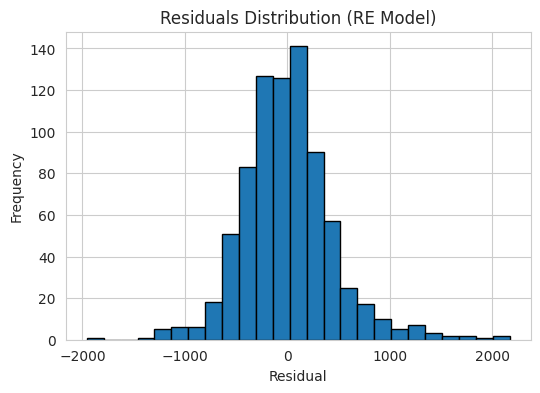

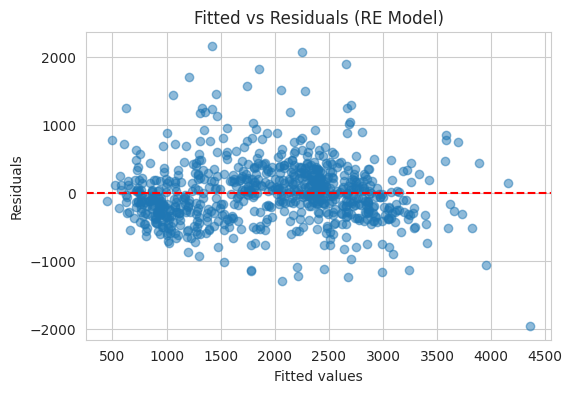

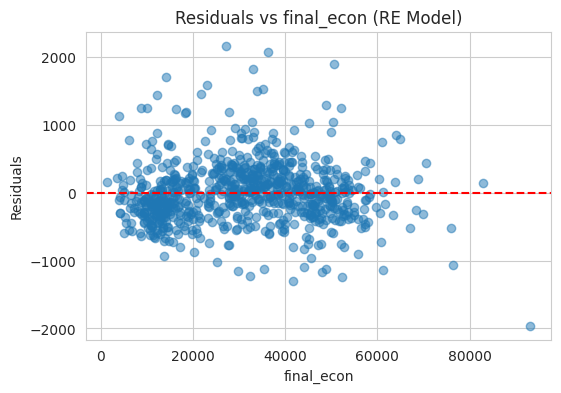

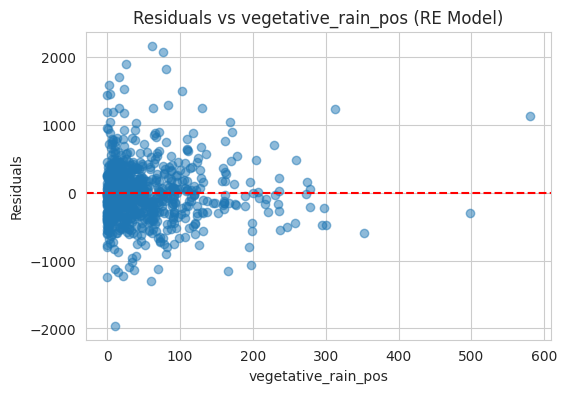

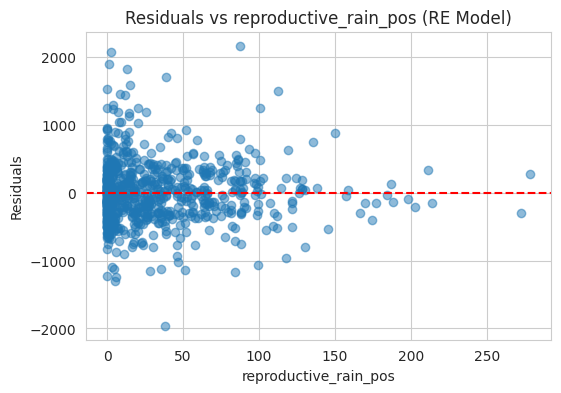

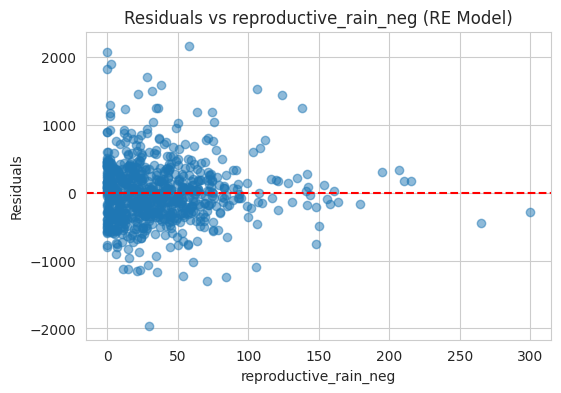

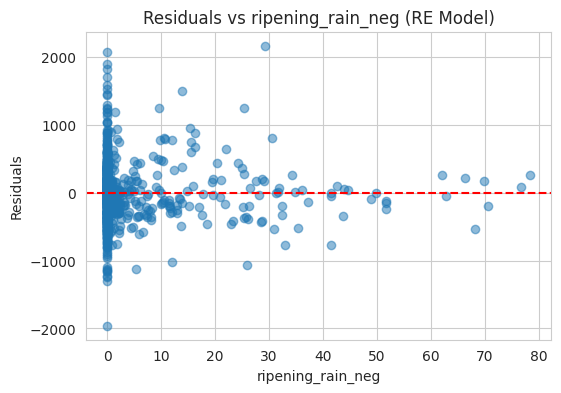

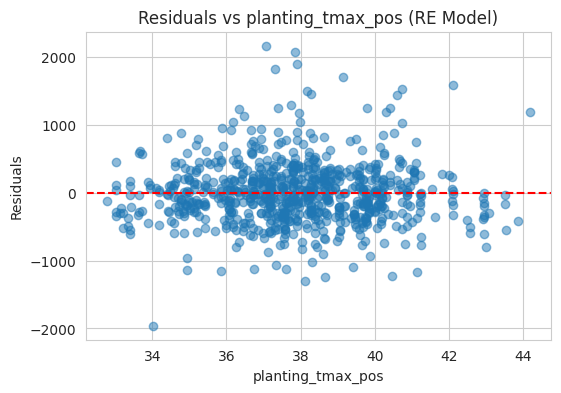

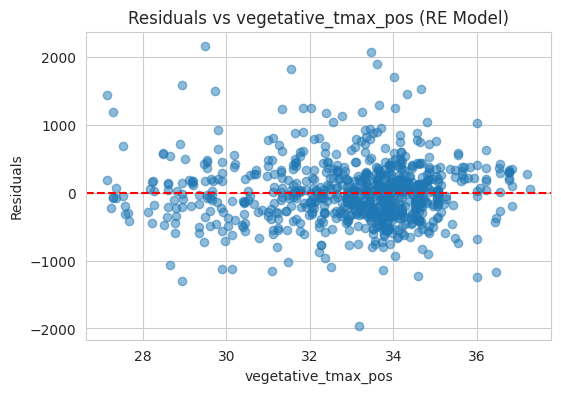

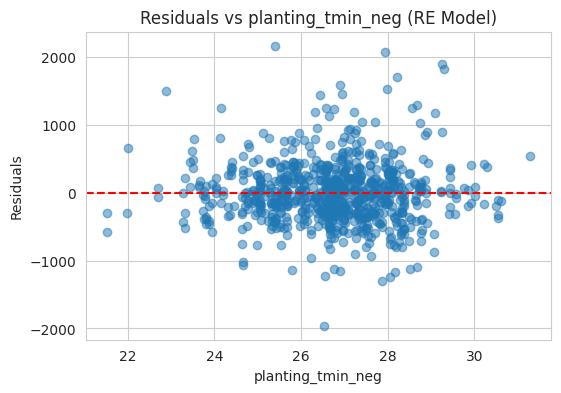

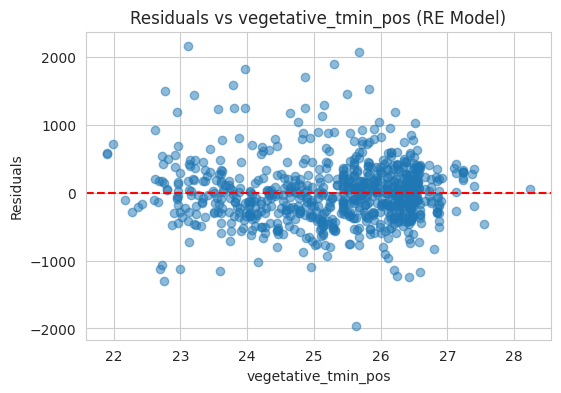

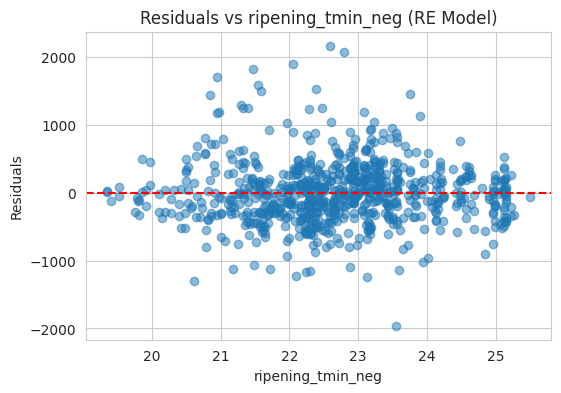

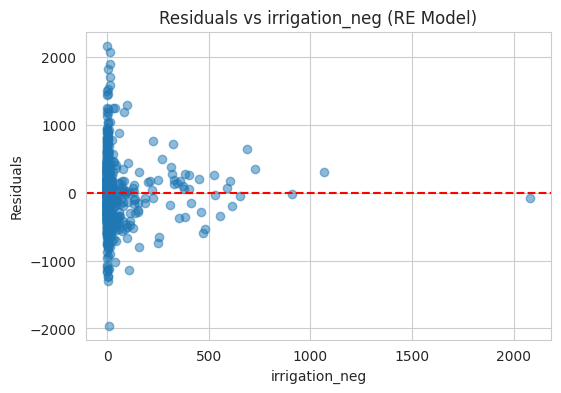

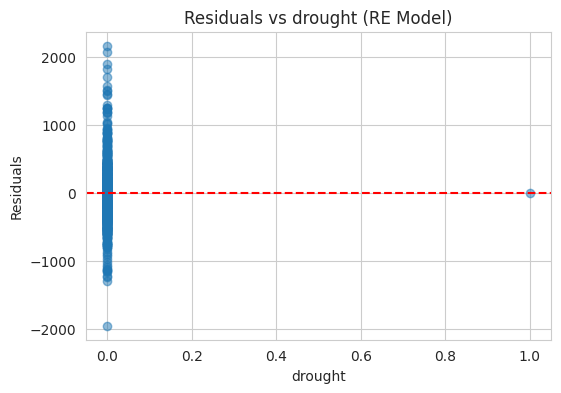

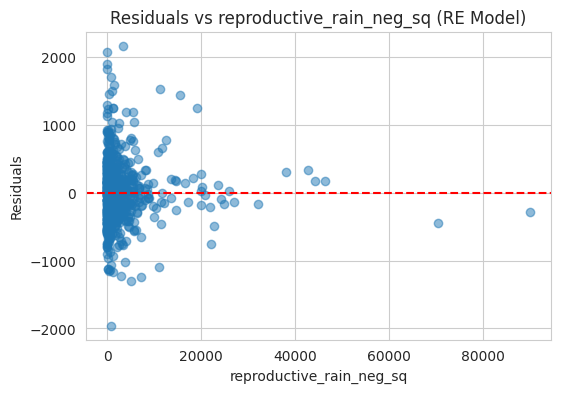


Shapiro-Wilk test: stat=0.9582, p=0.0000
Residuals deviate from normality

RMSE per district (sample period):
District 10: RMSE = 276.239
District 103: RMSE = 275.258
District 104: RMSE = 368.659
District 109: RMSE = 435.446
District 111: RMSE = 314.791
District 115: RMSE = 606.564
District 12: RMSE = 537.601
District 120: RMSE = 395.466
District 126: RMSE = 541.331
District 13: RMSE = 431.538
District 132: RMSE = 485.248
District 133: RMSE = 501.098
District 135: RMSE = 247.336
District 140: RMSE = 321.780
District 143: RMSE = 154.515
District 15: RMSE = 442.605
District 153: RMSE = 364.007
District 154: RMSE = 899.642
District 155: RMSE = 577.710
District 166: RMSE = 407.197
District 171: RMSE = 478.292
District 2: RMSE = 294.109
District 20: RMSE = 257.555
District 28: RMSE = 915.399
District 3: RMSE = 240.876
District 30: RMSE = 747.521
District 33: RMSE = 247.885
District 37: RMSE = 407.813
District 39: RMSE = 442.577
District 40: RMSE = 452.037
District 41: RMSE = 391.383
Distri

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== Step M: Regenerate features in val & forecast (auto) ===

=== Validation (2023) prediction (RE) ===


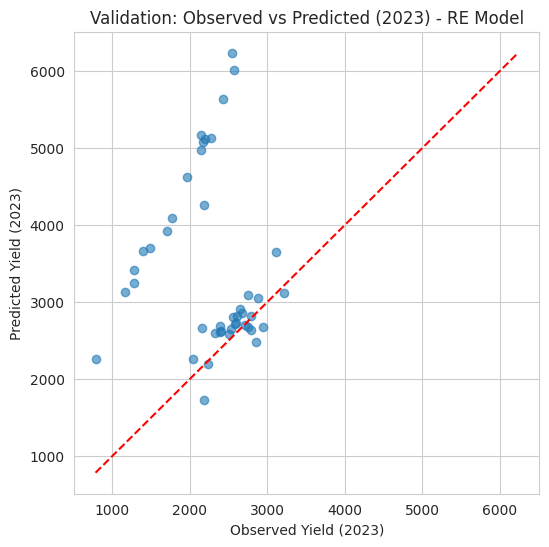

Validation RMSE (2023) - RE Model: 1693.930
Saved validation predictions (RE model) to validation_predictions_RE.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== Forecast (2024-2025) prediction (RE) ===
Forecast predictions (RE model):
                  yield_predicted
district_id year                 
10          2024      3062.083356
            2025      3110.603699
103         2024      2488.481138
            2025      2768.728156
104         2024      3193.147319
            2025      3357.205676
107         2024      1945.669529
            2025      2446.630692
109         2024      2543.907222
            2025      2762.427660
111         2024      2940.713488
            2025      3088.103247
115         2024      4456.899853
            2025      4480.743138
12          2024      3719.144265
            2025      3822.342886
120         2024      1128.522636
            2025      1677.723072
121         2024      2389.530163
            2025      2541.219435
126         2024      3211.058479
            2025      3560.289285
13          2024      3442.658578
            2025      3485.565938
132         2024      3656.498575
   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== Random Effects Model Summary ===
Model Type: Random Effects (RE)
Final variables selected: 13
Variables: ['final_econ', 'vegetative_rain_pos', 'reproductive_rain_pos', 'reproductive_rain_neg', 'ripening_rain_neg', 'planting_tmax_pos', 'vegetative_tmax_pos', 'planting_tmin_neg', 'vegetative_tmin_pos', 'ripening_tmin_neg', 'irrigation_neg', 'drought', 'reproductive_rain_neg_sq']
Training RMSE: 452.123
Validation RMSE (2023): 1693.930

RE Model advantages:
- Allows for correlation between individual effects and regressors
- More efficient when individual effects are uncorrelated with regressors
- Better prediction for new units not in training data
- Incorporates both between and within variation

RE Pipeline finished. Final variables used: ['final_econ', 'vegetative_rain_pos', 'reproductive_rain_pos', 'reproductive_rain_neg', 'ripening_rain_neg', 'planting_tmax_pos', 'vegetative_tmax_pos', 'planting_tmin_neg', 'vegetative_tmin_pos', 'ripening_tmin_neg', 'irrigation_neg', 'drought', 

In [6]:
# =================== FULL RE PIPELINE (robust, feature_map integrated) ===================
# NOTE: Run in a single Colab cell. Converts FEIS to Random Effects (RE) model.

!pip install linearmodels --quiet

# ------------------- Imports -------------------
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import RandomEffects
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# ------------------- User Config -------------------
ZONE_CLUSTER = 8       # change as needed
P_SIGN = 0.10
VIF_THRESH = 10.0
TRAIN_YEARS = list(range(2005,2023))
VAL_YEAR = 2023
FORECAST_YEARS = [2024, 2025]

# ------------------- Upload Data -------------------
from google.colab import files
print("Upload your CSV file (must include yield_val).")
uploaded = files.upload()
fn = list(uploaded.keys())[0]
df = pd.read_csv(fn)

# ------------------- Standardize Columns -------------------
required_cols = ['district_id','year','zone_cluster','yield_val']
for c in required_cols:
    if c not in df.columns:
        raise ValueError(f"Missing required column: {c}")

df = df[(df['year'] >= 2005) & (df['year'] <= 2025)].copy()
df['district_id'] = df['district_id'].astype(str)
df['year'] = df['year'].astype(int)
df['zone_cluster'] = df['zone_cluster'].astype(int)

# ------------------- Candidate variable groups (auto-detect) -------------------
econ_candidates_all = [f for f in df.columns if 'econ' in f.lower()]
irrigation_vars_all = [c for c in ['gw_reciprocal','reservoir_intensity','canal_intensity',
                                   'well_intensity','tank_intensity','oth_intensity'] if c in df.columns]
stress_vars_all = [c for c in ['heat_stress','drought'] if c in df.columns]
rain_weeks_all = [f'rf_week{i}' for i in range(20,43) if f'rf_week{i}' in df.columns]
tmax_weeks_all = [f'tmax_week{i}' for i in range(20,43) if f'tmax_week{i}' in df.columns]
tmin_weeks_all = [f'tmin_week{i}' for i in range(20,43) if f'tmin_week{i}' in df.columns]

all_candidates = list(set(econ_candidates_all + irrigation_vars_all +
                          stress_vars_all + rain_weeks_all +
                          tmax_weeks_all + tmin_weeks_all))

# ------------------- Impute Missing Values (within-district ffill/bfill then median) -------------------
if all_candidates:
    df[all_candidates] = df.groupby('district_id')[all_candidates].transform(lambda g: g.ffill().bfill())
    for col in all_candidates:
        if df[col].isna().any():
            df[col].fillna(df[col].median(), inplace=True)

# Keep districts with at least 2 years
district_counts = df.groupby('district_id')['year'].nunique()
df = df[df['district_id'].isin(district_counts[district_counts >= 2].index)]

print("\nData prepared:", df.shape, "years", df['year'].min(), "to", df['year'].max())
print("Zone clusters available:", sorted(df['zone_cluster'].unique()))

# ------------------- Cluster Subset -------------------
cluster = df[df['zone_cluster'] == ZONE_CLUSTER].copy()
if cluster.empty:
    raise ValueError(f"No data for zone_cluster={ZONE_CLUSTER}")

train = cluster[cluster['year'].isin(TRAIN_YEARS)].copy()
val = cluster[cluster['year'] == VAL_YEAR].copy()
forecast_df = cluster[cluster['year'].isin(FORECAST_YEARS)].copy()

if train.empty:
    raise ValueError(f"No training data for zone_cluster={ZONE_CLUSTER}")

print(f"\nWorking on zone_cluster {ZONE_CLUSTER}: train={len(train)}, val={len(val)}, forecast={len(forecast_df)}")

# ------------------- Helper Functions -------------------
def re_fit(y, X, data):
    """Panel Random Effects fit. X is list of column names in data."""
    try:
        panel = data.set_index(['district_id','year'])
        exog = sm.add_constant(panel[X], has_constant='add')
        mod = RandomEffects(panel[y], exog)
        res = mod.fit(cov_type="robust")
        return res
    except Exception as e:
        print(f"RE fit error: {e}")
        return None

def safe_fit(formula, df):
    try:
        model = sm.OLS.from_formula(formula, df).fit()
        return model
    except Exception:
        return None

# ------------------- Structures to record feature_map & groups -------------------
feature_map = {}
rain_groups = {}
temp_groups = {}
irrig_pos_list, irrig_neg_list = [], []
interaction_kept = []
quad_kept = []

# ------------------- STEP A: Economic Variables -------------------
print("\n=== STEP A: Economic Variable Selection (RE) ===")
econ_candidates = econ_candidates_all.copy()
selected_econ = []

for var in econ_candidates:
    if var not in train.columns:
        continue
    res = re_fit('yield_val', [var], train)
    if res is None:
        continue
    coef = res.params.get(var, np.nan)
    p = res.pvalues.get(var, np.nan)
    print(f" Econ {var}: coef={coef:.6f}, p={p:.4f}")
    if (not np.isnan(p)) and (p < P_SIGN) and (coef > 0):
        if not selected_econ:
            selected_econ = [var]
            print(f" -> selected first econ {var}")
        else:
            avg_name = "econ_avg_temp"
            train[avg_name] = train[selected_econ + [var]].mean(axis=1)
            res_avg = re_fit('yield_val', [avg_name], train)
            if res_avg:
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                coef_avg = res_avg.params.get(avg_name, np.nan)
                cur_avg = "econ_avg_current"
                train[cur_avg] = train[selected_econ].mean(axis=1)
                res_current = re_fit('yield_val', [cur_avg], train)
                p_current = res_current.pvalues.get(cur_avg, np.nan) if res_current else np.nan
                train.drop(columns=[cur_avg], inplace=True, errors='ignore')
                print(f" Averaged {selected_econ + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, vs current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and (p_avg < p_current):
                    selected_econ.append(var)
                    print(f" -> kept {var} in econ group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

if selected_econ:
    train['final_econ'] = train[selected_econ].mean(axis=1)
    if not val.empty:
        val['final_econ'] = val[selected_econ].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['final_econ'] = forecast_df[selected_econ].mean(axis=1)
    base_features = ['final_econ']
    feature_map['final_econ'] = list(selected_econ)
else:
    base_features = []
print("Selected economic vars:", selected_econ)

# ------------------- STEP B: GW & Reservoir -------------------
print("\n=== STEP B: GW reciprocal & Reservoir (RE) ===")
gw_candidates = ['gw_reciprocal','reservoir_intensity']
for v in gw_candidates:
    if v in train.columns:
        features_to_test = base_features + [v]
        res = re_fit('yield_val', features_to_test, train)
        if res is None:
            continue
        coef = res.params.get(v, np.nan)
        p = res.pvalues.get(v, np.nan)
        print(f" {v}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            base_features.append(v)
            feature_map[v] = ('raw', v)
            print(f" -> kept {v}")

print("Base features after Step B:", base_features)

# ------------------- STEP C: Rainfall Weekly -------------------
print("\n=== STEP C: Rainfall Weekly Selection (RE) ===")
stage_weeks = {
    'planting': list(range(20,29)),
    'vegetative': list(range(29,34)),
    'reproductive': list(range(34,39)),
    'ripening': list(range(39,43))
}

for stage, weeks in stage_weeks.items():
    weekly_cols = [f"rf_week{i}" for i in weeks if f"rf_week{i}" in train.columns]
    if not weekly_cols:
        print(f" No weekly rain cols for {stage}, skipping")
        continue

    print(f"\nTesting {stage} weekly cols: {weekly_cols}")
    pos_candidates, neg_candidates = [], []

    for col in weekly_cols:
        res = re_fit('yield_val', base_features + [col], train)
        if res is None:
            continue
        coef = res.params.get(col, np.nan)
        p = res.pvalues.get(col, np.nan)
        print(f" {col}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            if coef > 0:
                pos_candidates.append(col)
                print(f"  -> {col} added to positive candidates")
            else:
                neg_candidates.append(col)
                print(f"  -> {col} added to negative candidates")

    # positive sequential averaging
    selected_pos = []
    for var in pos_candidates:
        if not selected_pos:
            selected_pos = [var]
            print(f" -> Selected first positive var for {stage}: {var}")
        else:
            avg_name = f'{stage}_pos_avg_temp'
            train[avg_name] = train[selected_pos + [var]].mean(axis=1)
            res_avg = re_fit('yield_val', base_features + [avg_name], train)
            if res_avg:
                coef_avg = res_avg.params.get(avg_name, np.nan)
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                if len(selected_pos) == 1:
                    res_current = re_fit('yield_val', base_features + [selected_pos[0]], train)
                    p_current = res_current.pvalues.get(selected_pos[0], np.nan) if res_current else np.nan
                else:
                    cur_avg_name = f'{stage}_current_pos_avg'
                    train[cur_avg_name] = train[selected_pos].mean(axis=1)
                    res_current = re_fit('yield_val', base_features + [cur_avg_name], train)
                    p_current = res_current.pvalues.get(cur_avg_name, np.nan) if res_current else np.nan
                    train.drop(columns=[cur_avg_name], inplace=True, errors='ignore')
                print(f" {stage} pos averaged {selected_pos + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and (p_avg < p_current):
                    selected_pos.append(var)
                    print(f" -> kept {var} in positive group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

    # negative sequential averaging
    selected_neg = []
    for var in neg_candidates:
        if not selected_neg:
            selected_neg = [var]
            print(f" -> Selected first negative var for {stage}: {var}")
        else:
            avg_name = f'{stage}_neg_avg_temp'
            train[avg_name] = train[selected_neg + [var]].mean(axis=1)
            res_avg = re_fit('yield_val', base_features + [avg_name], train)
            if res_avg:
                coef_avg = res_avg.params.get(avg_name, np.nan)
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                if len(selected_neg) == 1:
                    res_current = re_fit('yield_val', base_features + [selected_neg[0]], train)
                    p_current = res_current.pvalues.get(selected_neg[0], np.nan) if res_current else np.nan
                else:
                    cur_avg_name = f'{stage}_current_neg_avg'
                    train[cur_avg_name] = train[selected_neg].mean(axis=1)
                    res_current = re_fit('yield_val', base_features + [cur_avg_name], train)
                    p_current = res_current.pvalues.get(cur_avg_name, np.nan) if res_current else np.nan
                    train.drop(columns=[cur_avg_name], inplace=True, errors='ignore')
                print(f" {stage} neg averaged {selected_neg + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg < 0) and (p_avg < p_current):
                    selected_neg.append(var)
                    print(f" -> kept {var} in negative group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

    # Create aggregated variables and record into feature_map
    rain_groups[stage] = {'pos': selected_pos.copy(), 'neg': selected_neg.copy()}

    if selected_pos:
        cname = f"{stage}_rain_pos"
        train[cname] = train[selected_pos].mean(axis=1)
        if not val.empty:
            val[cname] = val[selected_pos].mean(axis=1)
        if not forecast_df.empty:
            forecast_df[cname] = forecast_df[selected_pos].mean(axis=1)
        base_features.append(cname)
        feature_map[cname] = list(selected_pos)

    if selected_neg:
        cname = f"{stage}_rain_neg"
        train[cname] = train[selected_neg].mean(axis=1)
        if not val.empty:
            val[cname] = val[selected_neg].mean(axis=1)
        if not forecast_df.empty:
            forecast_df[cname] = forecast_df[selected_neg].mean(axis=1)
        base_features.append(cname)
        feature_map[cname] = list(selected_neg)

print("Base features after Step C:", base_features)

# ------------------- STEP D: Temperature Weekly -------------------
print("\n=== STEP D: Temperature Weekly (RE) ===")
for temp in ['tmax','tmin']:
    week_cols = [f"{temp}_week{i}" for i in range(20,43) if f"{temp}_week{i}" in train.columns]
    if not week_cols:
        print(f" No weekly {temp} data found, skipping {temp}")
        continue

    for stage, weeks in stage_weeks.items():
        cols = [f"{temp}_week{i}" for i in weeks if f"{temp}_week{i}" in train.columns]
        if not cols:
            continue

        print(f"\nTesting {temp} for stage {stage}: {cols}")
        pos_candidates, neg_candidates = [], []

        for col in cols:
            res = re_fit('yield_val', base_features + [col], train)
            if res is None:
                continue
            coef = res.params.get(col, np.nan)
            p = res.pvalues.get(col, np.nan)
            print(f" {col}: coef={coef:.6f}, p={p:.4f}")
            if (not np.isnan(p)) and (p < P_SIGN):
                if coef > 0:
                    pos_candidates.append(col)
                    print(f"  -> {col} added to positive candidates")
                else:
                    neg_candidates.append(col)
                    print(f"  -> {col} added to negative candidates")

        # positive sequential averaging
        selected_pos = []
        for var in pos_candidates:
            if not selected_pos:
                selected_pos = [var]
                print(f" -> Selected first positive {temp} var for {stage}: {var}")
            else:
                avg_name = f'{stage}_{temp}_pos_avg_temp'
                train[avg_name] = train[selected_pos + [var]].mean(axis=1)
                features_avg = [f for f in base_features if f not in selected_pos] + [avg_name]
                res_avg = re_fit('yield_val', features_avg, train)
                if res_avg:
                    coef_avg = res_avg.params.get(avg_name, np.nan)
                    p_avg = res_avg.pvalues.get(avg_name, np.nan)
                    prev_ok = True
                    for prev_var in selected_pos:
                        features_prev = [f for f in base_features if f != prev_var] + [prev_var, avg_name]
                        res_prev = re_fit('yield_val', features_prev, train)
                        p_prev = res_prev.pvalues.get(prev_var, np.nan) if res_prev else np.nan
                        if np.isnan(p_prev) or p_prev >= P_SIGN:
                            prev_ok = False
                            break
                    print(f" {stage} {temp} pos averaged {selected_pos + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, prev_ok={prev_ok}")
                    if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and prev_ok:
                        selected_pos.append(var)
                        print(f" -> kept {var} in positive group")
                train.drop(columns=[avg_name], inplace=True, errors='ignore')

        # negative sequential averaging
        selected_neg = []
        for var in neg_candidates:
            if not selected_neg:
                selected_neg = [var]
                print(f" -> Selected first negative {temp} var for {stage}: {var}")
            else:
                avg_name = f'{stage}_{temp}_neg_avg_temp'
                train[avg_name] = train[selected_neg + [var]].mean(axis=1)
                features_avg = [f for f in base_features if f not in selected_neg] + [avg_name]
                res_avg = re_fit('yield_val', features_avg, train)
                if res_avg:
                    coef_avg = res_avg.params.get(avg_name, np.nan)
                    p_avg = res_avg.pvalues.get(avg_name, np.nan)
                    prev_ok = True
                    for prev_var in selected_neg:
                        features_prev = [f for f in base_features if f != prev_var] + [prev_var, avg_name]
                        res_prev = re_fit('yield_val', features_prev, train)
                        p_prev = res_prev.pvalues.get(prev_var, np.nan) if res_prev else np.nan
                        if np.isnan(p_prev) or p_prev >= P_SIGN:
                            prev_ok = False
                            break
                    print(f" {stage} {temp} neg averaged {selected_neg + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, prev_ok={prev_ok}")
                    if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg < 0) and prev_ok:
                        selected_neg.append(var)
                        print(f" -> kept {var} in negative group")
                train.drop(columns=[avg_name], inplace=True, errors='ignore')

        # Aggregate and record
        key = (stage, temp)
        temp_groups[key] = {'pos': selected_pos.copy(), 'neg': selected_neg.copy()}

        if selected_pos:
            cname = f"{stage}_{temp}_pos"
            train[cname] = train[selected_pos].mean(axis=1)
            if not val.empty:
                val[cname] = val[selected_pos].mean(axis=1)
            if not forecast_df.empty:
                forecast_df[cname] = forecast_df[selected_pos].mean(axis=1)
            base_features.append(cname)
            feature_map[cname] = list(selected_pos)

        if selected_neg:
            cname = f"{stage}_{temp}_neg"
            train[cname] = train[selected_neg].mean(axis=1)
            if not val.empty:
                val[cname] = val[selected_neg].mean(axis=1)
            if not forecast_df.empty:
                forecast_df[cname] = forecast_df[selected_neg].mean(axis=1)
            base_features.append(cname)
            feature_map[cname] = list(selected_neg)

print("Base features after Step D (Temp):", base_features)

# ------------------- STEP E: Irrigation -------------------
print("\n=== STEP E: Irrigation (RE) ===")
irrig_pos_list, irrig_neg_list = [], []
irr_vars = [v for v in ['canal_intensity','well_intensity','tank_intensity','oth_intensity'] if v in train.columns]

for v in irr_vars:
    features_to_test = [f for f in base_features if f not in irrig_pos_list + irrig_neg_list] + [v]
    res = re_fit('yield_val', features_to_test, train)
    if res is None:
        continue
    coef = res.params.get(v, np.nan)
    p = res.pvalues.get(v, np.nan)
    print(f" {v}: coef={coef:.6f}, p={p:.4f}")
    if (not np.isnan(p)) and (p < P_SIGN):
        if coef > 0:
            irrig_pos_list.append(v)
            print(f" -> added to irrigation_pos: {v}")
        else:
            irrig_neg_list.append(v)
            print(f" -> added to irrigation_neg: {v}")

if irrig_pos_list:
    train['irrigation_pos'] = train[irrig_pos_list].mean(axis=1)
    if not val.empty:
        val['irrigation_pos'] = val[irrig_pos_list].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['irrigation_pos'] = forecast_df[irrig_pos_list].mean(axis=1)
    base_features.append('irrigation_pos')
    feature_map['irrigation_pos'] = list(irrig_pos_list)

if irrig_neg_list:
    train['irrigation_neg'] = train[irrig_neg_list].mean(axis=1)
    if not val.empty:
        val['irrigation_neg'] = val[irrig_neg_list].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['irrigation_neg'] = forecast_df[irrig_neg_list].mean(axis=1)
    base_features.append('irrigation_neg')
    feature_map['irrigation_neg'] = list(irrig_neg_list)

print("Irrigation pos:", irrig_pos_list, "neg:", irrig_neg_list)
print("Base features after irrigation:", base_features)

# ------------------- STEP F: Stress Variables -------------------
print("\n=== STEP F: Stress Variables (RE) ===")
for s in ['heat_stress','drought']:
    if s in train.columns:
        res = re_fit('yield_val', base_features + [s], train)
        if res is None:
            continue
        coef = res.params.get(s, np.nan)
        p = res.pvalues.get(s, np.nan)
        print(f" {s}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            base_features.append(s)
            feature_map[s] = ('raw', s)
            print(f" -> kept {s}")

print("Base features after stress vars:", base_features)

# ------------------- STEP J: Interactions -------------------
print("\n=== STEP J: Interaction testing (RE) ===")
current_vars = base_features.copy()

rain_cols = [c for c in current_vars if '_rain_' in c]
irr_cols = [c for c in current_vars if c.startswith('irrigation_')]
reservoir_col = 'reservoir_intensity' if 'reservoir_intensity' in train.columns else None

interaction_candidates = []
for r in rain_cols:
    for i in irr_cols:
        interaction_candidates.append((r, i))
if reservoir_col:
    for r in rain_cols:
        interaction_candidates.append((r, reservoir_col))
    for i in irr_cols:
        interaction_candidates.append((i, reservoir_col))

for var1, var2 in interaction_candidates:
    # guard: both vars must exist in train (sometimes groups missing)
    if var1 not in train.columns or var2 not in train.columns:
        continue
    name = f"{var1}_x_{var2}"
    train[name] = train[var1] * train[var2]
    if not val.empty:
        val[name] = val[var1] * val[var2]
    if not forecast_df.empty:
        forecast_df[name] = forecast_df[var1] * forecast_df[var2]

    res = safe_fit("yield_val ~ " + " + ".join(current_vars + [name]), train)
    p_val = res.pvalues.get(name, np.nan) if res is not None else np.nan
    print(f" Interaction {name}: p={p_val:.4f}")
    if (not np.isnan(p_val)) and (p_val < P_SIGN):
        current_vars.append(name)
        interaction_kept.append(name)
        feature_map[name] = ('interaction', var1, var2)
        print(f" -> kept interaction {name}")
    else:
        train.drop(columns=[name], inplace=True, errors='ignore')
        val.drop(columns=[name], inplace=True, errors='ignore')
        forecast_df.drop(columns=[name], inplace=True, errors='ignore')

print("Interactions kept:", interaction_kept)

# ------------------- STEP K: Quadratic Rain -------------------
print("\n=== STEP K: Quadratic rain terms (RE) ===")
quad_kept = []
# use current_vars because interactions may have extended it
rain_cols = [c for c in current_vars if '_rain_' in c]
for rcol in rain_cols:
    if rcol not in train.columns:
        continue
    qname = f"{rcol}_sq"
    train[qname] = train[rcol] ** 2
    if not val.empty:
        val[qname] = val[rcol] ** 2
    if not forecast_df.empty:
        forecast_df[qname] = forecast_df[rcol] ** 2

    res = safe_fit("yield_val ~ " + " + ".join(current_vars + [qname]), train)
    p_val = res.pvalues.get(qname, np.nan) if res is not None else np.nan
    print(f" Quadratic {qname}: p={p_val:.4f}")
    if (not np.isnan(p_val)) and (p_val < P_SIGN):
        current_vars.append(qname)
        quad_kept.append(qname)
        feature_map[qname] = ('sq', rcol)
        print(f" -> kept quadratic {qname}")
    else:
        train.drop(columns=[qname], inplace=True, errors='ignore')
        val.drop(columns=[qname], inplace=True, errors='ignore')
        forecast_df.drop(columns=[qname], inplace=True, errors='ignore')

print("Quadratic kept:", quad_kept)

# ------------------- STEP L: VIF & p-value pruning -------------------
print("\n=== STEP L: VIF & p-value pruning (RE) ===")
final_vars = current_vars.copy()
train_panel = train.set_index(['district_id','year']).sort_index()

def calculate_vif(df, vars_list):
    try:
        X = sm.add_constant(df[vars_list], has_constant='add')
        vif_data = pd.DataFrame()
        vif_data['variable'] = vars_list
        vifs = []
        for i in range(len(vars_list)):
            try:
                vifs.append(variance_inflation_factor(X.values, i+1))
            except Exception:
                vifs.append(np.nan)
        vif_data['VIF'] = vifs
        return vif_data
    except Exception as e:
        return pd.DataFrame({'variable': vars_list, 'VIF': [np.nan]*len(vars_list)})

iteration = 0
while True:
    iteration += 1
    print(f"\nIteration {iteration}: computing VIF")
    vif_df = calculate_vif(train_panel, final_vars)
    print(vif_df)
    # handle all-NaN VIF_df
    if vif_df['VIF'].dropna().empty:
        print("VIFs not available / all NaN; stop VIF pruning.")
        break
    max_vif = vif_df['VIF'].max()
    if max_vif > VIF_THRESH:
        drop_var = vif_df.loc[vif_df['VIF'] == max_vif, 'variable'].values[0]
        print(f" -> dropping {drop_var} due to high VIF {max_vif:.2f}")
        if drop_var in final_vars:
            final_vars.remove(drop_var)
        train_panel.drop(columns=[drop_var], inplace=True, errors='ignore')
        feature_map.pop(drop_var, None)
        continue

    # Fit RandomEffects and check p-values
    X_tmp = sm.add_constant(train_panel[final_vars], has_constant='add')
    y_tmp = train_panel['yield_val']
    try:
        model = RandomEffects(y_tmp, X_tmp).fit(cov_type='robust')
    except Exception as e:
        print(" RandomEffects error during pruning:", e)
        break

    pvals = model.pvalues.drop('const', errors='ignore')
    if (pvals >= P_SIGN).any():
        drop_var = pvals.idxmax()
        print(f" -> dropping {drop_var} due to high p-value {pvals[drop_var]:.4f}")
        if drop_var in final_vars:
            final_vars.remove(drop_var)
        train_panel.drop(columns=[drop_var], inplace=True, errors='ignore')
        feature_map.pop(drop_var, None)
        continue
    else:
        print("All VIFs and p-values OK")
        break

print("\nFinal selected variables (auto-detected):", final_vars)

# ------------------- Final RE Model -------------------
print("\n=== Fitting final RE model ===")
train_panel = train.set_index(['district_id','year']).sort_index()
# ensure final_vars exist in train_panel (if not, remove missing)
final_vars = [v for v in final_vars if v in train_panel.columns]
X_final = sm.add_constant(train_panel[final_vars], has_constant='add')
y_final = train_panel['yield_val']
res_final = RandomEffects(y_final, X_final).fit(cov_type='robust')
print(res_final.summary)

# ------------------- SAFE Residual Diagnostics & RMSE -------------------
# Build X_full and y_full then determine used rows (no-NaN)
X_full = sm.add_constant(train_panel[final_vars], has_constant='add')
y_full = train_panel['yield_val']
used_mask = X_full.notnull().all(axis=1) & y_full.notnull()
used_index = X_full.index[used_mask]

if len(used_index) == 0:
    raise ValueError("No usable rows for diagnostics after filtering missing values.")

# Fitted using params (only for used_index)
fitted_used = pd.Series(X_full.loc[used_index].dot(res_final.params), index=used_index, name='fitted')

# Create fitted aligned to full train_panel index (NaNs where not available)
fitted = fitted_used.reindex(train_panel.index)

# Residuals (NaN where fitted missing)
residuals = y_full - fitted

print("\nResidual summary statistics (used rows only):")
print(residuals.dropna().describe())

# Plots (drop NaNs where appropriate)
plt.figure(figsize=(6,4))
plt.hist(residuals.dropna(), bins=25, edgecolor='k')
plt.title("Residuals Distribution (RE Model)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(fitted.dropna(), residuals.dropna(), alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Fitted vs Residuals (RE Model)")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

for var in final_vars:
    if var in X_final.columns:
        plt.figure(figsize=(6,4))
        # align predictor to same index subset
        plt.scatter(X_final[var].loc[fitted.dropna().index], residuals.dropna(), alpha=0.5)
        plt.axhline(0, color='red', linestyle='--')
        plt.title(f"Residuals vs {var} (RE Model)")
        plt.xlabel(var)
        plt.ylabel("Residuals")
        plt.show()

# Shapiro-Wilk
resid_nonan = residuals.dropna()
if len(resid_nonan) >= 3:
    stat, p_sw = shapiro(resid_nonan)
    print(f"\nShapiro-Wilk test: stat={stat:.4f}, p={p_sw:.4f}")
    print("Residuals roughly normal" if p_sw > 0.05 else "Residuals deviate from normality")
else:
    print("\nNot enough residuals for Shapiro-Wilk test (need >=3).")

# RMSE per district (safe drop NaNs)
rmse_dict = {}
for d in train_panel.index.get_level_values('district_id').unique():
    y_true = y_full.xs(d, level='district_id')
    y_pred = fitted.xs(d, level='district_id')
    df_tmp = pd.concat([y_true, y_pred], axis=1, keys=['y_true','y_pred']).dropna()
    if not df_tmp.empty:
        rmse_dict[d] = np.sqrt(mean_squared_error(df_tmp['y_true'], df_tmp['y_pred']))

print("\nRMSE per district (sample period):")
for d, r in rmse_dict.items():
    print(f"District {d}: RMSE = {r:.3f}")

# Overall RMSE (drop NaNs)
df_all = pd.concat([y_full, fitted], axis=1, keys=['y_true', 'y_pred']).dropna()
overall_rmse = np.sqrt(mean_squared_error(df_all['y_true'], df_all['y_pred']))
print(f"\nOverall RMSE (sample period, used rows): {overall_rmse:.3f}")

# ------------------- Save sample-period actual vs predicted CSV -------------------
df_out = pd.DataFrame({
    'district_id': train_panel.reset_index()['district_id'],
    'year': train_panel.reset_index()['year'],
    'district': train_panel.reset_index()['district'] if 'district' in train_panel.reset_index().columns else None,
    'state': train_panel.reset_index()['state'] if 'state' in train_panel.reset_index().columns else None,
    'yield_actual': y_final.values,
    'yield_predicted': fitted.values
})

out_file = "sample_predictions_RE.csv"
df_out.to_csv(out_file, index=False)
print(f"Saved sample-period predictions (RE model) to {out_file}")
try:
    files.download(out_file)
except Exception:
    pass

# ------------------- Feature Regeneration Utility -------------------
def regenerate_features(df_in, feature_map, fill_value=0.0, max_iters=20):
    """Rebuild derived features for df_in using the feature_map.
       Safe: missing raw columns are filled with fill_value (scalar)."""
    df = df_in.copy()
    # prefill missing raw columns referenced in feature_map with fill_value
    for rule in feature_map.values():
        if isinstance(rule, list):
            for c in rule:
                if c not in df.columns:
                    df[c] = fill_value
        elif isinstance(rule, tuple) and rule[0] == 'raw':
            col = rule[1]
            if col not in df.columns:
                df[col] = fill_value

    it = 0
    while it < max_iters:
        it += 1
        changed = False
        for feat, rule in feature_map.items():
            if feat in df.columns:
                continue
            try:
                if isinstance(rule, list):
                    if all([c in df.columns for c in rule]):
                        df[feat] = df[rule].mean(axis=1)
                        changed = True
                elif isinstance(rule, tuple):
                    if rule[0] == 'sq' and rule[1] in df.columns:
                        df[feat] = df[rule[1]] ** 2
                        changed = True
                    elif rule[0] == 'interaction':
                        v1, v2 = rule[1], rule[2]
                        if v1 in df.columns and v2 in df.columns:
                            df[feat] = df[v1] * df[v2]
                            changed = True
                    elif rule[0] == 'raw' and rule[1] in df.columns:
                        df[feat] = df[rule[1]]
                        changed = True
                else:
                    # if rule is string (alias)
                    if isinstance(rule, str) and rule in df.columns:
                        df[feat] = df[rule]
                        changed = True
            except Exception:
                pass
        if not changed:
            break
    return df

# -------------------- Step M: Regenerate features in val & forecast --------------------
print("\n=== Step M: Regenerate features in val & forecast (auto) ===")
if not val.empty:
    val = regenerate_features(val, feature_map)
if not forecast_df.empty:
    forecast_df = regenerate_features(forecast_df, feature_map)

# Ensure all final_vars present in val & forecast (fill with median from train or 0)
for col in final_vars:
    if not val.empty and col not in val.columns:
        val[col] = train[col].median() if col in train.columns else 0.0
    if not forecast_df.empty and col not in forecast_df.columns:
        forecast_df[col] = train[col].median() if col in train.columns else 0.0

# ------------------- Validation (2023) prediction -------------------
print("\n=== Validation (2023) prediction (RE) ===")
if not val.empty and VAL_YEAR in val['year'].unique():
    val_panel = val.set_index(['district_id','year']).sort_index()
    X_val = sm.add_constant(val_panel[final_vars], has_constant='add')
    # ensure all params columns exist in X_val
    for col in res_final.params.index:
        if col == 'const':
            continue
        if col not in X_val.columns:
            X_val[col] = 0.0
    X_val = X_val[res_final.params.index]  # reorder to match params
    y_val = val_panel['yield_val']
    y_pred_val = pd.Series(X_val.dot(res_final.params), index=X_val.index, name='yield_predicted')

    # align and drop NaNs for RMSE & plotting
    df_val_check = pd.concat([y_val, y_pred_val], axis=1).dropna()
    if df_val_check.empty:
        print("No valid validation rows after alignment (all NaN).")
    else:
        plt.figure(figsize=(6,6))
        plt.scatter(df_val_check.iloc[:,0], df_val_check.iloc[:,1], alpha=0.6)
        mn = min(df_val_check.iloc[:,0].min(), df_val_check.iloc[:,1].min())
        mx = max(df_val_check.iloc[:,0].max(), df_val_check.iloc[:,1].max())
        plt.plot([mn,mx],[mn,mx],'r--')
        plt.xlabel("Observed Yield (2023)")
        plt.ylabel("Predicted Yield (2023)")
        plt.title(f"Validation: Observed vs Predicted ({VAL_YEAR}) - RE Model")
        plt.show()

        val_rmse = np.sqrt(mean_squared_error(df_val_check.iloc[:,0], df_val_check.iloc[:,1]))
        print(f"Validation RMSE (2023) - RE Model: {val_rmse:.3f}")

# ------------------- Save validation (2023) actual vs predicted CSV -------------------
if not val.empty and VAL_YEAR in val['year'].unique():
    val_panel = val.set_index(['district_id','year']).sort_index()
    X_val = sm.add_constant(val_panel[final_vars], has_constant='add')
    y_val = val_panel['yield_val'] if 'yield_val' in val_panel.columns else None

    val_pred = pd.Series(X_val.dot(res_final.params), index=val_panel.index, name='yield_predicted')

    val_out = val_panel.reset_index()[['district_id','year']].copy()
    if 'district' in val.columns:
        val_out['district'] = val_out['district_id'].map(val.set_index('district_id')['district'])
    if 'state' in val.columns:
        val_out['state'] = val_out['district_id'].map(val.set_index('district_id')['state'])

    val_out['yield_predicted'] = val_pred.values
    if y_val is not None:
        val_out['yield_actual'] = y_val.values

    out_val = "validation_predictions_RE.csv"
    val_out.to_csv(out_val, index=False)
    print(f"Saved validation predictions (RE model) to {out_val}")
    try:
        files.download(out_val)
    except Exception:
        pass

# ------------------- Forecast (2024-2025) prediction -------------------
print("\n=== Forecast (2024-2025) prediction (RE) ===")
if not forecast_df.empty:
    forecast_panel = forecast_df.set_index(['district_id','year']).sort_index()
    X_fore = sm.add_constant(forecast_panel[final_vars], has_constant='add')
    for col in res_final.params.index:
        if col == 'const':
            continue
        if col not in X_fore.columns:
            X_fore[col] = 0.0
    X_fore = X_fore[res_final.params.index]
    y_fore_pred = pd.Series(X_fore.dot(res_final.params), index=X_fore.index, name='yield_predicted')

    # attach forecast predictions back to panel
    forecast_out = forecast_panel.copy()
    forecast_out['yield_predicted'] = np.nan
    forecast_out.loc[y_fore_pred.index, 'yield_predicted'] = y_fore_pred.values

    print("Forecast predictions (RE model):")
    print(forecast_out[['yield_predicted']].dropna().head(40))

# ------------------- Save forecast (2024–2025) CSV -------------------
if not forecast_df.empty:
    forecast_panel = forecast_df.set_index(['district_id','year']).sort_index()
    X_forecast = sm.add_constant(forecast_panel[final_vars], has_constant='add')
    forecast_pred = pd.Series(X_forecast.dot(res_final.params),
                              index=forecast_panel.index, name='yield_forecasted')

    forecast_out = pd.DataFrame({
        'district_id': forecast_panel.index.get_level_values('district_id'),
        'year': forecast_panel.index.get_level_values('year'),
        'yield_forecasted': forecast_pred.values
    })

    # merge back district + state safely (no uniqueness assumption)
    forecast_out = forecast_out.merge(
        df[['district_id','district','state']].drop_duplicates(),
        on='district_id', how='left'
    )

    out_forecast = "forecast_predictions_RE.csv"
    forecast_out.to_csv(out_forecast, index=False)
    print(f"Saved forecast predictions (RE model) to {out_forecast}")
    try:
        files.download(out_forecast)
    except Exception:
        pass

# ------------------- Model Comparison Summary -------------------
print("\n=== Random Effects Model Summary ===")
print(f"Model Type: Random Effects (RE)")
print(f"Final variables selected: {len(final_vars)}")
print(f"Variables: {final_vars}")
print(f"Training RMSE: {overall_rmse:.3f}")
if not val.empty and VAL_YEAR in val['year'].unique():
    print(f"Validation RMSE (2023): {val_rmse:.3f}")

print("\nRE Model advantages:")
print("- Allows for correlation between individual effects and regressors")
print("- More efficient when individual effects are uncorrelated with regressors")
print("- Better prediction for new units not in training data")
print("- Incorporates both between and within variation")

# ------------------- Done -------------------
print("\nRE Pipeline finished. Final variables used:", final_vars)
print("Feature map keys (sample):", list(feature_map.keys())[:40])

<font size ='6'> <font color ='violet'> **Zone_cluster =9**

In [18]:
# =================== FULL RE PIPELINE (robust, feature_map integrated) ===================
# NOTE: Run in a single Colab cell. Converts FEIS to Random Effects (RE) model.

!pip install linearmodels --quiet

# ------------------- Imports -------------------
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import RandomEffects
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# ------------------- User Config -------------------
ZONE_CLUSTER = 9       # change as needed
P_SIGN = 0.10
VIF_THRESH = 10.0
TRAIN_YEARS = list(range(2005,2023))
VAL_YEAR = 2023
FORECAST_YEARS = [2024, 2025]

# ------------------- Upload Data -------------------
from google.colab import files
print("Upload your CSV file (must include yield_val).")
uploaded = files.upload()
fn = list(uploaded.keys())[0]
df = pd.read_csv(fn)

# ------------------- Standardize Columns -------------------
required_cols = ['district_id','year','zone_cluster','yield_val']
for c in required_cols:
    if c not in df.columns:
        raise ValueError(f"Missing required column: {c}")

df = df[(df['year'] >= 2005) & (df['year'] <= 2025)].copy()
df['district_id'] = df['district_id'].astype(str)
df['year'] = df['year'].astype(int)
df['zone_cluster'] = df['zone_cluster'].astype(int)

# ------------------- Candidate variable groups (auto-detect) -------------------
econ_candidates_all = [f for f in df.columns if 'econ' in f.lower()]
irrigation_vars_all = [c for c in ['gw_reciprocal','reservoir_intensity','canal_intensity',
                                   'well_intensity','tank_intensity','oth_intensity'] if c in df.columns]
stress_vars_all = [c for c in ['heat_stress','drought'] if c in df.columns]
rain_weeks_all = [f'rf_week{i}' for i in range(20,43) if f'rf_week{i}' in df.columns]
tmax_weeks_all = [f'tmax_week{i}' for i in range(20,43) if f'tmax_week{i}' in df.columns]
tmin_weeks_all = [f'tmin_week{i}' for i in range(20,43) if f'tmin_week{i}' in df.columns]

all_candidates = list(set(econ_candidates_all + irrigation_vars_all +
                          stress_vars_all + rain_weeks_all +
                          tmax_weeks_all + tmin_weeks_all))

# ------------------- Impute Missing Values (within-district ffill/bfill then median) -------------------
if all_candidates:
    df[all_candidates] = df.groupby('district_id')[all_candidates].transform(lambda g: g.ffill().bfill())
    for col in all_candidates:
        if df[col].isna().any():
            df[col].fillna(df[col].median(), inplace=True)

# Keep districts with at least 2 years
district_counts = df.groupby('district_id')['year'].nunique()
df = df[df['district_id'].isin(district_counts[district_counts >= 2].index)]

print("\nData prepared:", df.shape, "years", df['year'].min(), "to", df['year'].max())
print("Zone clusters available:", sorted(df['zone_cluster'].unique()))

# ------------------- Cluster Subset -------------------
cluster = df[df['zone_cluster'] == ZONE_CLUSTER].copy()
if cluster.empty:
    raise ValueError(f"No data for zone_cluster={ZONE_CLUSTER}")

train = cluster[cluster['year'].isin(TRAIN_YEARS)].copy()
val = cluster[cluster['year'] == VAL_YEAR].copy()
forecast_df = cluster[cluster['year'].isin(FORECAST_YEARS)].copy()

if train.empty:
    raise ValueError(f"No training data for zone_cluster={ZONE_CLUSTER}")

print(f"\nWorking on zone_cluster {ZONE_CLUSTER}: train={len(train)}, val={len(val)}, forecast={len(forecast_df)}")

# ------------------- Helper Functions -------------------
def re_fit(y, X, data):
    """Panel Random Effects fit. X is list of column names in data."""
    try:
        panel = data.set_index(['district_id','year'])
        exog = sm.add_constant(panel[X], has_constant='add')
        mod = RandomEffects(panel[y], exog)
        res = mod.fit(cov_type="robust")
        return res
    except Exception as e:
        print(f"RE fit error: {e}")
        return None

def safe_fit(formula, df):
    try:
        model = sm.OLS.from_formula(formula, df).fit()
        return model
    except Exception:
        return None

# ------------------- Structures to record feature_map & groups -------------------
feature_map = {}
rain_groups = {}
temp_groups = {}
irrig_pos_list, irrig_neg_list = [], []
interaction_kept = []
quad_kept = []

# ------------------- STEP A: Economic Variables -------------------
print("\n=== STEP A: Economic Variable Selection (RE) ===")
econ_candidates = econ_candidates_all.copy()
selected_econ = []

for var in econ_candidates:
    if var not in train.columns:
        continue
    res = re_fit('yield_val', [var], train)
    if res is None:
        continue
    coef = res.params.get(var, np.nan)
    p = res.pvalues.get(var, np.nan)
    print(f" Econ {var}: coef={coef:.6f}, p={p:.4f}")
    if (not np.isnan(p)) and (p < P_SIGN) and (coef > 0):
        if not selected_econ:
            selected_econ = [var]
            print(f" -> selected first econ {var}")
        else:
            avg_name = "econ_avg_temp"
            train[avg_name] = train[selected_econ + [var]].mean(axis=1)
            res_avg = re_fit('yield_val', [avg_name], train)
            if res_avg:
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                coef_avg = res_avg.params.get(avg_name, np.nan)
                cur_avg = "econ_avg_current"
                train[cur_avg] = train[selected_econ].mean(axis=1)
                res_current = re_fit('yield_val', [cur_avg], train)
                p_current = res_current.pvalues.get(cur_avg, np.nan) if res_current else np.nan
                train.drop(columns=[cur_avg], inplace=True, errors='ignore')
                print(f" Averaged {selected_econ + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, vs current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and (p_avg < p_current):
                    selected_econ.append(var)
                    print(f" -> kept {var} in econ group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

if selected_econ:
    train['final_econ'] = train[selected_econ].mean(axis=1)
    if not val.empty:
        val['final_econ'] = val[selected_econ].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['final_econ'] = forecast_df[selected_econ].mean(axis=1)
    base_features = ['final_econ']
    feature_map['final_econ'] = list(selected_econ)
else:
    base_features = []
print("Selected economic vars:", selected_econ)

# ------------------- STEP B: GW & Reservoir -------------------
print("\n=== STEP B: GW reciprocal & Reservoir (RE) ===")
gw_candidates = ['gw_reciprocal','reservoir_intensity']
for v in gw_candidates:
    if v in train.columns:
        features_to_test = base_features + [v]
        res = re_fit('yield_val', features_to_test, train)
        if res is None:
            continue
        coef = res.params.get(v, np.nan)
        p = res.pvalues.get(v, np.nan)
        print(f" {v}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            base_features.append(v)
            feature_map[v] = ('raw', v)
            print(f" -> kept {v}")

print("Base features after Step B:", base_features)

# ------------------- STEP C: Rainfall Weekly -------------------
print("\n=== STEP C: Rainfall Weekly Selection (RE) ===")
stage_weeks = {
    'planting': list(range(20,29)),
    'vegetative': list(range(29,34)),
    'reproductive': list(range(34,39)),
    'ripening': list(range(39,43))
}

for stage, weeks in stage_weeks.items():
    weekly_cols = [f"rf_week{i}" for i in weeks if f"rf_week{i}" in train.columns]
    if not weekly_cols:
        print(f" No weekly rain cols for {stage}, skipping")
        continue

    print(f"\nTesting {stage} weekly cols: {weekly_cols}")
    pos_candidates, neg_candidates = [], []

    for col in weekly_cols:
        res = re_fit('yield_val', base_features + [col], train)
        if res is None:
            continue
        coef = res.params.get(col, np.nan)
        p = res.pvalues.get(col, np.nan)
        print(f" {col}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            if coef > 0:
                pos_candidates.append(col)
                print(f"  -> {col} added to positive candidates")
            else:
                neg_candidates.append(col)
                print(f"  -> {col} added to negative candidates")

    # positive sequential averaging
    selected_pos = []
    for var in pos_candidates:
        if not selected_pos:
            selected_pos = [var]
            print(f" -> Selected first positive var for {stage}: {var}")
        else:
            avg_name = f'{stage}_pos_avg_temp'
            train[avg_name] = train[selected_pos + [var]].mean(axis=1)
            res_avg = re_fit('yield_val', base_features + [avg_name], train)
            if res_avg:
                coef_avg = res_avg.params.get(avg_name, np.nan)
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                if len(selected_pos) == 1:
                    res_current = re_fit('yield_val', base_features + [selected_pos[0]], train)
                    p_current = res_current.pvalues.get(selected_pos[0], np.nan) if res_current else np.nan
                else:
                    cur_avg_name = f'{stage}_current_pos_avg'
                    train[cur_avg_name] = train[selected_pos].mean(axis=1)
                    res_current = re_fit('yield_val', base_features + [cur_avg_name], train)
                    p_current = res_current.pvalues.get(cur_avg_name, np.nan) if res_current else np.nan
                    train.drop(columns=[cur_avg_name], inplace=True, errors='ignore')
                print(f" {stage} pos averaged {selected_pos + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and (p_avg < p_current):
                    selected_pos.append(var)
                    print(f" -> kept {var} in positive group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

    # negative sequential averaging
    selected_neg = []
    for var in neg_candidates:
        if not selected_neg:
            selected_neg = [var]
            print(f" -> Selected first negative var for {stage}: {var}")
        else:
            avg_name = f'{stage}_neg_avg_temp'
            train[avg_name] = train[selected_neg + [var]].mean(axis=1)
            res_avg = re_fit('yield_val', base_features + [avg_name], train)
            if res_avg:
                coef_avg = res_avg.params.get(avg_name, np.nan)
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                if len(selected_neg) == 1:
                    res_current = re_fit('yield_val', base_features + [selected_neg[0]], train)
                    p_current = res_current.pvalues.get(selected_neg[0], np.nan) if res_current else np.nan
                else:
                    cur_avg_name = f'{stage}_current_neg_avg'
                    train[cur_avg_name] = train[selected_neg].mean(axis=1)
                    res_current = re_fit('yield_val', base_features + [cur_avg_name], train)
                    p_current = res_current.pvalues.get(cur_avg_name, np.nan) if res_current else np.nan
                    train.drop(columns=[cur_avg_name], inplace=True, errors='ignore')
                print(f" {stage} neg averaged {selected_neg + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg < 0) and (p_avg < p_current):
                    selected_neg.append(var)
                    print(f" -> kept {var} in negative group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

    # Create aggregated variables and record into feature_map
    rain_groups[stage] = {'pos': selected_pos.copy(), 'neg': selected_neg.copy()}

    if selected_pos:
        cname = f"{stage}_rain_pos"
        train[cname] = train[selected_pos].mean(axis=1)
        if not val.empty:
            val[cname] = val[selected_pos].mean(axis=1)
        if not forecast_df.empty:
            forecast_df[cname] = forecast_df[selected_pos].mean(axis=1)
        base_features.append(cname)
        feature_map[cname] = list(selected_pos)

    if selected_neg:
        cname = f"{stage}_rain_neg"
        train[cname] = train[selected_neg].mean(axis=1)
        if not val.empty:
            val[cname] = val[selected_neg].mean(axis=1)
        if not forecast_df.empty:
            forecast_df[cname] = forecast_df[selected_neg].mean(axis=1)
        base_features.append(cname)
        feature_map[cname] = list(selected_neg)

print("Base features after Step C:", base_features)

# ------------------- STEP D: Temperature Weekly -------------------
print("\n=== STEP D: Temperature Weekly (RE) ===")
for temp in ['tmax','tmin']:
    week_cols = [f"{temp}_week{i}" for i in range(20,43) if f"{temp}_week{i}" in train.columns]
    if not week_cols:
        print(f" No weekly {temp} data found, skipping {temp}")
        continue

    for stage, weeks in stage_weeks.items():
        cols = [f"{temp}_week{i}" for i in weeks if f"{temp}_week{i}" in train.columns]
        if not cols:
            continue

        print(f"\nTesting {temp} for stage {stage}: {cols}")
        pos_candidates, neg_candidates = [], []

        for col in cols:
            res = re_fit('yield_val', base_features + [col], train)
            if res is None:
                continue
            coef = res.params.get(col, np.nan)
            p = res.pvalues.get(col, np.nan)
            print(f" {col}: coef={coef:.6f}, p={p:.4f}")
            if (not np.isnan(p)) and (p < P_SIGN):
                if coef > 0:
                    pos_candidates.append(col)
                    print(f"  -> {col} added to positive candidates")
                else:
                    neg_candidates.append(col)
                    print(f"  -> {col} added to negative candidates")

        # positive sequential averaging
        selected_pos = []
        for var in pos_candidates:
            if not selected_pos:
                selected_pos = [var]
                print(f" -> Selected first positive {temp} var for {stage}: {var}")
            else:
                avg_name = f'{stage}_{temp}_pos_avg_temp'
                train[avg_name] = train[selected_pos + [var]].mean(axis=1)
                features_avg = [f for f in base_features if f not in selected_pos] + [avg_name]
                res_avg = re_fit('yield_val', features_avg, train)
                if res_avg:
                    coef_avg = res_avg.params.get(avg_name, np.nan)
                    p_avg = res_avg.pvalues.get(avg_name, np.nan)
                    prev_ok = True
                    for prev_var in selected_pos:
                        features_prev = [f for f in base_features if f != prev_var] + [prev_var, avg_name]
                        res_prev = re_fit('yield_val', features_prev, train)
                        p_prev = res_prev.pvalues.get(prev_var, np.nan) if res_prev else np.nan
                        if np.isnan(p_prev) or p_prev >= P_SIGN:
                            prev_ok = False
                            break
                    print(f" {stage} {temp} pos averaged {selected_pos + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, prev_ok={prev_ok}")
                    if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and prev_ok:
                        selected_pos.append(var)
                        print(f" -> kept {var} in positive group")
                train.drop(columns=[avg_name], inplace=True, errors='ignore')

        # negative sequential averaging
        selected_neg = []
        for var in neg_candidates:
            if not selected_neg:
                selected_neg = [var]
                print(f" -> Selected first negative {temp} var for {stage}: {var}")
            else:
                avg_name = f'{stage}_{temp}_neg_avg_temp'
                train[avg_name] = train[selected_neg + [var]].mean(axis=1)
                features_avg = [f for f in base_features if f not in selected_neg] + [avg_name]
                res_avg = re_fit('yield_val', features_avg, train)
                if res_avg:
                    coef_avg = res_avg.params.get(avg_name, np.nan)
                    p_avg = res_avg.pvalues.get(avg_name, np.nan)
                    prev_ok = True
                    for prev_var in selected_neg:
                        features_prev = [f for f in base_features if f != prev_var] + [prev_var, avg_name]
                        res_prev = re_fit('yield_val', features_prev, train)
                        p_prev = res_prev.pvalues.get(prev_var, np.nan) if res_prev else np.nan
                        if np.isnan(p_prev) or p_prev >= P_SIGN:
                            prev_ok = False
                            break
                    print(f" {stage} {temp} neg averaged {selected_neg + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, prev_ok={prev_ok}")
                    if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg < 0) and prev_ok:
                        selected_neg.append(var)
                        print(f" -> kept {var} in negative group")
                train.drop(columns=[avg_name], inplace=True, errors='ignore')

        # Aggregate and record
        key = (stage, temp)
        temp_groups[key] = {'pos': selected_pos.copy(), 'neg': selected_neg.copy()}

        if selected_pos:
            cname = f"{stage}_{temp}_pos"
            train[cname] = train[selected_pos].mean(axis=1)
            if not val.empty:
                val[cname] = val[selected_pos].mean(axis=1)
            if not forecast_df.empty:
                forecast_df[cname] = forecast_df[selected_pos].mean(axis=1)
            base_features.append(cname)
            feature_map[cname] = list(selected_pos)

        if selected_neg:
            cname = f"{stage}_{temp}_neg"
            train[cname] = train[selected_neg].mean(axis=1)
            if not val.empty:
                val[cname] = val[selected_neg].mean(axis=1)
            if not forecast_df.empty:
                forecast_df[cname] = forecast_df[selected_neg].mean(axis=1)
            base_features.append(cname)
            feature_map[cname] = list(selected_neg)

print("Base features after Step D (Temp):", base_features)

# ------------------- STEP E: Irrigation -------------------
print("\n=== STEP E: Irrigation (RE) ===")
irrig_pos_list, irrig_neg_list = [], []
irr_vars = [v for v in ['canal_intensity','well_intensity','tank_intensity','oth_intensity'] if v in train.columns]

for v in irr_vars:
    features_to_test = [f for f in base_features if f not in irrig_pos_list + irrig_neg_list] + [v]
    res = re_fit('yield_val', features_to_test, train)
    if res is None:
        continue
    coef = res.params.get(v, np.nan)
    p = res.pvalues.get(v, np.nan)
    print(f" {v}: coef={coef:.6f}, p={p:.4f}")
    if (not np.isnan(p)) and (p < P_SIGN):
        if coef > 0:
            irrig_pos_list.append(v)
            print(f" -> added to irrigation_pos: {v}")
        else:
            irrig_neg_list.append(v)
            print(f" -> added to irrigation_neg: {v}")

if irrig_pos_list:
    train['irrigation_pos'] = train[irrig_pos_list].mean(axis=1)
    if not val.empty:
        val['irrigation_pos'] = val[irrig_pos_list].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['irrigation_pos'] = forecast_df[irrig_pos_list].mean(axis=1)
    base_features.append('irrigation_pos')
    feature_map['irrigation_pos'] = list(irrig_pos_list)

if irrig_neg_list:
    train['irrigation_neg'] = train[irrig_neg_list].mean(axis=1)
    if not val.empty:
        val['irrigation_neg'] = val[irrig_neg_list].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['irrigation_neg'] = forecast_df[irrig_neg_list].mean(axis=1)
    base_features.append('irrigation_neg')
    feature_map['irrigation_neg'] = list(irrig_neg_list)

print("Irrigation pos:", irrig_pos_list, "neg:", irrig_neg_list)
print("Base features after irrigation:", base_features)

# ------------------- STEP F: Stress Variables -------------------
print("\n=== STEP F: Stress Variables (RE) ===")
for s in ['heat_stress','drought']:
    if s in train.columns:
        res = re_fit('yield_val', base_features + [s], train)
        if res is None:
            continue
        coef = res.params.get(s, np.nan)
        p = res.pvalues.get(s, np.nan)
        print(f" {s}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            base_features.append(s)
            feature_map[s] = ('raw', s)
            print(f" -> kept {s}")

print("Base features after stress vars:", base_features)

# ------------------- STEP J: Interactions -------------------
print("\n=== STEP J: Interaction testing (RE) ===")
current_vars = base_features.copy()

rain_cols = [c for c in current_vars if '_rain_' in c]
irr_cols = [c for c in current_vars if c.startswith('irrigation_')]
reservoir_col = 'reservoir_intensity' if 'reservoir_intensity' in train.columns else None

interaction_candidates = []
for r in rain_cols:
    for i in irr_cols:
        interaction_candidates.append((r, i))
if reservoir_col:
    for r in rain_cols:
        interaction_candidates.append((r, reservoir_col))
    for i in irr_cols:
        interaction_candidates.append((i, reservoir_col))

for var1, var2 in interaction_candidates:
    # guard: both vars must exist in train (sometimes groups missing)
    if var1 not in train.columns or var2 not in train.columns:
        continue
    name = f"{var1}_x_{var2}"
    train[name] = train[var1] * train[var2]
    if not val.empty:
        val[name] = val[var1] * val[var2]
    if not forecast_df.empty:
        forecast_df[name] = forecast_df[var1] * forecast_df[var2]

    res = safe_fit("yield_val ~ " + " + ".join(current_vars + [name]), train)
    p_val = res.pvalues.get(name, np.nan) if res is not None else np.nan
    print(f" Interaction {name}: p={p_val:.4f}")
    if (not np.isnan(p_val)) and (p_val < P_SIGN):
        current_vars.append(name)
        interaction_kept.append(name)
        feature_map[name] = ('interaction', var1, var2)
        print(f" -> kept interaction {name}")
    else:
        train.drop(columns=[name], inplace=True, errors='ignore')
        val.drop(columns=[name], inplace=True, errors='ignore')
        forecast_df.drop(columns=[name], inplace=True, errors='ignore')

print("Interactions kept:", interaction_kept)

# ------------------- STEP K: Quadratic Rain -------------------
print("\n=== STEP K: Quadratic rain terms (RE) ===")
quad_kept = []
# use current_vars because interactions may have extended it
rain_cols = [c for c in current_vars if '_rain_' in c]
for rcol in rain_cols:
    if rcol not in train.columns:
        continue
    qname = f"{rcol}_sq"
    train[qname] = train[rcol] ** 2
    if not val.empty:
        val[qname] = val[rcol] ** 2
    if not forecast_df.empty:
        forecast_df[qname] = forecast_df[rcol] ** 2

    res = safe_fit("yield_val ~ " + " + ".join(current_vars + [qname]), train)
    p_val = res.pvalues.get(qname, np.nan) if res is not None else np.nan
    print(f" Quadratic {qname}: p={p_val:.4f}")
    if (not np.isnan(p_val)) and (p_val < P_SIGN):
        current_vars.append(qname)
        quad_kept.append(qname)
        feature_map[qname] = ('sq', rcol)
        print(f" -> kept quadratic {qname}")
    else:
        train.drop(columns=[qname], inplace=True, errors='ignore')
        val.drop(columns=[qname], inplace=True, errors='ignore')
        forecast_df.drop(columns=[qname], inplace=True, errors='ignore')

print("Quadratic kept:", quad_kept)

# ------------------- STEP L: VIF & p-value pruning -------------------
print("\n=== STEP L: VIF & p-value pruning (RE) ===")
final_vars = current_vars.copy()
train_panel = train.set_index(['district_id','year']).sort_index()

def calculate_vif(df, vars_list):
    try:
        X = sm.add_constant(df[vars_list], has_constant='add')
        vif_data = pd.DataFrame()
        vif_data['variable'] = vars_list
        vifs = []
        for i in range(len(vars_list)):
            try:
                vifs.append(variance_inflation_factor(X.values, i+1))
            except Exception:
                vifs.append(np.nan)
        vif_data['VIF'] = vifs
        return vif_data
    except Exception as e:
        return pd.DataFrame({'variable': vars_list, 'VIF': [np.nan]*len(vars_list)})

iteration = 0
while True:
    iteration += 1
    print(f"\nIteration {iteration}: computing VIF")
    vif_df = calculate_vif(train_panel, final_vars)
    print(vif_df)
    # handle all-NaN VIF_df
    if vif_df['VIF'].dropna().empty:
        print("VIFs not available / all NaN; stop VIF pruning.")
        break
    max_vif = vif_df['VIF'].max()
    if max_vif > VIF_THRESH:
        drop_var = vif_df.loc[vif_df['VIF'] == max_vif, 'variable'].values[0]
        print(f" -> dropping {drop_var} due to high VIF {max_vif:.2f}")
        if drop_var in final_vars:
            final_vars.remove(drop_var)
        train_panel.drop(columns=[drop_var], inplace=True, errors='ignore')
        feature_map.pop(drop_var, None)
        continue

    # Fit RandomEffects and check p-values
    X_tmp = sm.add_constant(train_panel[final_vars], has_constant='add')
    y_tmp = train_panel['yield_val']
    try:
        model = RandomEffects(y_tmp, X_tmp).fit(cov_type='robust')
    except Exception as e:
        print(" RandomEffects error during pruning:", e)
        break

    pvals = model.pvalues.drop('const', errors='ignore')
    if (pvals >= P_SIGN).any():
        drop_var = pvals.idxmax()
        print(f" -> dropping {drop_var} due to high p-value {pvals[drop_var]:.4f}")
        if drop_var in final_vars:
            final_vars.remove(drop_var)
        train_panel.drop(columns=[drop_var], inplace=True, errors='ignore')
        feature_map.pop(drop_var, None)
        continue
    else:
        print("All VIFs and p-values OK")
        break

print("\nFinal selected variables (auto-detected):", final_vars)

# ------------------- Final RE Model -------------------
print("\n=== Fitting final RE model ===")
train_panel = train.set_index(['district_id','year']).sort_index()
# ensure final_vars exist in train_panel (if not, remove missing)
final_vars = [v for v in final_vars if v in train_panel.columns]
X_final = sm.add_constant(train_panel[final_vars], has_constant='add')
y_final = train_panel['yield_val']
res_final = RandomEffects(y_final, X_final).fit(cov_type='robust')
print(res_final.summary)

# ------------------- SAFE Residual Diagnostics & RMSE -------------------
# Build X_full and y_full then determine used rows (no-NaN)
X_full = sm.add_constant(train_panel[final_vars], has_constant='add')
y_full = train_panel['yield_val']
used_mask = X_full.notnull().all(axis=1) & y_full.notnull()
used_index = X_full.index[used_mask]

if len(used_index) == 0:
    raise ValueError("No usable rows for diagnostics after filtering missing values.")

# Fitted using params (only for used_index)
fitted_used = pd.Series(X_full.loc[used_index].dot(res_final.params), index=used_index, name='fitted')

# Create fitted aligned to full train_panel index (NaNs where not available)
fitted = fitted_used.reindex(train_panel.index)

# Residuals (NaN where fitted missing)
residuals = y_full - fitted

print("\nResidual summary statistics (used rows only):")
print(residuals.dropna().describe())

# Plots (drop NaNs where appropriate)
plt.figure(figsize=(6,4))
plt.hist(residuals.dropna(), bins=25, edgecolor='k')
plt.title("Residuals Distribution (RE Model)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(fitted.dropna(), residuals.dropna(), alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Fitted vs Residuals (RE Model)")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

for var in final_vars:
    if var in X_final.columns:
        plt.figure(figsize=(6,4))
        # align predictor to same index subset
        plt.scatter(X_final[var].loc[fitted.dropna().index], residuals.dropna(), alpha=0.5)
        plt.axhline(0, color='red', linestyle='--')
        plt.title(f"Residuals vs {var} (RE Model)")
        plt.xlabel(var)
        plt.ylabel("Residuals")
        plt.show()

# Shapiro-Wilk
resid_nonan = residuals.dropna()
if len(resid_nonan) >= 3:
    stat, p_sw = shapiro(resid_nonan)
    print(f"\nShapiro-Wilk test: stat={stat:.4f}, p={p_sw:.4f}")
    print("Residuals roughly normal" if p_sw > 0.05 else "Residuals deviate from normality")
else:
    print("\nNot enough residuals for Shapiro-Wilk test (need >=3).")

# RMSE per district (safe drop NaNs)
rmse_dict = {}
for d in train_panel.index.get_level_values('district_id').unique():
    y_true = y_full.xs(d, level='district_id')
    y_pred = fitted.xs(d, level='district_id')
    df_tmp = pd.concat([y_true, y_pred], axis=1, keys=['y_true','y_pred']).dropna()
    if not df_tmp.empty:
        rmse_dict[d] = np.sqrt(mean_squared_error(df_tmp['y_true'], df_tmp['y_pred']))

print("\nRMSE per district (sample period):")
for d, r in rmse_dict.items():
    print(f"District {d}: RMSE = {r:.3f}")

# Overall RMSE (drop NaNs)
df_all = pd.concat([y_full, fitted], axis=1, keys=['y_true', 'y_pred']).dropna()
overall_rmse = np.sqrt(mean_squared_error(df_all['y_true'], df_all['y_pred']))
print(f"\nOverall RMSE (sample period, used rows): {overall_rmse:.3f}")

# ------------------- Save sample-period actual vs predicted CSV -------------------
df_out = pd.DataFrame({
    'district_id': train_panel.reset_index()['district_id'],
    'year': train_panel.reset_index()['year'],
    'district': train_panel.reset_index()['district'] if 'district' in train_panel.reset_index().columns else None,
    'state': train_panel.reset_index()['state'] if 'state' in train_panel.reset_index().columns else None,
    'yield_actual': y_final.values,
    'yield_predicted': fitted.values
})

out_file = "sample_predictions_RE.csv"
df_out.to_csv(out_file, index=False)
print(f"Saved sample-period predictions (RE model) to {out_file}")
try:
    files.download(out_file)
except Exception:
    pass

# ------------------- Feature Regeneration Utility -------------------
def regenerate_features(df_in, feature_map, fill_value=0.0, max_iters=20):
    """Rebuild derived features for df_in using the feature_map.
       Safe: missing raw columns are filled with fill_value (scalar)."""
    df = df_in.copy()
    # prefill missing raw columns referenced in feature_map with fill_value
    for rule in feature_map.values():
        if isinstance(rule, list):
            for c in rule:
                if c not in df.columns:
                    df[c] = fill_value
        elif isinstance(rule, tuple) and rule[0] == 'raw':
            col = rule[1]
            if col not in df.columns:
                df[col] = fill_value

    it = 0
    while it < max_iters:
        it += 1
        changed = False
        for feat, rule in feature_map.items():
            if feat in df.columns:
                continue
            try:
                if isinstance(rule, list):
                    if all([c in df.columns for c in rule]):
                        df[feat] = df[rule].mean(axis=1)
                        changed = True
                elif isinstance(rule, tuple):
                    if rule[0] == 'sq' and rule[1] in df.columns:
                        df[feat] = df[rule[1]] ** 2
                        changed = True
                    elif rule[0] == 'interaction':
                        v1, v2 = rule[1], rule[2]
                        if v1 in df.columns and v2 in df.columns:
                            df[feat] = df[v1] * df[v2]
                            changed = True
                    elif rule[0] == 'raw' and rule[1] in df.columns:
                        df[feat] = df[rule[1]]
                        changed = True
                else:
                    # if rule is string (alias)
                    if isinstance(rule, str) and rule in df.columns:
                        df[feat] = df[rule]
                        changed = True
            except Exception:
                pass
        if not changed:
            break
    return df

# -------------------- Step M: Regenerate features in val & forecast --------------------
print("\n=== Step M: Regenerate features in val & forecast (auto) ===")
if not val.empty:
    val = regenerate_features(val, feature_map)
if not forecast_df.empty:
    forecast_df = regenerate_features(forecast_df, feature_map)

# Ensure all final_vars present in val & forecast (fill with median from train or 0)
for col in final_vars:
    if not val.empty and col not in val.columns:
        val[col] = train[col].median() if col in train.columns else 0.0
    if not forecast_df.empty and col not in forecast_df.columns:
        forecast_df[col] = train[col].median() if col in train.columns else 0.0

# ------------------- Validation (2023) prediction -------------------
print("\n=== Validation (2023) prediction (RE) ===")
if not val.empty and VAL_YEAR in val['year'].unique():
    val_panel = val.set_index(['district_id','year']).sort_index()
    X_val = sm.add_constant(val_panel[final_vars], has_constant='add')
    # ensure all params columns exist in X_val
    for col in res_final.params.index:
        if col == 'const':
            continue
        if col not in X_val.columns:
            X_val[col] = 0.0
    X_val = X_val[res_final.params.index]  # reorder to match params
    y_val = val_panel['yield_val']
    y_pred_val = pd.Series(X_val.dot(res_final.params), index=X_val.index, name='yield_predicted')

    # align and drop NaNs for RMSE & plotting
    df_val_check = pd.concat([y_val, y_pred_val], axis=1).dropna()
    if df_val_check.empty:
        print("No valid validation rows after alignment (all NaN).")
    else:
        plt.figure(figsize=(6,6))
        plt.scatter(df_val_check.iloc[:,0], df_val_check.iloc[:,1], alpha=0.6)
        mn = min(df_val_check.iloc[:,0].min(), df_val_check.iloc[:,1].min())
        mx = max(df_val_check.iloc[:,0].max(), df_val_check.iloc[:,1].max())
        plt.plot([mn,mx],[mn,mx],'r--')
        plt.xlabel("Observed Yield (2023)")
        plt.ylabel("Predicted Yield (2023)")
        plt.title(f"Validation: Observed vs Predicted ({VAL_YEAR}) - RE Model")
        plt.show()

        val_rmse = np.sqrt(mean_squared_error(df_val_check.iloc[:,0], df_val_check.iloc[:,1]))
        print(f"Validation RMSE (2023) - RE Model: {val_rmse:.3f}")

# ------------------- Save validation (2023) actual vs predicted CSV -------------------
if not val.empty and VAL_YEAR in val['year'].unique():
    val_panel = val.set_index(['district_id','year']).sort_index()
    X_val = sm.add_constant(val_panel[final_vars], has_constant='add')
    y_val = val_panel['yield_val'] if 'yield_val' in val_panel.columns else None

    val_pred = pd.Series(X_val.dot(res_final.params), index=val_panel.index, name='yield_predicted')

    val_out = val_panel.reset_index()[['district_id','year']].copy()
    if 'district' in val.columns:
        val_out['district'] = val_out['district_id'].map(val.set_index('district_id')['district'])
    if 'state' in val.columns:
        val_out['state'] = val_out['district_id'].map(val.set_index('district_id')['state'])

    val_out['yield_predicted'] = val_pred.values
    if y_val is not None:
        val_out['yield_actual'] = y_val.values

    out_val = "validation_predictions_RE.csv"
    val_out.to_csv(out_val, index=False)
    print(f"Saved validation predictions (RE model) to {out_val}")
    try:
        files.download(out_val)
    except Exception:
        pass

# ------------------- Forecast (2024-2025) prediction -------------------
print("\n=== Forecast (2024-2025) prediction (RE) ===")
if not forecast_df.empty:
    forecast_panel = forecast_df.set_index(['district_id','year']).sort_index()
    X_fore = sm.add_constant(forecast_panel[final_vars], has_constant='add')
    for col in res_final.params.index:
        if col == 'const':
            continue
        if col not in X_fore.columns:
            X_fore[col] = 0.0
    X_fore = X_fore[res_final.params.index]
    y_fore_pred = pd.Series(X_fore.dot(res_final.params), index=X_fore.index, name='yield_predicted')

    # attach forecast predictions back to panel
    forecast_out = forecast_panel.copy()
    forecast_out['yield_predicted'] = np.nan
    forecast_out.loc[y_fore_pred.index, 'yield_predicted'] = y_fore_pred.values

    print("Forecast predictions (RE model):")
    print(forecast_out[['yield_predicted']].dropna().head(40))

# ------------------- Save forecast (2024–2025) CSV -------------------
if not forecast_df.empty:
    forecast_panel = forecast_df.set_index(['district_id','year']).sort_index()
    X_forecast = sm.add_constant(forecast_panel[final_vars], has_constant='add')
    forecast_pred = pd.Series(X_forecast.dot(res_final.params),
                              index=forecast_panel.index, name='yield_forecasted')

    forecast_out = pd.DataFrame({
        'district_id': forecast_panel.index.get_level_values('district_id'),
        'year': forecast_panel.index.get_level_values('year'),
        'yield_forecasted': forecast_pred.values
    })

    # merge back district + state safely (no uniqueness assumption)
    forecast_out = forecast_out.merge(
        df[['district_id','district','state']].drop_duplicates(),
        on='district_id', how='left'
    )

    out_forecast = "forecast_predictions_RE.csv"
    forecast_out.to_csv(out_forecast, index=False)
    print(f"Saved forecast predictions (RE model) to {out_forecast}")
    try:
        files.download(out_forecast)
    except Exception:
        pass

# ------------------- Model Comparison Summary -------------------
print(f"\n=== Final Model Summary ===")
print(f"Model Type: {RE}")
print(f"Final variables selected: {len(final_vars)}")
print(f"Variables: {final_vars}")
print(f"Training RMSE: {overall_rmse:.3f}")
if not val.empty and VAL_YEAR in val['year'].unique():
    print(f"Validation RMSE (2023): {val_rmse:.3f}")

if "Random Effects" in RE:
    print("\nRE Model advantages:")
    print("- Allows for correlation between individual effects and regressors")
    print("- More efficient when individual effects are uncorrelated with regressors")
    print("- Better prediction for new units not in training data")
    print("- Incorporates both between and within variation")
else:
    print("\nOLS Model (used due to RE estimation issues):")
    print("- Provides robust coefficient estimates with heteroscedasticity-consistent errors")
    print("- More stable when there are convergence issues with panel models")
    print("- Still maintains all variable selection logic from RE framework")


# ------------------- Done -------------------
print("\nRE Pipeline finished. Final variables used:", final_vars)
print("Feature map keys (sample):", list(feature_map.keys())[:40])

Upload your CSV file (must include yield_val).


Saving data1.csv to data1 (16).csv

Data prepared: (3612, 209) years 2005 to 2025
Zone clusters available: [np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]

Working on zone_cluster 9: train=306, val=17, forecast=34

=== STEP A: Economic Variable Selection (RE) ===
 Econ econ_inc_rev1: coef=0.049998, p=0.0000
 -> selected first econ econ_inc_rev1
 Econ econ_inc_rev2: coef=0.044702, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev2'] -> coef=0.047464, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev3: coef=0.048879, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev3'] -> coef=0.050327, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev4: coef=0.048235, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev4'] -> coef=0.049674, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev5: coef=0.050644, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev5'] -> coef=0.050501, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev6: coef=0.049123, p=0.0000
 Averaged ['econ_inc_rev1

ZeroDivisionError: float division by zero

**Zone_cluster=7**

In [20]:
# =================== FULL RE PIPELINE (robust, feature_map integrated) ===================
# NOTE: Run in a single Colab cell. Converts FEIS to Random Effects (RE) model.

!pip install linearmodels --quiet

# ------------------- Imports -------------------
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import RandomEffects
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# ------------------- User Config -------------------
ZONE_CLUSTER = 9       # change as needed
P_SIGN = 0.10
VIF_THRESH = 10.0
TRAIN_YEARS = list(range(2005,2023))
VAL_YEAR = 2023
FORECAST_YEARS = [2024, 2025]

# ------------------- Upload Data -------------------
from google.colab import files
print("Upload your CSV file (must include yield_val).")
uploaded = files.upload()
fn = list(uploaded.keys())[0]
df = pd.read_csv(fn)

# ------------------- Standardize Columns -------------------
required_cols = ['district_id','year','zone_cluster','yield_val']
for c in required_cols:
    if c not in df.columns:
        raise ValueError(f"Missing required column: {c}")

df = df[(df['year'] >= 2005) & (df['year'] <= 2025)].copy()
df['district_id'] = df['district_id'].astype(str)
df['year'] = df['year'].astype(int)
df['zone_cluster'] = df['zone_cluster'].astype(int)

# ------------------- Candidate variable groups (auto-detect) -------------------
econ_candidates_all = [f for f in df.columns if 'econ' in f.lower()]
irrigation_vars_all = [c for c in ['gw_reciprocal','reservoir_intensity','canal_intensity',
                                   'well_intensity','tank_intensity','oth_intensity'] if c in df.columns]
stress_vars_all = [c for c in ['heat_stress','drought'] if c in df.columns]
rain_weeks_all = [f'rf_week{i}' for i in range(20,43) if f'rf_week{i}' in df.columns]
tmax_weeks_all = [f'tmax_week{i}' for i in range(20,43) if f'tmax_week{i}' in df.columns]
tmin_weeks_all = [f'tmin_week{i}' for i in range(20,43) if f'tmin_week{i}' in df.columns]

all_candidates = list(set(econ_candidates_all + irrigation_vars_all +
                          stress_vars_all + rain_weeks_all +
                          tmax_weeks_all + tmin_weeks_all))

# ------------------- Impute Missing Values (within-district ffill/bfill then median) -------------------
if all_candidates:
    df[all_candidates] = df.groupby('district_id')[all_candidates].transform(lambda g: g.ffill().bfill())
    for col in all_candidates:
        if df[col].isna().any():
            df[col].fillna(df[col].median(), inplace=True)

# Keep districts with at least 2 years
district_counts = df.groupby('district_id')['year'].nunique()
df = df[df['district_id'].isin(district_counts[district_counts >= 2].index)]

print("\nData prepared:", df.shape, "years", df['year'].min(), "to", df['year'].max())
print("Zone clusters available:", sorted(df['zone_cluster'].unique()))

# ------------------- Cluster Subset -------------------
cluster = df[df['zone_cluster'] == ZONE_CLUSTER].copy()
if cluster.empty:
    raise ValueError(f"No data for zone_cluster={ZONE_CLUSTER}")

train = cluster[cluster['year'].isin(TRAIN_YEARS)].copy()
val = cluster[cluster['year'] == VAL_YEAR].copy()
forecast_df = cluster[cluster['year'].isin(FORECAST_YEARS)].copy()

if train.empty:
    raise ValueError(f"No training data for zone_cluster={ZONE_CLUSTER}")

print(f"\nWorking on zone_cluster {ZONE_CLUSTER}: train={len(train)}, val={len(val)}, forecast={len(forecast_df)}")

# ------------------- Helper Functions -------------------
def re_fit(y, X, data):
    """Panel Random Effects fit. X is list of column names in data."""
    try:
        panel = data.set_index(['district_id','year'])
        exog = sm.add_constant(panel[X], has_constant='add')
        mod = RandomEffects(panel[y], exog)
        res = mod.fit(cov_type="robust")
        return res
    except Exception as e:
        print(f"RE fit error: {e}")
        return None

def safe_fit(formula, df):
    try:
        model = sm.OLS.from_formula(formula, df).fit()
        return model
    except Exception:
        return None

# ------------------- Structures to record feature_map & groups -------------------
feature_map = {}
rain_groups = {}
temp_groups = {}
irrig_pos_list, irrig_neg_list = [], []
interaction_kept = []
quad_kept = []

# ------------------- STEP A: Economic Variables -------------------
print("\n=== STEP A: Economic Variable Selection (RE) ===")
econ_candidates = econ_candidates_all.copy()
selected_econ = []

for var in econ_candidates:
    if var not in train.columns:
        continue
    res = re_fit('yield_val', [var], train)
    if res is None:
        continue
    coef = res.params.get(var, np.nan)
    p = res.pvalues.get(var, np.nan)
    print(f" Econ {var}: coef={coef:.6f}, p={p:.4f}")
    if (not np.isnan(p)) and (p < P_SIGN) and (coef > 0):
        if not selected_econ:
            selected_econ = [var]
            print(f" -> selected first econ {var}")
        else:
            avg_name = "econ_avg_temp"
            train[avg_name] = train[selected_econ + [var]].mean(axis=1)
            res_avg = re_fit('yield_val', [avg_name], train)
            if res_avg:
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                coef_avg = res_avg.params.get(avg_name, np.nan)
                cur_avg = "econ_avg_current"
                train[cur_avg] = train[selected_econ].mean(axis=1)
                res_current = re_fit('yield_val', [cur_avg], train)
                p_current = res_current.pvalues.get(cur_avg, np.nan) if res_current else np.nan
                train.drop(columns=[cur_avg], inplace=True, errors='ignore')
                print(f" Averaged {selected_econ + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, vs current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and (p_avg < p_current):
                    selected_econ.append(var)
                    print(f" -> kept {var} in econ group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

if selected_econ:
    train['final_econ'] = train[selected_econ].mean(axis=1)
    if not val.empty:
        val['final_econ'] = val[selected_econ].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['final_econ'] = forecast_df[selected_econ].mean(axis=1)
    base_features = ['final_econ']
    feature_map['final_econ'] = list(selected_econ)
else:
    base_features = []
print("Selected economic vars:", selected_econ)

# ------------------- STEP B: GW & Reservoir -------------------
print("\n=== STEP B: GW reciprocal & Reservoir (RE) ===")
gw_candidates = ['gw_reciprocal','reservoir_intensity']
for v in gw_candidates:
    if v in train.columns:
        features_to_test = base_features + [v]
        res = re_fit('yield_val', features_to_test, train)
        if res is None:
            continue
        coef = res.params.get(v, np.nan)
        p = res.pvalues.get(v, np.nan)
        print(f" {v}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            base_features.append(v)
            feature_map[v] = ('raw', v)
            print(f" -> kept {v}")

print("Base features after Step B:", base_features)

# ------------------- STEP C: Rainfall Weekly -------------------
print("\n=== STEP C: Rainfall Weekly Selection (RE) ===")
stage_weeks = {
    'planting': list(range(20,29)),
    'vegetative': list(range(29,34)),
    'reproductive': list(range(34,39)),
    'ripening': list(range(39,43))
}

for stage, weeks in stage_weeks.items():
    weekly_cols = [f"rf_week{i}" for i in weeks if f"rf_week{i}" in train.columns]
    if not weekly_cols:
        print(f" No weekly rain cols for {stage}, skipping")
        continue

    print(f"\nTesting {stage} weekly cols: {weekly_cols}")
    pos_candidates, neg_candidates = [], []

    for col in weekly_cols:
        res = re_fit('yield_val', base_features + [col], train)
        if res is None:
            continue
        coef = res.params.get(col, np.nan)
        p = res.pvalues.get(col, np.nan)
        print(f" {col}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            if coef > 0:
                pos_candidates.append(col)
                print(f"  -> {col} added to positive candidates")
            else:
                neg_candidates.append(col)
                print(f"  -> {col} added to negative candidates")

    # positive sequential averaging
    selected_pos = []
    for var in pos_candidates:
        if not selected_pos:
            selected_pos = [var]
            print(f" -> Selected first positive var for {stage}: {var}")
        else:
            avg_name = f'{stage}_pos_avg_temp'
            train[avg_name] = train[selected_pos + [var]].mean(axis=1)
            res_avg = re_fit('yield_val', base_features + [avg_name], train)
            if res_avg:
                coef_avg = res_avg.params.get(avg_name, np.nan)
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                if len(selected_pos) == 1:
                    res_current = re_fit('yield_val', base_features + [selected_pos[0]], train)
                    p_current = res_current.pvalues.get(selected_pos[0], np.nan) if res_current else np.nan
                else:
                    cur_avg_name = f'{stage}_current_pos_avg'
                    train[cur_avg_name] = train[selected_pos].mean(axis=1)
                    res_current = re_fit('yield_val', base_features + [cur_avg_name], train)
                    p_current = res_current.pvalues.get(cur_avg_name, np.nan) if res_current else np.nan
                    train.drop(columns=[cur_avg_name], inplace=True, errors='ignore')
                print(f" {stage} pos averaged {selected_pos + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and (p_avg < p_current):
                    selected_pos.append(var)
                    print(f" -> kept {var} in positive group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

    # negative sequential averaging
    selected_neg = []
    for var in neg_candidates:
        if not selected_neg:
            selected_neg = [var]
            print(f" -> Selected first negative var for {stage}: {var}")
        else:
            avg_name = f'{stage}_neg_avg_temp'
            train[avg_name] = train[selected_neg + [var]].mean(axis=1)
            res_avg = re_fit('yield_val', base_features + [avg_name], train)
            if res_avg:
                coef_avg = res_avg.params.get(avg_name, np.nan)
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                if len(selected_neg) == 1:
                    res_current = re_fit('yield_val', base_features + [selected_neg[0]], train)
                    p_current = res_current.pvalues.get(selected_neg[0], np.nan) if res_current else np.nan
                else:
                    cur_avg_name = f'{stage}_current_neg_avg'
                    train[cur_avg_name] = train[selected_neg].mean(axis=1)
                    res_current = re_fit('yield_val', base_features + [cur_avg_name], train)
                    p_current = res_current.pvalues.get(cur_avg_name, np.nan) if res_current else np.nan
                    train.drop(columns=[cur_avg_name], inplace=True, errors='ignore')
                print(f" {stage} neg averaged {selected_neg + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg < 0) and (p_avg < p_current):
                    selected_neg.append(var)
                    print(f" -> kept {var} in negative group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

    # Create aggregated variables and record into feature_map
    rain_groups[stage] = {'pos': selected_pos.copy(), 'neg': selected_neg.copy()}

    if selected_pos:
        cname = f"{stage}_rain_pos"
        train[cname] = train[selected_pos].mean(axis=1)
        if not val.empty:
            val[cname] = val[selected_pos].mean(axis=1)
        if not forecast_df.empty:
            forecast_df[cname] = forecast_df[selected_pos].mean(axis=1)
        base_features.append(cname)
        feature_map[cname] = list(selected_pos)

    if selected_neg:
        cname = f"{stage}_rain_neg"
        train[cname] = train[selected_neg].mean(axis=1)
        if not val.empty:
            val[cname] = val[selected_neg].mean(axis=1)
        if not forecast_df.empty:
            forecast_df[cname] = forecast_df[selected_neg].mean(axis=1)
        base_features.append(cname)
        feature_map[cname] = list(selected_neg)

print("Base features after Step C:", base_features)

# ------------------- STEP D: Temperature Weekly -------------------
print("\n=== STEP D: Temperature Weekly (RE) ===")
for temp in ['tmax','tmin']:
    week_cols = [f"{temp}_week{i}" for i in range(20,43) if f"{temp}_week{i}" in train.columns]
    if not week_cols:
        print(f" No weekly {temp} data found, skipping {temp}")
        continue

    for stage, weeks in stage_weeks.items():
        cols = [f"{temp}_week{i}" for i in weeks if f"{temp}_week{i}" in train.columns]
        if not cols:
            continue

        print(f"\nTesting {temp} for stage {stage}: {cols}")
        pos_candidates, neg_candidates = [], []

        for col in cols:
            res = re_fit('yield_val', base_features + [col], train)
            if res is None:
                continue
            coef = res.params.get(col, np.nan)
            p = res.pvalues.get(col, np.nan)
            print(f" {col}: coef={coef:.6f}, p={p:.4f}")
            if (not np.isnan(p)) and (p < P_SIGN):
                if coef > 0:
                    pos_candidates.append(col)
                    print(f"  -> {col} added to positive candidates")
                else:
                    neg_candidates.append(col)
                    print(f"  -> {col} added to negative candidates")

        # positive sequential averaging
        selected_pos = []
        for var in pos_candidates:
            if not selected_pos:
                selected_pos = [var]
                print(f" -> Selected first positive {temp} var for {stage}: {var}")
            else:
                avg_name = f'{stage}_{temp}_pos_avg_temp'
                train[avg_name] = train[selected_pos + [var]].mean(axis=1)
                features_avg = [f for f in base_features if f not in selected_pos] + [avg_name]
                res_avg = re_fit('yield_val', features_avg, train)
                if res_avg:
                    coef_avg = res_avg.params.get(avg_name, np.nan)
                    p_avg = res_avg.pvalues.get(avg_name, np.nan)
                    prev_ok = True
                    for prev_var in selected_pos:
                        features_prev = [f for f in base_features if f != prev_var] + [prev_var, avg_name]
                        res_prev = re_fit('yield_val', features_prev, train)
                        p_prev = res_prev.pvalues.get(prev_var, np.nan) if res_prev else np.nan
                        if np.isnan(p_prev) or p_prev >= P_SIGN:
                            prev_ok = False
                            break
                    print(f" {stage} {temp} pos averaged {selected_pos + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, prev_ok={prev_ok}")
                    if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and prev_ok:
                        selected_pos.append(var)
                        print(f" -> kept {var} in positive group")
                train.drop(columns=[avg_name], inplace=True, errors='ignore')

        # negative sequential averaging
        selected_neg = []
        for var in neg_candidates:
            if not selected_neg:
                selected_neg = [var]
                print(f" -> Selected first negative {temp} var for {stage}: {var}")
            else:
                avg_name = f'{stage}_{temp}_neg_avg_temp'
                train[avg_name] = train[selected_neg + [var]].mean(axis=1)
                features_avg = [f for f in base_features if f not in selected_neg] + [avg_name]
                res_avg = re_fit('yield_val', features_avg, train)
                if res_avg:
                    coef_avg = res_avg.params.get(avg_name, np.nan)
                    p_avg = res_avg.pvalues.get(avg_name, np.nan)
                    prev_ok = True
                    for prev_var in selected_neg:
                        features_prev = [f for f in base_features if f != prev_var] + [prev_var, avg_name]
                        res_prev = re_fit('yield_val', features_prev, train)
                        p_prev = res_prev.pvalues.get(prev_var, np.nan) if res_prev else np.nan
                        if np.isnan(p_prev) or p_prev >= P_SIGN:
                            prev_ok = False
                            break
                    print(f" {stage} {temp} neg averaged {selected_neg + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, prev_ok={prev_ok}")
                    if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg < 0) and prev_ok:
                        selected_neg.append(var)
                        print(f" -> kept {var} in negative group")
                train.drop(columns=[avg_name], inplace=True, errors='ignore')

        # Aggregate and record
        key = (stage, temp)
        temp_groups[key] = {'pos': selected_pos.copy(), 'neg': selected_neg.copy()}

        if selected_pos:
            cname = f"{stage}_{temp}_pos"
            train[cname] = train[selected_pos].mean(axis=1)
            if not val.empty:
                val[cname] = val[selected_pos].mean(axis=1)
            if not forecast_df.empty:
                forecast_df[cname] = forecast_df[selected_pos].mean(axis=1)
            base_features.append(cname)
            feature_map[cname] = list(selected_pos)

        if selected_neg:
            cname = f"{stage}_{temp}_neg"
            train[cname] = train[selected_neg].mean(axis=1)
            if not val.empty:
                val[cname] = val[selected_neg].mean(axis=1)
            if not forecast_df.empty:
                forecast_df[cname] = forecast_df[selected_neg].mean(axis=1)
            base_features.append(cname)
            feature_map[cname] = list(selected_neg)

print("Base features after Step D (Temp):", base_features)

# ------------------- STEP E: Irrigation -------------------
print("\n=== STEP E: Irrigation (RE) ===")
irrig_pos_list, irrig_neg_list = [], []
irr_vars = [v for v in ['canal_intensity','well_intensity','tank_intensity','oth_intensity'] if v in train.columns]

for v in irr_vars:
    features_to_test = [f for f in base_features if f not in irrig_pos_list + irrig_neg_list] + [v]
    res = re_fit('yield_val', features_to_test, train)
    if res is None:
        continue
    coef = res.params.get(v, np.nan)
    p = res.pvalues.get(v, np.nan)
    print(f" {v}: coef={coef:.6f}, p={p:.4f}")
    if (not np.isnan(p)) and (p < P_SIGN):
        if coef > 0:
            irrig_pos_list.append(v)
            print(f" -> added to irrigation_pos: {v}")
        else:
            irrig_neg_list.append(v)
            print(f" -> added to irrigation_neg: {v}")

if irrig_pos_list:
    train['irrigation_pos'] = train[irrig_pos_list].mean(axis=1)
    if not val.empty:
        val['irrigation_pos'] = val[irrig_pos_list].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['irrigation_pos'] = forecast_df[irrig_pos_list].mean(axis=1)
    base_features.append('irrigation_pos')
    feature_map['irrigation_pos'] = list(irrig_pos_list)

if irrig_neg_list:
    train['irrigation_neg'] = train[irrig_neg_list].mean(axis=1)
    if not val.empty:
        val['irrigation_neg'] = val[irrig_neg_list].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['irrigation_neg'] = forecast_df[irrig_neg_list].mean(axis=1)
    base_features.append('irrigation_neg')
    feature_map['irrigation_neg'] = list(irrig_neg_list)

print("Irrigation pos:", irrig_pos_list, "neg:", irrig_neg_list)
print("Base features after irrigation:", base_features)

# ------------------- STEP F: Stress Variables -------------------
print("\n=== STEP F: Stress Variables (RE) ===")
for s in ['heat_stress','drought']:
    if s in train.columns:
        res = re_fit('yield_val', base_features + [s], train)
        if res is None:
            continue
        coef = res.params.get(s, np.nan)
        p = res.pvalues.get(s, np.nan)
        print(f" {s}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            base_features.append(s)
            feature_map[s] = ('raw', s)
            print(f" -> kept {s}")

print("Base features after stress vars:", base_features)

# ------------------- STEP J: Interactions -------------------
print("\n=== STEP J: Interaction testing (RE) ===")
current_vars = base_features.copy()

rain_cols = [c for c in current_vars if '_rain_' in c]
irr_cols = [c for c in current_vars if c.startswith('irrigation_')]
reservoir_col = 'reservoir_intensity' if 'reservoir_intensity' in train.columns else None

interaction_candidates = []
for r in rain_cols:
    for i in irr_cols:
        interaction_candidates.append((r, i))
if reservoir_col:
    for r in rain_cols:
        interaction_candidates.append((r, reservoir_col))
    for i in irr_cols:
        interaction_candidates.append((i, reservoir_col))

for var1, var2 in interaction_candidates:
    # guard: both vars must exist in train (sometimes groups missing)
    if var1 not in train.columns or var2 not in train.columns:
        continue
    name = f"{var1}_x_{var2}"
    train[name] = train[var1] * train[var2]
    if not val.empty:
        val[name] = val[var1] * val[var2]
    if not forecast_df.empty:
        forecast_df[name] = forecast_df[var1] * forecast_df[var2]

    res = safe_fit("yield_val ~ " + " + ".join(current_vars + [name]), train)
    p_val = res.pvalues.get(name, np.nan) if res is not None else np.nan
    print(f" Interaction {name}: p={p_val:.4f}")
    if (not np.isnan(p_val)) and (p_val < P_SIGN):
        current_vars.append(name)
        interaction_kept.append(name)
        feature_map[name] = ('interaction', var1, var2)
        print(f" -> kept interaction {name}")
    else:
        train.drop(columns=[name], inplace=True, errors='ignore')
        val.drop(columns=[name], inplace=True, errors='ignore')
        forecast_df.drop(columns=[name], inplace=True, errors='ignore')

print("Interactions kept:", interaction_kept)

# ------------------- STEP K: Quadratic Rain -------------------
print("\n=== STEP K: Quadratic rain terms (RE) ===")
quad_kept = []
# use current_vars because interactions may have extended it
rain_cols = [c for c in current_vars if '_rain_' in c]
for rcol in rain_cols:
    if rcol not in train.columns:
        continue
    qname = f"{rcol}_sq"
    train[qname] = train[rcol] ** 2
    if not val.empty:
        val[qname] = val[rcol] ** 2
    if not forecast_df.empty:
        forecast_df[qname] = forecast_df[rcol] ** 2

    res = safe_fit("yield_val ~ " + " + ".join(current_vars + [qname]), train)
    p_val = res.pvalues.get(qname, np.nan) if res is not None else np.nan
    print(f" Quadratic {qname}: p={p_val:.4f}")
    if (not np.isnan(p_val)) and (p_val < P_SIGN):
        current_vars.append(qname)
        quad_kept.append(qname)
        feature_map[qname] = ('sq', rcol)
        print(f" -> kept quadratic {qname}")
    else:
        train.drop(columns=[qname], inplace=True, errors='ignore')
        val.drop(columns=[qname], inplace=True, errors='ignore')
        forecast_df.drop(columns=[qname], inplace=True, errors='ignore')

print("Quadratic kept:", quad_kept)

# ------------------- STEP L: VIF & p-value pruning -------------------
print("\n=== STEP L: VIF & p-value pruning (RE) ===")
final_vars = current_vars.copy()
train_panel = train.set_index(['district_id','year']).sort_index()

def calculate_vif(df, vars_list):
    try:
        X = sm.add_constant(df[vars_list], has_constant='add')
        vif_data = pd.DataFrame()
        vif_data['variable'] = vars_list
        vifs = []
        for i in range(len(vars_list)):
            try:
                vifs.append(variance_inflation_factor(X.values, i+1))
            except Exception:
                vifs.append(np.nan)
        vif_data['VIF'] = vifs
        return vif_data
    except Exception as e:
        return pd.DataFrame({'variable': vars_list, 'VIF': [np.nan]*len(vars_list)})

iteration = 0
while True:
    iteration += 1
    print(f"\nIteration {iteration}: computing VIF")
    vif_df = calculate_vif(train_panel, final_vars)
    print(vif_df)
    # handle all-NaN VIF_df
    if vif_df['VIF'].dropna().empty:
        print("VIFs not available / all NaN; stop VIF pruning.")
        break
    max_vif = vif_df['VIF'].max()
    if max_vif > VIF_THRESH:
        drop_var = vif_df.loc[vif_df['VIF'] == max_vif, 'variable'].values[0]
        print(f" -> dropping {drop_var} due to high VIF {max_vif:.2f}")
        if drop_var in final_vars:
            final_vars.remove(drop_var)
        train_panel.drop(columns=[drop_var], inplace=True, errors='ignore')
        feature_map.pop(drop_var, None)
        continue

    # Fit RandomEffects and check p-values
    X_tmp = sm.add_constant(train_panel[final_vars], has_constant='add')
    y_tmp = train_panel['yield_val']
    try:
        model = RandomEffects(y_tmp, X_tmp).fit(cov_type='robust')
    except Exception as e:
        print(" RandomEffects error during pruning:", e)
        break

    pvals = model.pvalues.drop('const', errors='ignore')
    if (pvals >= P_SIGN).any():
        drop_var = pvals.idxmax()
        print(f" -> dropping {drop_var} due to high p-value {pvals[drop_var]:.4f}")
        if drop_var in final_vars:
            final_vars.remove(drop_var)
        train_panel.drop(columns=[drop_var], inplace=True, errors='ignore')
        feature_map.pop(drop_var, None)
        continue
    else:
        print("All VIFs and p-values OK")
        break

print("\nFinal selected variables (auto-detected):", final_vars)

# ------------------- Final RE Model -------------------
print("\n=== Fitting final RE model ===")
train_panel = train.set_index(['district_id','year']).sort_index()
# ensure final_vars exist in train_panel (if not, remove missing)
final_vars = [v for v in final_vars if v in train_panel.columns]
X_final = sm.add_constant(train_panel[final_vars], has_constant='add')
y_final = train_panel['yield_val']
res_final = RandomEffects(y_final, X_final).fit(cov_type='robust')
print(res_final.summary)

# ------------------- SAFE Residual Diagnostics & RMSE -------------------
# Build X_full and y_full then determine used rows (no-NaN)
X_full = sm.add_constant(train_panel[final_vars], has_constant='add')
y_full = train_panel['yield_val']
used_mask = X_full.notnull().all(axis=1) & y_full.notnull()
used_index = X_full.index[used_mask]

if len(used_index) == 0:
    raise ValueError("No usable rows for diagnostics after filtering missing values.")

# Fitted using params (only for used_index)
fitted_used = pd.Series(X_full.loc[used_index].dot(res_final.params), index=used_index, name='fitted')

# Create fitted aligned to full train_panel index (NaNs where not available)
fitted = fitted_used.reindex(train_panel.index)

# Residuals (NaN where fitted missing)
residuals = y_full - fitted

print("\nResidual summary statistics (used rows only):")
print(residuals.dropna().describe())

# Plots (drop NaNs where appropriate)
plt.figure(figsize=(6,4))
plt.hist(residuals.dropna(), bins=25, edgecolor='k')
plt.title("Residuals Distribution (RE Model)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(fitted.dropna(), residuals.dropna(), alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Fitted vs Residuals (RE Model)")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

for var in final_vars:
    if var in X_final.columns:
        plt.figure(figsize=(6,4))
        # align predictor to same index subset
        plt.scatter(X_final[var].loc[fitted.dropna().index], residuals.dropna(), alpha=0.5)
        plt.axhline(0, color='red', linestyle='--')
        plt.title(f"Residuals vs {var} (RE Model)")
        plt.xlabel(var)
        plt.ylabel("Residuals")
        plt.show()

# Shapiro-Wilk
resid_nonan = residuals.dropna()
if len(resid_nonan) >= 3:
    stat, p_sw = shapiro(resid_nonan)
    print(f"\nShapiro-Wilk test: stat={stat:.4f}, p={p_sw:.4f}")
    print("Residuals roughly normal" if p_sw > 0.05 else "Residuals deviate from normality")
else:
    print("\nNot enough residuals for Shapiro-Wilk test (need >=3).")

# RMSE per district (safe drop NaNs)
rmse_dict = {}
for d in train_panel.index.get_level_values('district_id').unique():
    y_true = y_full.xs(d, level='district_id')
    y_pred = fitted.xs(d, level='district_id')
    df_tmp = pd.concat([y_true, y_pred], axis=1, keys=['y_true','y_pred']).dropna()
    if not df_tmp.empty:
        rmse_dict[d] = np.sqrt(mean_squared_error(df_tmp['y_true'], df_tmp['y_pred']))

print("\nRMSE per district (sample period):")
for d, r in rmse_dict.items():
    print(f"District {d}: RMSE = {r:.3f}")

# Overall RMSE (drop NaNs)
df_all = pd.concat([y_full, fitted], axis=1, keys=['y_true', 'y_pred']).dropna()
overall_rmse = np.sqrt(mean_squared_error(df_all['y_true'], df_all['y_pred']))
print(f"\nOverall RMSE (sample period, used rows): {overall_rmse:.3f}")

# ------------------- Save sample-period actual vs predicted CSV -------------------
df_out = pd.DataFrame({
    'district_id': train_panel.reset_index()['district_id'],
    'year': train_panel.reset_index()['year'],
    'district': train_panel.reset_index()['district'] if 'district' in train_panel.reset_index().columns else None,
    'state': train_panel.reset_index()['state'] if 'state' in train_panel.reset_index().columns else None,
    'yield_actual': y_final.values,
    'yield_predicted': fitted.values
})

out_file = "sample_predictions_RE.csv"
df_out.to_csv(out_file, index=False)
print(f"Saved sample-period predictions (RE model) to {out_file}")
try:
    files.download(out_file)
except Exception:
    pass

# ------------------- Feature Regeneration Utility -------------------
def regenerate_features(df_in, feature_map, fill_value=0.0, max_iters=20):
    """Rebuild derived features for df_in using the feature_map.
       Safe: missing raw columns are filled with fill_value (scalar)."""
    df = df_in.copy()
    # prefill missing raw columns referenced in feature_map with fill_value
    for rule in feature_map.values():
        if isinstance(rule, list):
            for c in rule:
                if c not in df.columns:
                    df[c] = fill_value
        elif isinstance(rule, tuple) and rule[0] == 'raw':
            col = rule[1]
            if col not in df.columns:
                df[col] = fill_value

    it = 0
    while it < max_iters:
        it += 1
        changed = False
        for feat, rule in feature_map.items():
            if feat in df.columns:
                continue
            try:
                if isinstance(rule, list):
                    if all([c in df.columns for c in rule]):
                        df[feat] = df[rule].mean(axis=1)
                        changed = True
                elif isinstance(rule, tuple):
                    if rule[0] == 'sq' and rule[1] in df.columns:
                        df[feat] = df[rule[1]] ** 2
                        changed = True
                    elif rule[0] == 'interaction':
                        v1, v2 = rule[1], rule[2]
                        if v1 in df.columns and v2 in df.columns:
                            df[feat] = df[v1] * df[v2]
                            changed = True
                    elif rule[0] == 'raw' and rule[1] in df.columns:
                        df[feat] = df[rule[1]]
                        changed = True
                else:
                    # if rule is string (alias)
                    if isinstance(rule, str) and rule in df.columns:
                        df[feat] = df[rule]
                        changed = True
            except Exception:
                pass
        if not changed:
            break
    return df

# -------------------- Step M: Regenerate features in val & forecast --------------------
print("\n=== Step M: Regenerate features in val & forecast (auto) ===")
if not val.empty:
    val = regenerate_features(val, feature_map)
if not forecast_df.empty:
    forecast_df = regenerate_features(forecast_df, feature_map)

# Ensure all final_vars present in val & forecast (fill with median from train or 0)
for col in final_vars:
    if not val.empty and col not in val.columns:
        val[col] = train[col].median() if col in train.columns else 0.0
    if not forecast_df.empty and col not in forecast_df.columns:
        forecast_df[col] = train[col].median() if col in train.columns else 0.0

# ------------------- Validation (2023) prediction -------------------
print("\n=== Validation (2023) prediction (RE) ===")
if not val.empty and VAL_YEAR in val['year'].unique():
    val_panel = val.set_index(['district_id','year']).sort_index()
    X_val = sm.add_constant(val_panel[final_vars], has_constant='add')
    # ensure all params columns exist in X_val
    for col in res_final.params.index:
        if col == 'const':
            continue
        if col not in X_val.columns:
            X_val[col] = 0.0
    X_val = X_val[res_final.params.index]  # reorder to match params
    y_val = val_panel['yield_val']
    y_pred_val = pd.Series(X_val.dot(res_final.params), index=X_val.index, name='yield_predicted')

    # align and drop NaNs for RMSE & plotting
    df_val_check = pd.concat([y_val, y_pred_val], axis=1).dropna()
    if df_val_check.empty:
        print("No valid validation rows after alignment (all NaN).")
    else:
        plt.figure(figsize=(6,6))
        plt.scatter(df_val_check.iloc[:,0], df_val_check.iloc[:,1], alpha=0.6)
        mn = min(df_val_check.iloc[:,0].min(), df_val_check.iloc[:,1].min())
        mx = max(df_val_check.iloc[:,0].max(), df_val_check.iloc[:,1].max())
        plt.plot([mn,mx],[mn,mx],'r--')
        plt.xlabel("Observed Yield (2023)")
        plt.ylabel("Predicted Yield (2023)")
        plt.title(f"Validation: Observed vs Predicted ({VAL_YEAR}) - RE Model")
        plt.show()

        val_rmse = np.sqrt(mean_squared_error(df_val_check.iloc[:,0], df_val_check.iloc[:,1]))
        print(f"Validation RMSE (2023) - RE Model: {val_rmse:.3f}")

# ------------------- Save validation (2023) actual vs predicted CSV -------------------
if not val.empty and VAL_YEAR in val['year'].unique():
    val_panel = val.set_index(['district_id','year']).sort_index()
    X_val = sm.add_constant(val_panel[final_vars], has_constant='add')
    y_val = val_panel['yield_val'] if 'yield_val' in val_panel.columns else None

    val_pred = pd.Series(X_val.dot(res_final.params), index=val_panel.index, name='yield_predicted')

    val_out = val_panel.reset_index()[['district_id','year']].copy()
    if 'district' in val.columns:
        val_out['district'] = val_out['district_id'].map(val.set_index('district_id')['district'])
    if 'state' in val.columns:
        val_out['state'] = val_out['district_id'].map(val.set_index('district_id')['state'])

    val_out['yield_predicted'] = val_pred.values
    if y_val is not None:
        val_out['yield_actual'] = y_val.values

    out_val = "validation_predictions_RE.csv"
    val_out.to_csv(out_val, index=False)
    print(f"Saved validation predictions (RE model) to {out_val}")
    try:
        files.download(out_val)
    except Exception:
        pass

# ------------------- Forecast (2024-2025) prediction -------------------
print("\n=== Forecast (2024-2025) prediction (RE) ===")
if not forecast_df.empty:
    forecast_panel = forecast_df.set_index(['district_id','year']).sort_index()
    X_fore = sm.add_constant(forecast_panel[final_vars], has_constant='add')
    for col in res_final.params.index:
        if col == 'const':
            continue
        if col not in X_fore.columns:
            X_fore[col] = 0.0
    X_fore = X_fore[res_final.params.index]
    y_fore_pred = pd.Series(X_fore.dot(res_final.params), index=X_fore.index, name='yield_predicted')

    # attach forecast predictions back to panel
    forecast_out = forecast_panel.copy()
    forecast_out['yield_predicted'] = np.nan
    forecast_out.loc[y_fore_pred.index, 'yield_predicted'] = y_fore_pred.values

    print("Forecast predictions (RE model):")
    print(forecast_out[['yield_predicted']].dropna().head(40))

# ------------------- Save forecast (2024–2025) CSV -------------------
if not forecast_df.empty:
    forecast_panel = forecast_df.set_index(['district_id','year']).sort_index()
    X_forecast = sm.add_constant(forecast_panel[final_vars], has_constant='add')
    forecast_pred = pd.Series(X_forecast.dot(res_final.params),
                              index=forecast_panel.index, name='yield_forecasted')

    forecast_out = pd.DataFrame({
        'district_id': forecast_panel.index.get_level_values('district_id'),
        'year': forecast_panel.index.get_level_values('year'),
        'yield_forecasted': forecast_pred.values
    })

    # merge back district + state safely (no uniqueness assumption)
    forecast_out = forecast_out.merge(
        df[['district_id','district','state']].drop_duplicates(),
        on='district_id', how='left'
    )

    out_forecast = "forecast_predictions_RE.csv"
    forecast_out.to_csv(out_forecast, index=False)
    print(f"Saved forecast predictions (RE model) to {out_forecast}")
    try:
        files.download(out_forecast)
    except Exception:
        pass

# ------------------- Model Comparison Summary -------------------
print(f"\n=== Final Model Summary ===")
print(f"Model Type: {model_type}")
print(f"Final variables selected: {len(final_vars)}")
print(f"Variables: {final_vars}")
print(f"Training RMSE: {overall_rmse:.3f}")
if not val.empty and VAL_YEAR in val['year'].unique():
    print(f"Validation RMSE (2023): {val_rmse:.3f}")

if "Random Effects" in model_type:
    print("\nRE Model advantages:")
    print("- Allows for correlation between individual effects and regressors")
    print("- More efficient when individual effects are uncorrelated with regressors")
    print("- Better prediction for new units not in training data")
    print("- Incorporates both between and within variation")
else:
    print("\nOLS Model (used due to RE estimation issues):")
    print("- Provides robust coefficient estimates with heteroscedasticity-consistent errors")
    print("- More stable when there are convergence issues with panel models")
    print("- Still maintains all variable selection logic from RE framework")

# ------------------- Done -------------------
print("\nRE Pipeline finished. Final variables used:", final_vars)
print("Feature map keys (sample):", list(feature_map.keys())[:40])

Upload your CSV file (must include yield_val).


Saving data1.csv to data1 (18).csv

Data prepared: (3612, 209) years 2005 to 2025
Zone clusters available: [np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]

Working on zone_cluster 9: train=306, val=17, forecast=34

=== STEP A: Economic Variable Selection (RE) ===
 Econ econ_inc_rev1: coef=0.049998, p=0.0000
 -> selected first econ econ_inc_rev1
 Econ econ_inc_rev2: coef=0.044702, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev2'] -> coef=0.047464, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev3: coef=0.048879, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev3'] -> coef=0.050327, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev4: coef=0.048235, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev4'] -> coef=0.049674, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev5: coef=0.050644, p=0.0000
 Averaged ['econ_inc_rev1', 'econ_inc_rev5'] -> coef=0.050501, p=0.0000, vs current p=0.0000
 Econ econ_inc_rev6: coef=0.049123, p=0.0000
 Averaged ['econ_inc_rev1

ZeroDivisionError: float division by zero